# PyConso

In [1]:
# Importation des librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
# Lecture du dataset énergie
df = pd.read_csv('eco2mix-regional-cons-def_updated.csv', sep=';', low_memory=False, na_values=['-','ND'])## pour corriger : "Error tokenizing data. C error: out of memory"
pd.set_option('display.max_columns', None)
df.head()

Code INSEE région                   Région               Nature  \
0                 28                Normandie  Données définitives   
1                 27  Bourgogne-Franche-Comté  Données définitives   
2                 75       Nouvelle-Aquitaine  Données définitives   
3                 11            Île-de-France  Données définitives   
4                 53                 Bretagne  Données définitives   

         Date  Heure               Date - Heure  Consommation (MW)  \
0  2013-01-01  00:00  2013-01-01T00:00:00+01:00                NaN   
1  2013-01-01  00:00  2013-01-01T00:00:00+01:00                NaN   
2  2013-01-01  00:00  2013-01-01T00:00:00+01:00                NaN   
3  2013-01-01  00:00  2013-01-01T00:00:00+01:00                NaN   
4  2013-01-01  00:00  2013-01-01T00:00:00+01:00                NaN   

   Thermique (MW)  Nucléaire (MW)  Eolien (MW)  Solaire (MW)  \
0             NaN             NaN          NaN           NaN   
1             NaN             NaN          NaN           NaN   
2             NaN             NaN          NaN           NaN   
3             NaN             NaN          NaN           NaN   
4             NaN             NaN          NaN           NaN   

   Hydraulique (MW)  Pompage (MW)  Bioénergies (MW)  Ech. physiques (MW)  \
0               NaN           NaN               NaN                  NaN   
1               NaN           NaN               NaN                  NaN   
2               NaN           NaN               NaN                  NaN   
3               NaN           NaN               NaN                  NaN   
4               NaN           NaN               NaN                  NaN   

   Stockage batterie  Déstockage batterie  Eolien terrestre  Eolien offshore  \
0                NaN                  NaN               NaN              NaN   
1                NaN                  NaN               NaN              NaN   
2                NaN                  NaN               NaN              NaN   
3                NaN                  NaN               NaN              NaN   
4                NaN                  NaN               NaN              NaN   

   TCO Thermique (%)  TCH Thermique (%)  TCO Nucléaire (%)  TCH Nucléaire (%)  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

   TCO Eolien (%)  TCH Eolien (%)  TCO Solaire (%)  TCH Solaire (%)  \
0             NaN             NaN              NaN              NaN   
1             NaN             NaN              NaN              NaN   
2             NaN             NaN              NaN              NaN   
3             NaN             NaN              NaN              NaN   
4             NaN             NaN              NaN              NaN   

   TCO Hydraulique (%)  TCH Hydraulique (%)  TCO Bioénergies (%)  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   TCH Bioénergies (%)  Column 30  
0                  NaN        NaN  
1                  NaN        NaN  
2                  NaN        NaN  
3                  NaN        NaN  
4                  NaN        NaN

## 1. EXPLORATION, NETTOYAGE ET PREPROCESSING

### 1.1 Informations et changement de noms des variables

In [3]:
# Dimension de df et intervalle de temps de récolte des données
print("Dimensions du dataset df :",df.shape) # (1927296, 32)
print('\n')
print("Les données ont été récoltées sur l'intervalle,", df['Date - Heure'].unique()) # Janvier 2013 à Février 2022

Dimensions du dataset df : (1927296, 32)


Les données ont été récoltées sur l'intervalle, ['2013-01-01T00:00:00+01:00' '2013-01-01T00:30:00+01:00'
 '2013-01-01T01:00:00+01:00' ... '2022-02-28T22:30:00+01:00'
 '2022-02-28T23:00:00+01:00' '2022-02-28T23:30:00+01:00']


In [4]:
# Informations sur les variables
df.info() # Les variables Régions et Nature sont catégorielles, 3 variables avec 3 formats date différents,
            # toutes les autres variables sont quantitatives

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927296 entries, 0 to 1927295
Data columns (total 32 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Code INSEE région    int64  
 1   Région               object 
 2   Nature               object 
 3   Date                 object 
 4   Heure                object 
 5   Date - Heure         object 
 6   Consommation (MW)    float64
 7   Thermique (MW)       float64
 8   Nucléaire (MW)       float64
 9   Eolien (MW)          float64
 10  Solaire (MW)         float64
 11  Hydraulique (MW)     float64
 12  Pompage (MW)         float64
 13  Bioénergies (MW)     float64
 14  Ech. physiques (MW)  float64
 15  Stockage batterie    float64
 16  Déstockage batterie  float64
 17  Eolien terrestre     float64
 18  Eolien offshore      float64
 19  TCO Thermique (%)    float64
 20  TCH Thermique (%)    float64
 21  TCO Nucléaire (%)    float64
 22  TCH Nucléaire (%)    float64
 23  TCO Eolien (%)       float64
 24

In [5]:
# Changement noms des variables
dico_noms_var = {'Code INSEE région' : 'Code_région', 'Consommation (MW)':'Consommation', 
                 'Thermique (MW)' : 'Thermique', 'Nucléaire (MW)' : 'Nucléaire', 'Eolien (MW)' : 'Eolien',
                'Solaire (MW)' :'Solaire', 'Hydraulique (MW)' : 'Hydraulique', 'Pompage (MW)' : 'Pompage',
                 'Bioénergies (MW)' : 'Bioénergies', 'Ech. physiques (MW)' : 'Echanges', 'Eolien terrestre' : 'Eolien_terr', 
                 'Eolien offshore': 'Eolien_off', 'TCO Thermique (%)' : 'TCO_therm', 
                 'TCH Thermique (%)' : "TCH_therm", 
                 'TCO Nucléaire (%)' : 'TCO_nuc','TCH Nucléaire (%)' : 'TCH_nuc',
                 'TCO Eolien (%)' : 'TCO_eol', 'TCH Eolien (%)' : 'TCH_eol',
                 'TCO Solaire (%)' : 'TCO_sol' , 'TCH Solaire (%)' : 'TCH_sol',
                 'TCO Hydraulique (%)' : 'TCO_hydro', 'TCH Hydraulique (%)' : 'TCH_hydro',
                 'TCO Bioénergies (%)' : 'TCO_bio', 'TCH Bioénergies (%)' : 'TCH_bio'}

# Renommer les colonnes
df = df.rename(columns = dico_noms_var)

In [6]:
# Création d'un fichier texte pour préciser les unités de chaque variable
with open ('Unités_variables.txt', 'w') as f:
    f.write("Consommation, Thermique, Nucléaire, Eolien, Solaire, Hydraulique, Pompage, Bioénergies et Echanges en MW \n TCO et TCH en %.")

In [7]:
# Liste des régions où les variables ont été enregistrées
print("Les variables ont été enregistrées pour les régions :\n", df.Région.unique())

Les variables ont été enregistrées pour les régions :
 ['Normandie' 'Bourgogne-Franche-Comté' 'Nouvelle-Aquitaine'
 'Île-de-France' 'Bretagne' 'Hauts-de-France' 'Auvergne-Rhône-Alpes'
 "Provence-Alpes-Côte d'Azur" 'Occitanie' 'Pays de la Loire'
 'Centre-Val de Loire' 'Grand Est']


On a donc 12 régions métropolitaines. La Corse n'est pas incluse. 

In [8]:
# Combien de modalités/valeurs par variable ?
df.nunique().sort_values() 

Column 30                   0
Nature                      2
Code_région                12
Région                     12
Heure                      48
Bioénergies               312
TCO_bio                   655
TCH_bio                  1967
Solaire                  2315
Pompage                  2363
Date                     3346
Thermique                4022
TCO_sol                  4457
Eolien                   4604
Stockage batterie        5108
TCH_hydro                6529
Eolien_off               6635
TCO_therm                7065
Hydraulique              7385
TCH_sol                  7810
TCO_eol                  8152
TCO_hydro                8291
Déstockage batterie      8406
TCH_eol                  9075
TCH_therm                9199
TCH_nuc                 10091
Consommation            13274
Nucléaire               13373
Echanges                24127
TCO_nuc                 34686
Eolien_terr             38005
Date - Heure           160590
dtype: int64

### 1.2 Premier nettoyage : variables non explicatives et valeurs manquantes

In [9]:
# Suppression de 'Column 30' (vide)
df.drop('Column 30', axis=1, inplace=True)

In [10]:
# 'Stockage batterie'  # https://www.rte-france.com/projets/stockage-electricite-ringo : en phase d'expérimentation depuis juin 2021
print('Stockage batterie :', df['Stockage batterie'].value_counts().sum()) ## très peu de données

# 'Déstockage batterie' # https://www.rte-france.com/projets/stockage-electricite-ringo : en phase d'expérimentation depuis juin 2021
print('Déstockage batterie :',
      df['Déstockage batterie'].value_counts().sum()) ## très peu de données

# Suppression de ces deux variables : 
df.drop(['Stockage batterie','Déstockage batterie'], axis=1, inplace=True)

Stockage batterie : 244224
Déstockage batterie : 244224


In [11]:
df.head()

Code_région                   Région               Nature        Date  \
0           28                Normandie  Données définitives  2013-01-01   
1           27  Bourgogne-Franche-Comté  Données définitives  2013-01-01   
2           75       Nouvelle-Aquitaine  Données définitives  2013-01-01   
3           11            Île-de-France  Données définitives  2013-01-01   
4           53                 Bretagne  Données définitives  2013-01-01   

   Heure               Date - Heure  Consommation  Thermique  Nucléaire  \
0  00:00  2013-01-01T00:00:00+01:00           NaN        NaN        NaN   
1  00:00  2013-01-01T00:00:00+01:00           NaN        NaN        NaN   
2  00:00  2013-01-01T00:00:00+01:00           NaN        NaN        NaN   
3  00:00  2013-01-01T00:00:00+01:00           NaN        NaN        NaN   
4  00:00  2013-01-01T00:00:00+01:00           NaN        NaN        NaN   

   Eolien  Solaire  Hydraulique  Pompage  Bioénergies  Echanges  Eolien_terr  \
0     NaN      NaN          NaN      NaN          NaN       NaN          NaN   
1     NaN      NaN          NaN      NaN          NaN       NaN          NaN   
2     NaN      NaN          NaN      NaN          NaN       NaN          NaN   
3     NaN      NaN          NaN      NaN          NaN       NaN          NaN   
4     NaN      NaN          NaN      NaN          NaN       NaN          NaN   

   Eolien_off  TCO_therm  TCH_therm  TCO_nuc  TCH_nuc  TCO_eol  TCH_eol  \
0         NaN        NaN        NaN      NaN      NaN      NaN      NaN   
1         NaN        NaN        NaN      NaN      NaN      NaN      NaN   
2         NaN        NaN        NaN      NaN      NaN      NaN      NaN   
3         NaN        NaN        NaN      NaN      NaN      NaN      NaN   
4         NaN        NaN        NaN      NaN      NaN      NaN      NaN   

   TCO_sol  TCH_sol  TCO_hydro  TCH_hydro  TCO_bio  TCH_bio  
0      NaN      NaN        NaN        NaN      NaN      NaN  
1      NaN      NaN        NaN        NaN      NaN      NaN  
2      NaN      NaN        NaN        NaN      NaN      NaN  
3      NaN      NaN        NaN        NaN      NaN      NaN  
4      NaN      NaN        NaN        NaN      NaN      NaN

In [12]:
# Valeurs manquantes : 

# Suppression des lignes manquantes pour la variable cible 'Consommation'
df['Consommation'].isna().sum() # 12 valeurs manquantes
df.dropna(subset=['Consommation'], inplace=True)

# Suppression toutes les lignes pour lesquelles on trouve des NaNs pour toutes les variables numériques
df = df.dropna(axis=0, how='all', subset=df.columns[6:])

df_clean = df
df_clean.shape # (1 927 284, 29) contre initialement (1 927 296, 32) donc suppression de 12 lignes uniquement
# On a essayé de supprimer les lignes avec 1/3 des variables manquantes (comme dans la Masterclass) et ça a supprimé toutes les années de 2013 à 2019
# attendons de voir avec le dataframe complet et toutes les variables qu'on souhaite ajouter

(1927284, 29)

In [13]:
# Valeurs manquantes

print('Variables avec des valeurs manquantes: \n')
def valeur_manquante(df):
  flag=0
  for col in df.columns:
    if round((df[col].isna().sum())/len(df[col]), 2)*100 >0 :
      flag=1
      print(f'"{col}":"{round((df[col].isna().sum()/len(df[col])), 2)*100} % valeurs manquantes"')
      if flag==0:
        print("Le dataset ne contient plus de NaNs.")

print(valeur_manquante(df_clean))

Variables avec des valeurs manquantes: 

"Nucléaire":"42.0 % valeurs manquantes"
"Pompage":"43.0 % valeurs manquantes"
"Eolien_terr":"93.0 % valeurs manquantes"
"Eolien_off":"93.0 % valeurs manquantes"
"TCO_therm":"76.0 % valeurs manquantes"
"TCH_therm":"76.0 % valeurs manquantes"
"TCO_nuc":"81.0 % valeurs manquantes"
"TCH_nuc":"81.0 % valeurs manquantes"
"TCO_eol":"76.0 % valeurs manquantes"
"TCH_eol":"76.0 % valeurs manquantes"
"TCO_sol":"76.0 % valeurs manquantes"
"TCH_sol":"76.0 % valeurs manquantes"
"TCO_hydro":"89.0 % valeurs manquantes"
"TCH_hydro":"89.0 % valeurs manquantes"
"TCO_bio":"89.0 % valeurs manquantes"
"TCH_bio":"89.0 % valeurs manquantes"
None


On observe beaucoup de valeurs manquantes pour les variables :
    - Eolien_terr et Eolien_off (92% de NaNs),
    - TCO et TCH (entre 76% et 89%)
Essayons de comprendre pourquoi en créant la variable Année et en regardant les enregistrements de ces variables par année.

### 1.3 Création de variables par regroupements

#### 1.3.1 Création de variables à partir de variables existantes

In [14]:
# Conversion de la variable 'Date' au format datetime et création de 2 nouvelles variables 'Année', 'Mois', 'Semaine'
from datetime import datetime as dt
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

  # Création des variables 'Année','Mois' et 'Semaine'
df_clean['Année']=df_clean['Date'].dt.year
df_clean['Mois']=df_clean['Date'].dt.month
df_clean['Semaine']=df_clean['Date'].dt.isocalendar().week
print('Le jeu de données contient des enregistrements pour les années:', df_clean['Année'].unique())

# Création de la variable 'Energies_renouvelables'
df_clean['Energies_renouvelables']=df_clean['Eolien']+df_clean['Solaire']+df_clean['Hydraulique']+df_clean['Bioénergies']

# Création de la variable 'Production' 
df_clean['Production'] = df_clean['Thermique']+df_clean['Nucléaire']+df_clean['Energies_renouvelables']

# Création de la variable 'Bilan'
df_clean['Bilan'] =df_clean['Production']+df_clean['Echanges']-df_clean['Consommation']

# Création de la variable 'Saison'

df_clean['Saison'] = pd.cut(x=df_clean['Mois'], bins=[0,3,6,9,11,12], labels = ['Hiver','Printemps','Eté', 'Automne', 'Hiver'], ordered=False)
# Vérification de la variable 
#display(df_clean[df_clean['Mois']==6])

Le jeu de données contient des enregistrements pour les années: [2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [15]:
df_clean.Semaine.unique()

<IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Length: 53, dtype: UInt32

In [16]:
# Nombre de valeurs par variables avec beaucoup de valeurs manquantes par année
df_nan = pd.DataFrame(df_clean.groupby('Année').agg({'TCO_therm': 'count','TCH_therm': 'count','TCO_nuc': 'count','TCH_nuc': 'count',
                                        'TCO_sol': 'count','TCH_sol': 'count','TCO_eol': 'count','TCH_eol': 'count',
                                        'TCO_hydro': 'count','TCH_hydro': 'count','TCO_bio': 'count', 'TCH_bio': 'count',
                                         'Eolien_terr' : 'count', 'Eolien_off' : 'count' }))
df_nan

TCO_therm  TCH_therm  TCO_nuc  TCH_nuc  TCO_sol  TCH_sol  TCO_eol  \
Année                                                                      
2013           0          0        0        0        0        0        0   
2014           0          0        0        0        0        0        0   
2015           0          0        0        0        0        0        0   
2016           0          0        0        0        0        0        0   
2017           0          0        0        0        0        0        0   
2018           0          0        0        0        0        0        0   
2019           0          0        0        0        0        0        0   
2020      210816     210816   122976   122976   210816   210816   210816   
2021      210240     210240   210240   210240   210240   210240   210240   
2022       33984      33984    33984    33984    33984    33984    33984   

       TCH_eol  TCO_hydro  TCH_hydro  TCO_bio  TCH_bio  Eolien_terr  \
Année                                                                 
2013         0          0          0        0        0            0   
2014         0          0          0        0        0            0   
2015         0          0          0        0        0            0   
2016         0          0          0        0        0            0   
2017         0          0          0        0        0            0   
2018         0          0          0        0        0            0   
2019         0          0          0        0        0            0   
2020    210816     210816     210816   210816   210816            0   
2021    210240          0          0        0        0       122640   
2022     33984          0          0        0        0        19824   

       Eolien_off  
Année              
2013            0  
2014            0  
2015            0  
2016            0  
2017            0  
2018            0  
2019            0  
2020            0  
2021       122640  
2022        19824

- Les variables TCH/TCO pour les filières hydrauliques et bioénergies n’ont été enregistrées qu’en 2020.
- Les autres TCH/TCO qu’en 2020, 2021 et 2022. 
- Les variables Eolien_terr et Eolien_off n’ont été enregistrées qu’en 2021 et 2022.

On gardera ces variables dans un jeu séparé de celui qui sera utilisé pour la prédiction de la consommation. 

In [17]:
df_clean = df_clean.drop(['TCO_therm','TCH_therm','TCO_nuc','TCH_nuc','TCO_sol','TCH_sol','TCO_eol','TCH_eol',
                                        'TCO_hydro','TCH_hydro','TCO_bio', 'TCH_bio','Eolien_terr', 'Eolien_off'], axis=1)

In [18]:
# Nombre de données par années :
df_clean.groupby('Année').count()


Code_région  Région  Nature    Date   Heure  Date - Heure  \
Année                                                              
2013        210228  210228  210228  210228  210228        210228   
2014        210240  210240  210240  210240  210240        210240   
2015        210240  210240  210240  210240  210240        210240   
2016        210816  210816  210816  210816  210816        210816   
2017        210240  210240  210240  210240  210240        210240   
2018        210240  210240  210240  210240  210240        210240   
2019        210240  210240  210240  210240  210240        210240   
2020        210816  210816  210816  210816  210816        210816   
2021        210240  210240  210240  210240  210240        210240   
2022         33984   33984   33984   33984   33984         33984   

       Consommation  Thermique  Nucléaire  Eolien  Solaire  Hydraulique  \
Année                                                                     
2013         210228     210228     122633  210132   210228       210228   
2014         210240     210240     122640  210240   210240       210240   
2015         210240     210240     122640  210240   210240       210240   
2016         210816     210816     122976  210816   210816       210816   
2017         210240     210240     122640  210240   210240       210240   
2018         210240     210240     122640  210240   210240       210240   
2019         210240     210240     122640  210240   210240       210240   
2020         210816     210816     122976  210816   210816       210816   
2021         210240     210240     122640  210240   210240       210240   
2022          33984      33984      19824   33984    33984        33984   

       Pompage  Bioénergies  Echanges    Mois  Semaine  \
Année                                                    
2013    105114       210228    210228  210228   210228   
2014    105120       210240    210240  210240   210240   
2015    122639       210240    210240  210240   210240   
2016    122976       210816    210816  210816   210816   
2017    122640       210240    210240  210240   210240   
2018    122640       210240    210240  210240   210240   
2019    122640       210240    210240  210240   210240   
2020    122976       210816    210816  210816   210816   
2021    122640       210240    210240  210240   210240   
2022     19824        33984     33984   33984    33984   

       Energies_renouvelables  Production   Bilan  Saison  
Année                                                      
2013                   210132      122585  122585  210228  
2014                   210240      122640  122640  210240  
2015                   210240      122640  122640  210240  
2016                   210816      122976  122976  210816  
2017                   210240      122640  122640  210240  
2018                   210240      122640  122640  210240  
2019                   210240      122640  122640  210240  
2020                   210816      122976  122976  210816  
2021                   210240      122640  122640  210240  
2022                    33984       19824   19824   33984

L'année 2022 contient logiquement beaucoup moins de données que les autres (on a des données que jusqu'en mars 2022). On peut donc écarter cette année de notre étude.

In [19]:
df_clean= df_clean[df_clean['Année']!=2022]
df_clean['Année'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

#### 1.3.2 Analyse des corrélations entre les variables

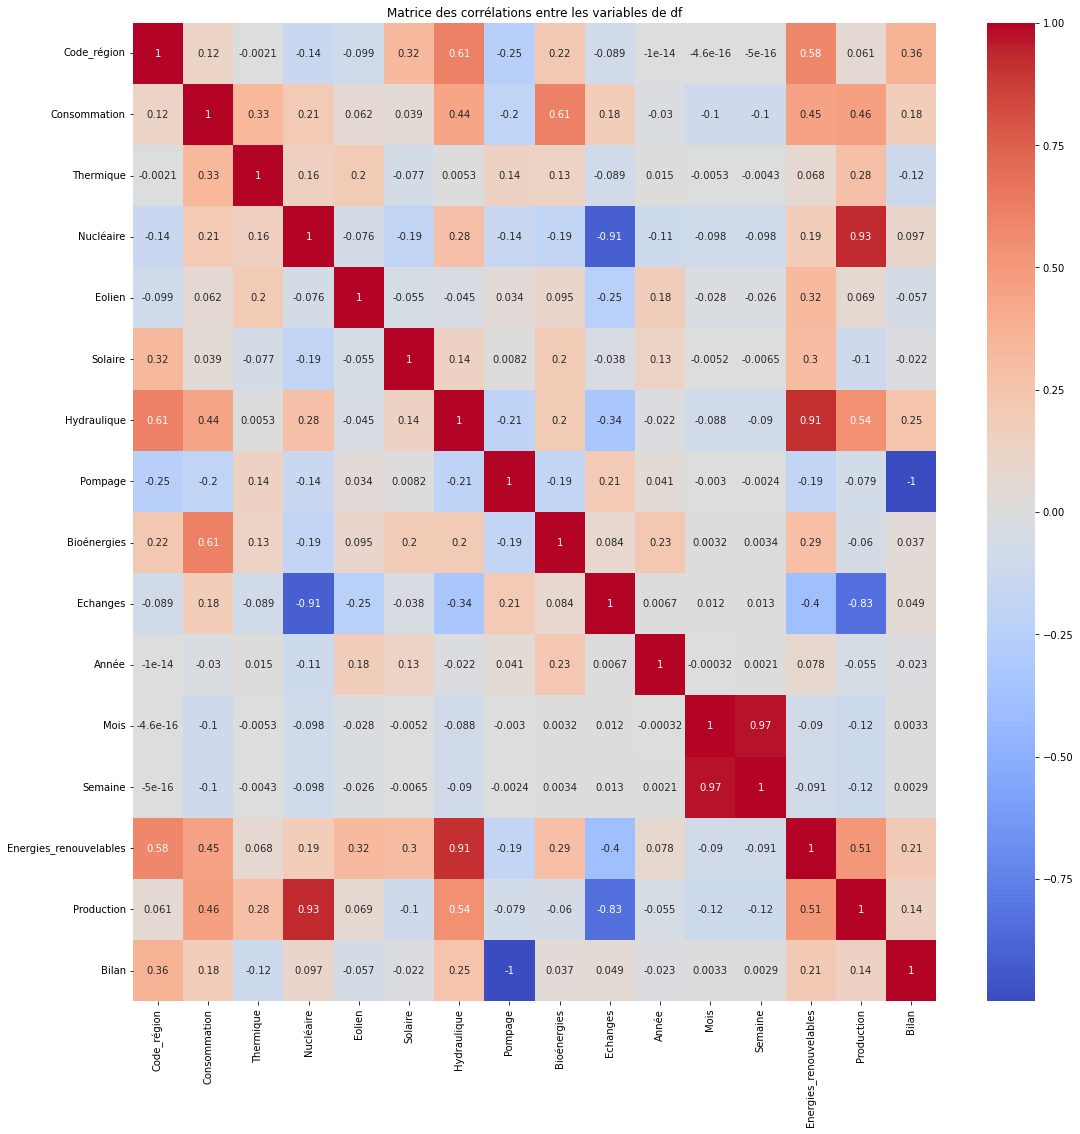

In [20]:
# Analyse des corrélations entre les variables de df et la variable cible 'Consommation'
cor = df_clean.corr()
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm')
plt.title('Matrice des corrélations entre les variables de df')
plt.savefig('df_matrice_correlations.png'); 

- Corrélation parfaite entre Consommation et Bilan : la Consommation commande complètement le bilan énergétique
- Pas de trés fortes corrélations avec Consommation (max = 0.62) 
    - Fortes corrélations positives avec 'Bioénergies' (0.61),'Hydraulique' (0.44), 'Energies_renouvelables' (0.45) et 'Production' (0.46)
    - Faibles corrélations positives avec 'Thermique' (0.33) et 'Nucléaire' (0.21)
    - Faible corréaltion négative avec Pompage (-0.2)

- Corrélations entre variables :
    - Echanges et Nucléaire : -0.91
    - Production et Nucléaire : 0.93
    - Production et Hydraulique : 0.54
    - Production et energies_renouvelables : 0.51
    - Energies_renouvelables et hydraulique : 0.91
    - Hydraulique et code_région : 0.61 ; energies_renouvelables et code_region : 0.58 ; bilan et code_region : 0.54
    - Echanges et production : -0.83


In [21]:
# On déplace les colonnes année, mois, semaine et saison pour faciliter la manipulation du jeu de données
column_annee = df_clean.pop('Année')
df_clean.insert(4,'Année',column_annee)
column_mois = df_clean.pop('Mois')
df_clean.insert(5,'Mois',column_mois)
column_saison = df_clean.pop('Saison')
df_clean.insert(8,'Saison',column_saison)
column_semaine = df_clean.pop('Semaine')
df_clean.insert(6,'Semaine',column_semaine)

df_clean.head()

Code_région                   Région               Nature       Date  \
12           11            Île-de-France  Données définitives 2013-01-01   
13           24      Centre-Val de Loire  Données définitives 2013-01-01   
14           52         Pays de la Loire  Données définitives 2013-01-01   
15           44                Grand Est  Données définitives 2013-01-01   
16           27  Bourgogne-Franche-Comté  Données définitives 2013-01-01   

    Année  Mois  Semaine  Heure               Date - Heure Saison  \
12   2013     1        1  00:30  2013-01-01T00:30:00+01:00  Hiver   
13   2013     1        1  00:30  2013-01-01T00:30:00+01:00  Hiver   
14   2013     1        1  00:30  2013-01-01T00:30:00+01:00  Hiver   
15   2013     1        1  00:30  2013-01-01T00:30:00+01:00  Hiver   
16   2013     1        1  00:30  2013-01-01T00:30:00+01:00  Hiver   

    Consommation  Thermique  Nucléaire  Eolien  Solaire  Hydraulique  Pompage  \
12        9134.0      685.0        NaN    16.0      0.0          0.0      NaN   
13        2476.0       90.0     9085.0   508.0      0.0         34.0      NaN   
14        3595.0      127.0        NaN   182.0      0.0          0.0      NaN   
15        4943.0      319.0     9137.0  1109.0      0.0       1418.0      0.0   
16        2357.0      236.0        NaN   106.0      0.0        105.0      0.0   

    Bioénergies  Echanges  Energies_renouvelables  Production  Bilan  
12        142.0    8289.0                   158.0         NaN    NaN  
13         25.0   -7267.0                   567.0      9742.0   -1.0  
14         32.0    3252.0                   214.0         NaN    NaN  
15         57.0   -7102.0                  2584.0     12040.0   -5.0  
16         12.0    1894.0                   223.0         NaN    NaN

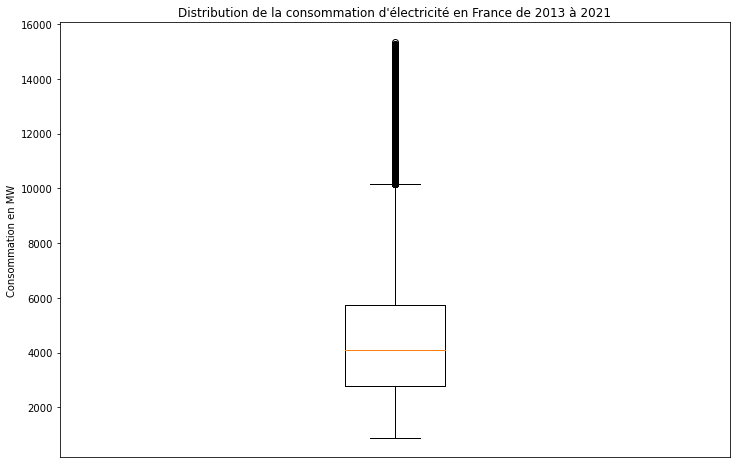

In [22]:
#Distribution des valeurs de la variable cible : 'Consommation'
plt.figure(figsize=(12,8))
plt.boxplot(df_clean.Consommation)
plt.ylabel('Consommation en MW')
plt.xticks([])
plt.title("Distribution de la consommation d'électricité en France de 2013 à 2021");


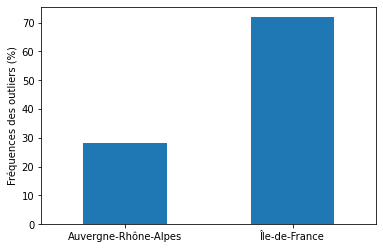

In [23]:
conso_outliers = df_clean[['Année', 'Région','Consommation']][df_clean['Consommation']>10000]

(conso_outliers['Région'].value_counts()/len(conso_outliers)*100).sort_index().plot(kind="bar", rot=0)
plt.ylabel('Fréquences des outliers (%)');
#sns.countplot(x='Région', data = conso_outliers);


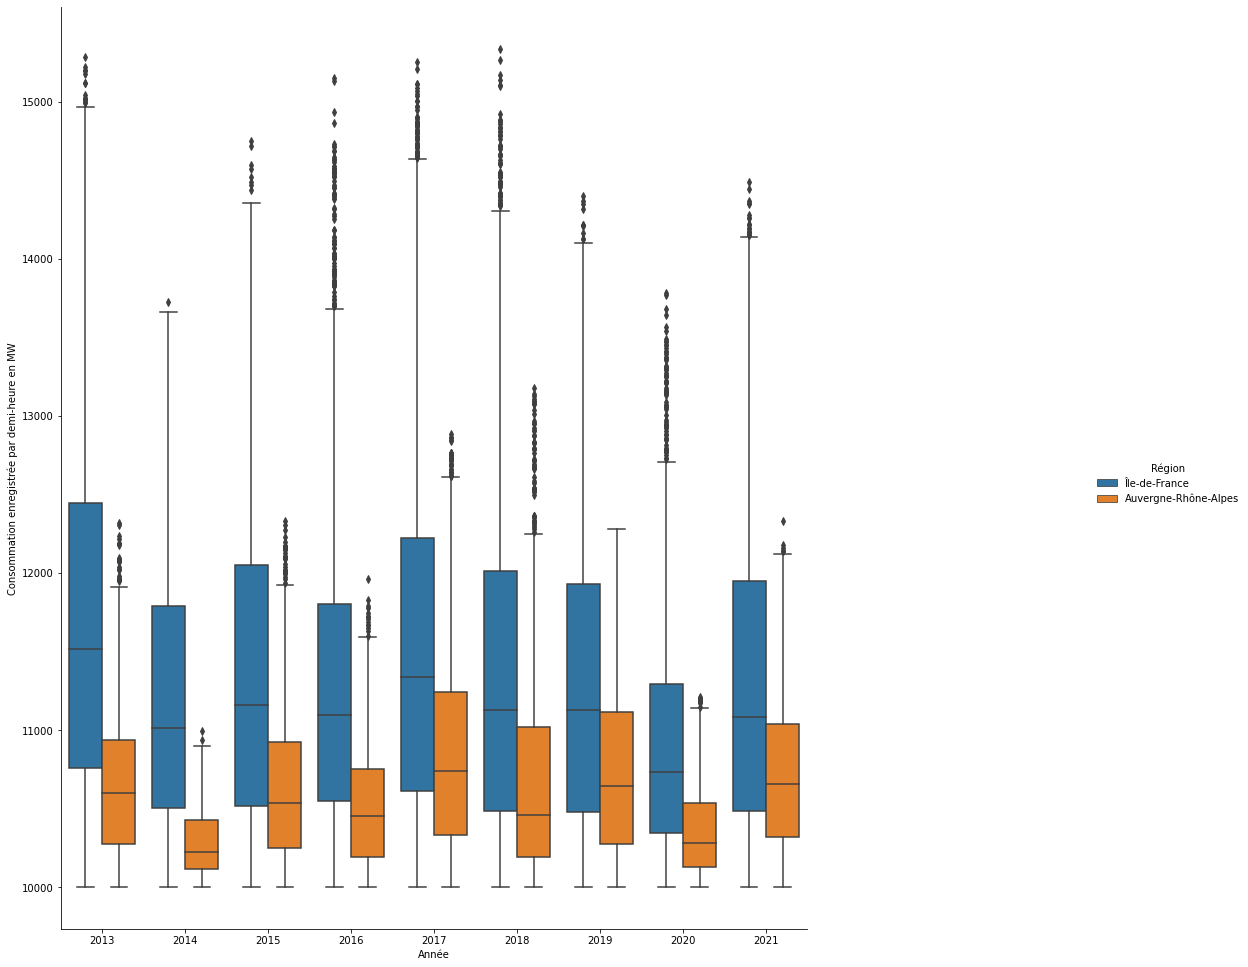

In [24]:
# Boxplots des consommations au-dessus de 10000 MW par an et par région 
c= sns.color_palette("tab10")
g = sns.catplot(x='Année', y='Consommation', hue='Région', data = conso_outliers, kind ="box", palette =c  )
g.fig.set_figwidth(20)
g.fig.set_figheight(15)
g.ax.set(ylabel='Consommation enregistrée par demi-heure en MW');

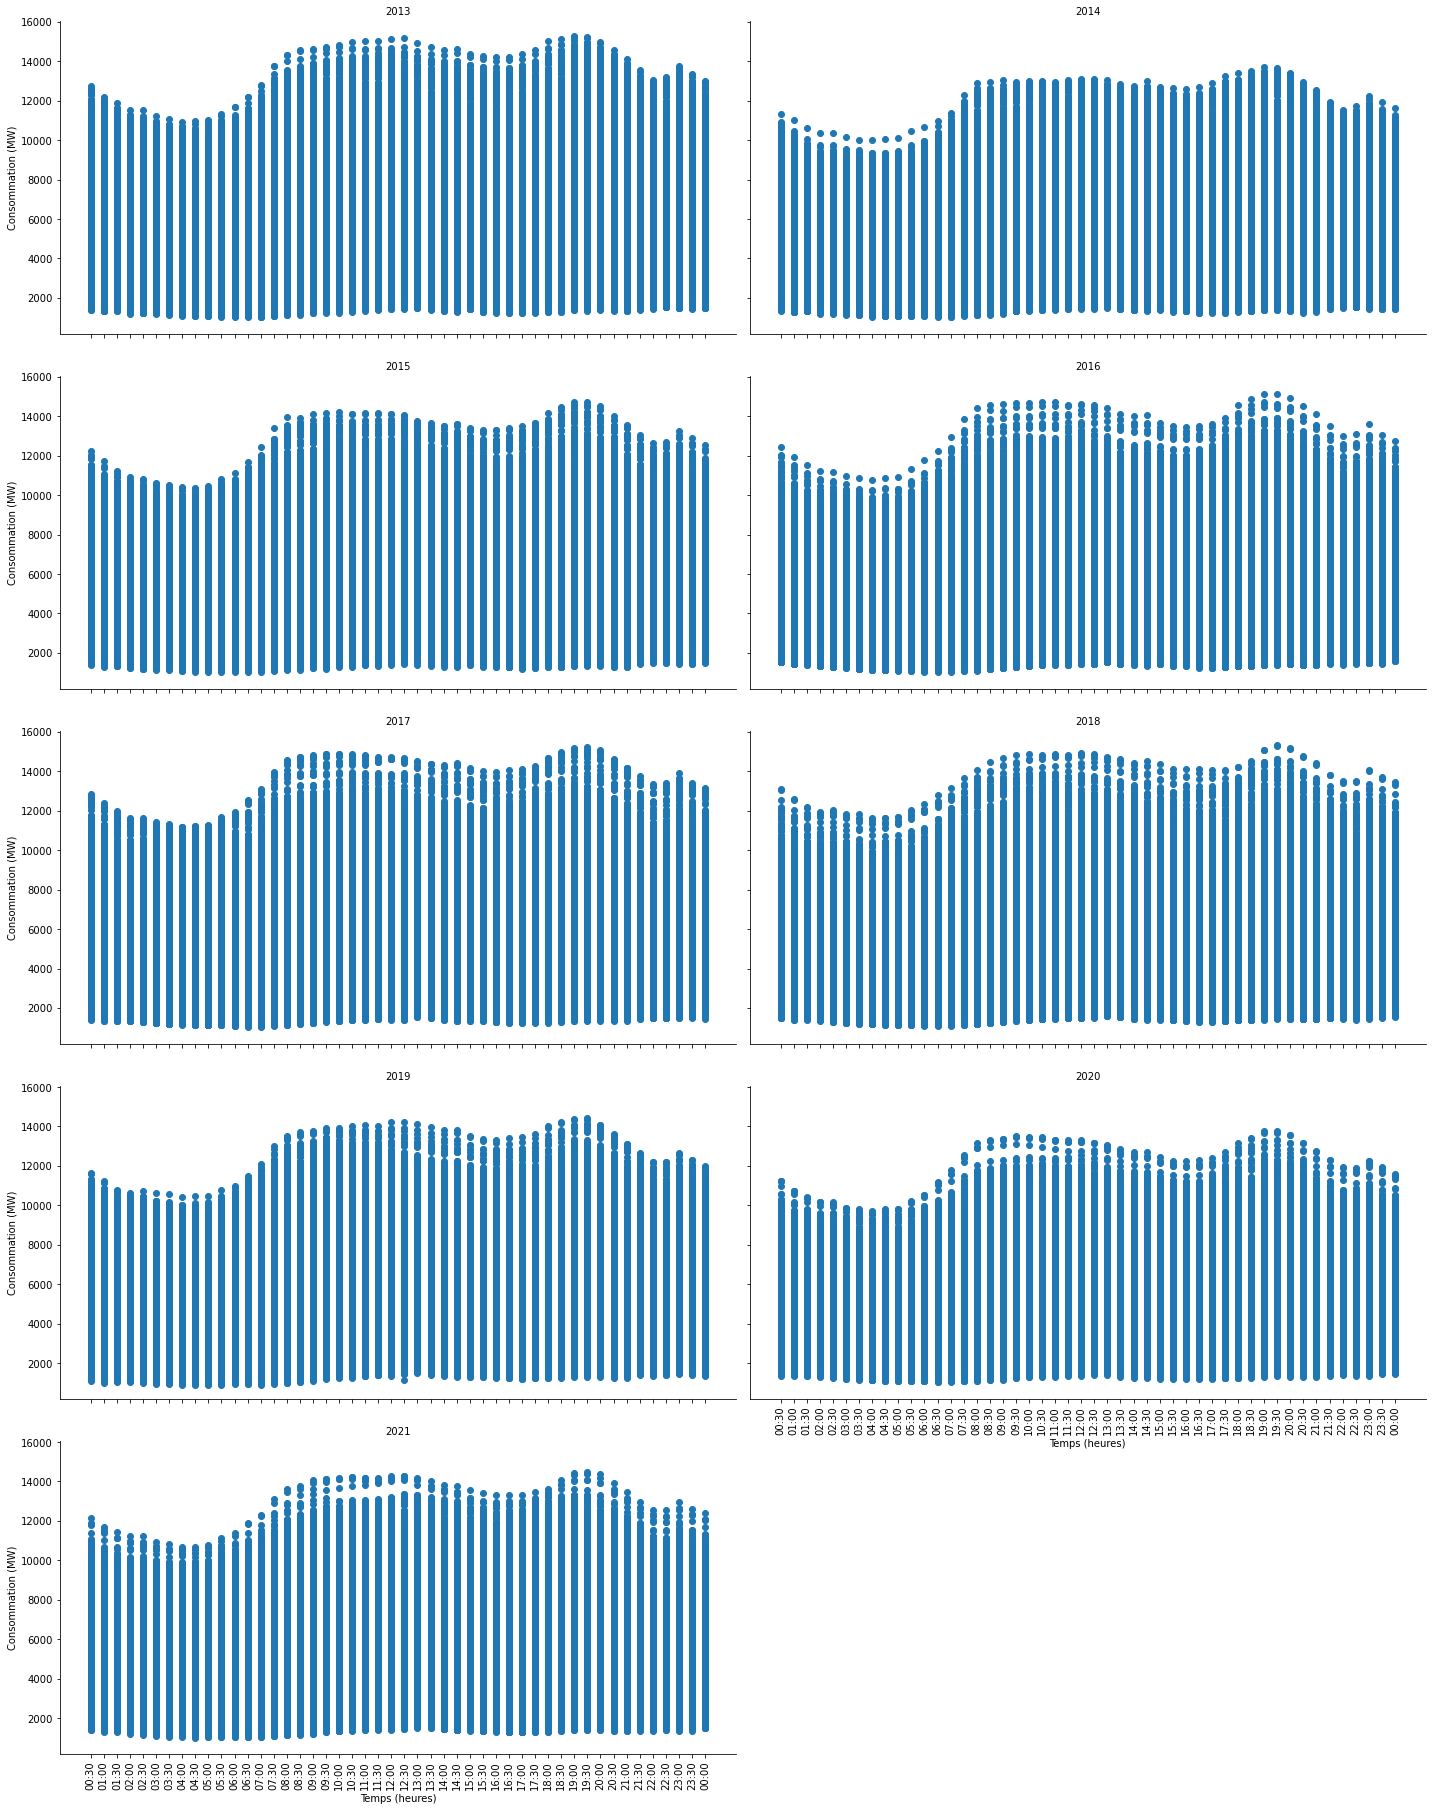

In [25]:
#Evolution de la consommation par année
f = sns.FacetGrid(df_clean, col='Année', col_wrap= 2, height=5, aspect=2)
f.map(plt.scatter, 'Heure', 'Consommation')

# Adjust title and axis labels directly
f.set_titles("{col_name}")  # use this argument literally
f.set_axis_labels( x_var="Temps (heures)", y_var="Consommation (MW)")
f.set_xticklabels(rotation=90)
plt.savefig('FacetGrid_conso_heure.png');

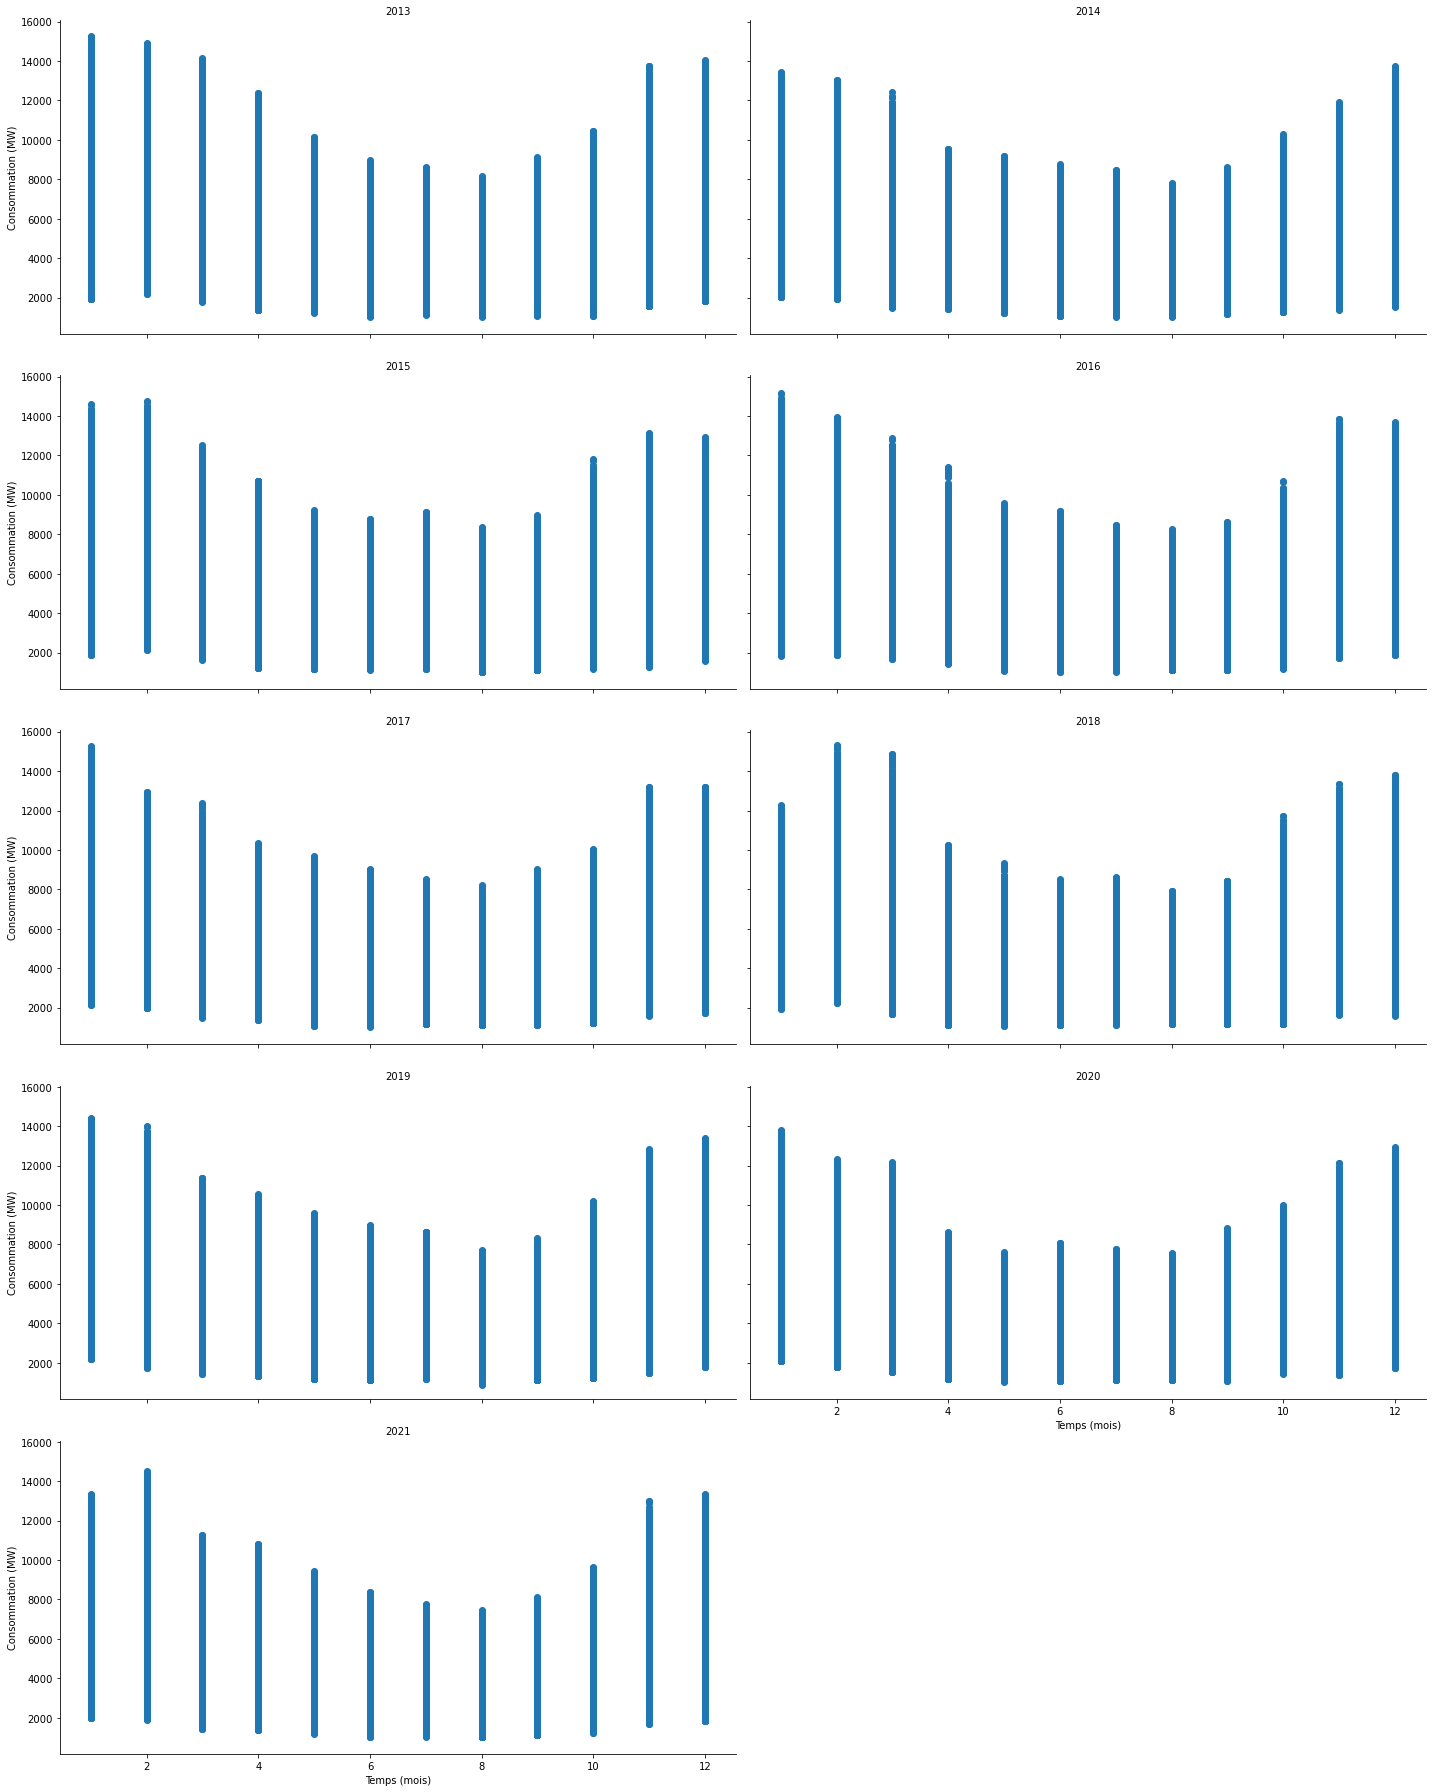

In [26]:
#Evolution de la consommation par année en fonction des mois
f = sns.FacetGrid(df_clean, col='Année', col_wrap= 2, height=5, aspect=2  )
f.map(plt.scatter, 'Mois', 'Consommation')
# Adjust title and axis labels directly
f.set_titles("{col_name}")  # use this argument literally
f.set_axis_labels(x_var="Temps (mois)", y_var="Consommation (MW)")
plt.savefig('FacetGrid_conso_mois.png');

<Figure size 1440x1296 with 0 Axes>

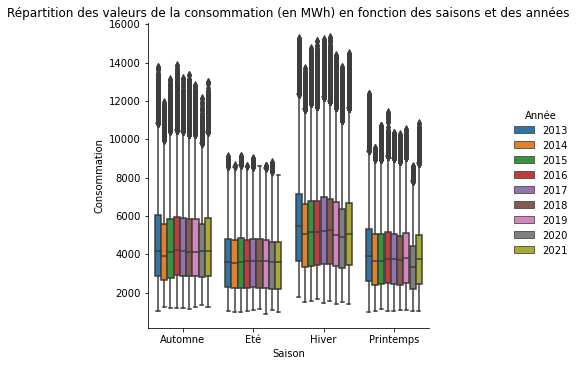

In [27]:
# Test de corrélation entre la consommation et les saisons
plt.figure(figsize=(20,18))
sns.catplot(x='Saison', y='Consommation', data = df_clean, hue='Année', kind='box')
plt.title('Répartition des valeurs de la consommation (en MWh) en fonction des saisons et des années')
plt.savefig('Répartition des valeurs de la consommation (en MWh) en fonction des saisons et des années.png');

In [28]:
# ANOVA pour tester la corrélation entre Consommation et Saison
import statsmodels.api
result = statsmodels.formula.api.ols('Consommation ~ Saison', data=df_clean).fit()
table= statsmodels.api.stats.anova_lm(result)
table

df        sum_sq       mean_sq             F  PR(>F)
Saison          3.0  1.038881e+12  3.462938e+11  83504.301499     0.0
Residual  1893296.0  7.851531e+12  4.147017e+06           NaN     NaN

Les résultats de l'ANOVA montre une p_value = 0.0<0.05 donc la corrélation entre la consommation et la saison est significative.

In [29]:
# Exportation du jeu de données par heure
df_clean.to_csv(r'C:\Users\Lenovo\PyConso\pyconso_heure.csv', index = False)

Afin d'ajouter d'autres variables explicatives, il nous faut transformer le jeu de données et 
le séparer en fonction des années, des mois, des semaines et des jours. 

In [30]:
df_clean.head()

Code_région                   Région               Nature       Date  \
12           11            Île-de-France  Données définitives 2013-01-01   
13           24      Centre-Val de Loire  Données définitives 2013-01-01   
14           52         Pays de la Loire  Données définitives 2013-01-01   
15           44                Grand Est  Données définitives 2013-01-01   
16           27  Bourgogne-Franche-Comté  Données définitives 2013-01-01   

    Année  Mois  Semaine  Heure               Date - Heure Saison  \
12   2013     1        1  00:30  2013-01-01T00:30:00+01:00  Hiver   
13   2013     1        1  00:30  2013-01-01T00:30:00+01:00  Hiver   
14   2013     1        1  00:30  2013-01-01T00:30:00+01:00  Hiver   
15   2013     1        1  00:30  2013-01-01T00:30:00+01:00  Hiver   
16   2013     1        1  00:30  2013-01-01T00:30:00+01:00  Hiver   

    Consommation  Thermique  Nucléaire  Eolien  Solaire  Hydraulique  Pompage  \
12        9134.0      685.0        NaN    16.0      0.0          0.0      NaN   
13        2476.0       90.0     9085.0   508.0      0.0         34.0      NaN   
14        3595.0      127.0        NaN   182.0      0.0          0.0      NaN   
15        4943.0      319.0     9137.0  1109.0      0.0       1418.0      0.0   
16        2357.0      236.0        NaN   106.0      0.0        105.0      0.0   

    Bioénergies  Echanges  Energies_renouvelables  Production  Bilan  
12        142.0    8289.0                   158.0         NaN    NaN  
13         25.0   -7267.0                   567.0      9742.0   -1.0  
14         32.0    3252.0                   214.0         NaN    NaN  
15         57.0   -7102.0                  2584.0     12040.0   -5.0  
16         12.0    1894.0                   223.0         NaN    NaN

### 1.4 Ajout de variables complémentaires

#### 1.4.1 Ajout des variables environnementales (échelle de temps horaire)

In [31]:
#PyMeteo

#On souhaite ajouter des données météo qui jouent un rôle sur la consommation d'électricité (luminosité, température, humidité?) et un rôle sur la production d'électricité (luminosité, pluies, vent, température ?)

# Lecture du dataset météo_climat
meteo = pd.read_csv('donnees-meteo-climat.csv', sep=';',low_memory=False) # source : https://www.data.gouv.fr/fr/datasets/observation-meteorologique-historiques-france-synop/
# Error tokenizing data. C error: Expected 12 fields in line 25, saw 14

# Affichage des 1ères lignes de meteo
display(meteo.head())
display(meteo.info())

#1. SELECTION DES VARIABLES NECESSAIRES

# A conserver : Date, Direction du vent moyen 10 mn, Vitesse du vent moyen 10 mn, Température, Humidité, Nebulosité totale, 
# Rafale sur les 10 dernières minutes, Précipitations dans la dernière heure, Latitude, Logitude, Altitude, region (code)

meteo_py = meteo[['Date', 'Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn', 'Température', 'Humidité', 'Nebulosité totale', 
'Rafale sur les 10 dernières minutes', 'Précipitations dans la dernière heure', 'Latitude', 'Longitude', 'Altitude', 'region (code)', 'region (name)', 'mois_de_l_annee']]
meteo_py.head()

# Création d'une colonne Année
meteo_py['Année']=(meteo_py['Date'].apply(lambda x:x.split('-')[0])).astype('int')

# Suppression des années 2010 à 2012
meteo_py.drop(meteo_py[meteo_py['Année']==2010].index, inplace=True)
meteo_py.drop(meteo_py[meteo_py['Année']==2011].index, inplace=True)
meteo_py.drop(meteo_py[meteo_py['Année']==2012].index, inplace=True)

# Renommer la colonne Date 'Date - Heure' et la colonne region (code) 'Code_région' comme dans le df de PyConso
dico = {'Date':'Date - Heure', 'region (code)': 'Code_région', 'region (name)':'Région', 'mois_de_l_annee':'Mois'}
meteo_py.rename(dico, axis=1, inplace=True)

meteo_py.sort_values(by='Date - Heure', ascending=True, inplace=True)

# Dimension de df et intervalle de temps de récolte des données

print("Dimensions du dataset meteo_py :",meteo_py.shape) # (1562974, 19)
print("Les données ont été récoltées sur l'intervalle,", meteo_py['Année'].unique()) # Janvier 2013 à Avril 2022
print('\n')

#2. VALEURS MANQUANTES

# Suppression toutes les lignes pour lesquelles on trouve des NaNs pour toutes les variables numériques
meteo_py = meteo_py.dropna(axis=0, how='all', subset=meteo_py.columns[1:8])

# Valeurs manquantes

print('Variables avec des valeurs manquantes: \n')
def valeur_manquante(df):
  flag=0
  for col in df.columns:
    if df[col].isna().sum() >0 :
      flag=1
      print(f'"{col}":"{df[col].isna().sum()} valeurs manquantes"')
      if flag==0:
        print("Le dataset ne contient plus de NaNs.")

print(valeur_manquante(meteo_py))

meteo_clean = meteo_py.dropna()
print(valeur_manquante(meteo_clean))
print("Dimensions du dataset meteo_py :",meteo_clean.shape) # (498062, 15)
print("Les données ont été récoltées sur l'intervalle,", meteo_clean['Année'].unique()) # Janvier 2013 à Avril 2022
print('\n')

meteo_clean['Température']= meteo_clean['Température']- 273.15 # pour afficher les mesures en °C et pas en Kelvin

meteo_clean['Température']

#Modifications finales pour fusionner avec le jeu de données conso
    ##supprimer l'année 2022
meteo_clean = meteo_clean[meteo_clean['Année']!=2022]
    ## changer le type de 'Code_région'
meteo_clean['Code_région'] = meteo_clean['Code_région'].astype('int')
    ## Renommer les colonnes
dico_meteo = {'Direction du vent moyen 10 mn' : 'Vent_direction', 'Vitesse du vent moyen 10 mn' : 'Vent_vitesse_moy',
         'Rafale sur les 10 dernières minutes' : 'Vent_rafales' , 'Précipitations dans la dernière heure':'Précipitations_heure'}
meteo_clean.rename(dico_meteo, axis=1, inplace=True)
display(meteo_clean.info())
#meteo_clean.to_csv(r'C:\Users\Lenovo\PyConso\pymeteo_2013_2021.csv', index = False)

# Ajout de variables meteo d'un autre jeu de données (seulement à partir de 2016)
meteo2 = pd.read_csv('rayonnement-solaire-vitesse-vent-tri-horaires-regionaux.csv', sep=';') # source : https://opendata.reseaux-energies.fr/explore/dataset/rayonnement-solaire-vitesse-vent-tri-horaires-regionaux/
    ## Attention les données ne sont enregistrées qu'à partir de 2016
    ## Renommer la colonne Date :'Date - Heure' et la Code INSEE région : 'Code_région' comme dans le df de PyConso
dico_meteo2 = {'Date':'Date - Heure', 'Code INSEE région': 'Code_région', 'Vitesse du vent à 100m (m/s)' : 'Vitesse_vent_100', 
         'Rayonnement solaire global (W/m2)':'Rayonnement_solaire'}
meteo2.rename(dico_meteo2, axis=1, inplace=True)
meteo2.sort_values(by='Date - Heure', ascending=True, inplace=True)
meteo2=meteo2[meteo2['Région']!='Corse']
    ## Création de la variable Année et suppression de l'année 2022
meteo2['Année'] = meteo2['Date - Heure'].apply(lambda x:x.split('-')[0]).astype(int)
meteo2=meteo2[meteo2['Année']!=2022]

display(meteo2.info()) 

## Fusion des jeux de données
pymeteo = meteo_clean.merge(right=meteo2, on = ['Date - Heure', 'Code_région', 'Région', 'Année'], how = 'inner')
display(pymeteo)
display(pymeteo.info())


ID OMM station                       Date  Pression au niveau mer  \
0            7558  2010-01-05T10:00:00+01:00                100280.0   
1           61976  2010-01-05T10:00:00+01:00                100990.0   
2            7027  2010-01-05T13:00:00+01:00                100720.0   
3            7110  2010-01-05T13:00:00+01:00                100750.0   
4            7591  2010-01-05T13:00:00+01:00                     NaN   

   Variation de pression en 3 heures  \
0                              -50.0   
1                                NaN   
2                             -190.0   
3                             -230.0   
4                                NaN   

                       Type de tendance barométrique  \
0  En baisse, puis en hausse, la pression atmosph...   
1                                                NaN   
2  Stationnaire ou en hausse, puis en baisse, ou ...   
3  Stationnaire ou en hausse, puis en baisse, ou ...   
4                                                NaN   

   Direction du vent moyen 10 mn  Vitesse du vent moyen 10 mn  Température  \
0                          260.0                          1.5       275.75   
1                            NaN                          NaN       305.45   
2                          200.0                          3.6       273.65   
3                          210.0                          4.1       276.95   
4                            NaN                          NaN       274.45   

   Point de rosée  Humidité  Visibilité horizontale  \
0          275.75     100.0                  4000.0   
1          299.05      69.0                 50000.0   
2          271.75      87.0                 12000.0   
3          272.55      73.0                 25000.0   
4          269.05      67.0                     NaN   

                                       Temps présent  \
0  Bruine, sans congélation, intermittente, faibl...   
1              État du ciel inchangé dans l’ensemble   
2              État du ciel inchangé dans l’ensemble   
3              État du ciel inchangé dans l’ensemble   
4  Chute continue de flocons de neige, forte au m...   

                                       Temps passé 1  Temps passé 2  \
0                                             Bruine            5.0   
1                                                  1            1.0   
2  Nuages couvrant plus de la moitié du ciel pend...            1.0   
3  Nuages couvrant plus de la moitié du ciel pend...            1.0   
4                                                NaN            NaN   

   Nebulosité totale  Nébulosité  des nuages de l' étage inférieur  \
0              100.0                                           8.0   
1               60.0                                           1.0   
2               75.0                                           6.0   
3               75.0                                           6.0   
4                NaN                                           NaN   

   Hauteur de la base des nuages de l'étage inférieur  \
0                                              250.0    
1                                              800.0    
2                                              800.0    
3                                              450.0    
4                                                NaN    

   Type des nuages de l'étage inférieur  Type des nuages de l'étage moyen  \
0                                  37.0                              61.0   
1                                  32.0                              20.0   
2                                  35.0                              20.0   
3                                  38.0                              20.0   
4                                   NaN                               NaN   

   Type des nuages de l'étage supérieur  Pression station  \
0                                  60.0           91870.0   
1                                  12.0               NaN   
2                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066537 entries, 0 to 2066536
Data columns (total 82 columns):
 #   Column                                                     Dtype  
---  ------                                                     -----  
 0   ID OMM station                                             int64  
 1   Date                                                       object 
 2   Pression au niveau mer                                     float64
 3   Variation de pression en 3 heures                          float64
 4   Type de tendance barométrique                              object 
 5   Direction du vent moyen 10 mn                              float64
 6   Vitesse du vent moyen 10 mn                                float64
 7   Température                                                float64
 8   Point de rosée                                             float64
 9   Humidité                                                   float64
 10  Visibilité horizon

None

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_9504/1276379736.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteo_py['Année']=(meteo_py['Date'].apply(lambda x:x.split('-')[0])).astype('int')
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Dimensions du dataset meteo_py : (1562974, 15)
Les données ont été récoltées sur l'intervalle, [2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


Variables avec des valeurs manquantes: 

"Direction du vent moyen 10 mn":"15105 valeurs manquantes"
"Vitesse du vent moyen 10 mn":"14604 valeurs manquantes"
"Température":"8626 valeurs manquantes"
"Humidité":"14366 valeurs manquantes"
"Nebulosité totale":"827889 valeurs manquantes"
"Rafale sur les 10 dernières minutes":"597136 valeurs manquantes"
"Précipitations dans la dernière heure":"130039 valeurs manquantes"
"Code_région":"153038 valeurs manquantes"
"Région":"153038 valeurs manquantes"
None
None
Dimensions du dataset meteo_py : (498062, 15)
Les données ont été récoltées sur l'intervalle, [2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 479307 entries, 238960 to 1647099
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                -

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_9504/1276379736.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteo_clean['Température']= meteo_clean['Température']- 273.15 # pour afficher les mesures en °C et pas en Kelvin


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208020 entries, 123660 to 225045
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date - Heure         208020 non-null  object 
 1   Code_région          208020 non-null  int64  
 2   Région               208020 non-null  object 
 3   Vitesse_vent_100     208020 non-null  float64
 4   Rayonnement_solaire  208020 non-null  float64
 5   Année                208020 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 10.3+ MB


None

Date - Heure  Vent_direction  Vent_vitesse_moy  \
0       2016-01-01T04:00:00+01:00           110.0               2.3   
1       2016-01-01T04:00:00+01:00           180.0               3.6   
2       2016-01-01T04:00:00+01:00           110.0               0.9   
3       2016-01-01T04:00:00+01:00            20.0               2.0   
4       2016-01-01T04:00:00+01:00             0.0               0.0   
...                           ...             ...               ...   
349150  2021-12-31T22:00:00+01:00            60.0               1.0   
349151  2021-12-31T22:00:00+01:00           230.0               2.5   
349152  2021-12-31T22:00:00+01:00           200.0               3.3   
349153  2021-12-31T22:00:00+01:00           140.0               3.1   
349154  2021-12-31T22:00:00+01:00           140.0               3.1   

        Température  Humidité  Nebulosité totale  Vent_rafales  \
0               4.7      98.0              101.0           2.7   
1               8.6      91.0               60.0           4.9   
2               4.7      97.0              101.0           1.7   
3              10.1      95.0              100.0           2.8   
4               9.6      83.0              100.0           0.0   
...             ...       ...                ...           ...   
349150          4.4      99.0              101.0           1.5   
349151         10.5      97.0               25.0           3.3   
349152         12.7      92.0              100.0           4.6   
349153          7.7      99.0                0.0           4.2   
349154         13.4      93.0              100.0           4.6   

        Précipitations_heure   Latitude  Longitude  Altitude  Code_région  \
0                        0.0  44.830667  -0.691333        47           75   
1                        0.0  46.046833  -1.411500        11           75   
2                        0.0  47.267833   5.088333       219           27   
3                        0.0  43.577000   3.963167         2           76   
4                        0.0  42.737167   2.872833        42           76   
...                      ...        ...        ...       ...          ...   
349150                   0.0  47.267833   5.088333       219           27   
349151                   0.0  48.716833   2.384333        89           11   
349152                   0.0  50.570000   3.097500        47           32   
349153                   0.0  45.726500   5.077833       235           84   
349154                   0.0  48.068833  -1.734000        36           53   

                         Région  Mois  Année  Vitesse_vent_100  \
0            Nouvelle-Aquitaine     1   2016              8.04   
1            Nouvelle-Aquitaine     1   2016              8.04   
2       Bourgogne-Franche-Comté     1   2016              7.12   
3                     Occitanie     1   2016              5.47   
4                     Occitanie     1   2016              5.47   
...                         ...   ...    ...               ...   
349150  Bourgogne-Franche-Comté    12   2021              5.76   
349151            Île-de-France    12   2021              7.50   
349152          Hauts-de-France    12   2021              8.32   
349153     Auvergne-Rhône-Alpes    12   2021              3.02   
349154                 Bretagne    12   2021             10.53   

        Rayonnement_solaire  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
...                     ...  
349150                  0.0  
349151                  0.0  
349152                  0.0  
349153                  0.0  
349154                  0.0  

[349155 rows x 17 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349155 entries, 0 to 349154
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date - Heure          349155 non-null  object 
 1   Vent_direction        349155 non-null  float64
 2   Vent_vitesse_moy      349155 non-null  float64
 3   Température           349155 non-null  float64
 4   Humidité              349155 non-null  float64
 5   Nebulosité totale     349155 non-null  float64
 6   Vent_rafales          349155 non-null  float64
 7   Précipitations_heure  349155 non-null  float64
 8   Latitude              349155 non-null  float64
 9   Longitude             349155 non-null  float64
 10  Altitude              349155 non-null  int64  
 11  Code_région           349155 non-null  int32  
 12  Région                349155 non-null  object 
 13  Mois                  349155 non-null  int64  
 14  Année                 349155 non-null  int32  
 15  

None

In [32]:
## Exportation du dataframe pymeteo en csv
pymeteo.to_csv(r'C:\Users\Lenovo\PyConso\pymeteo.csv', index = False)

In [33]:
## Fusion de df_clean avec pymeteo
pymeteo = pd.read_csv('pymeteo.csv')

conso_heure_var = df_clean.merge(right=pymeteo, on=['Date - Heure', 'Code_région', 'Région', 'Année','Mois'], how='inner')

# Trier pour que les lignes soient triées par région et par date et par heure
conso_heure_var=conso_heure_var.sort_values(by=['Code_région','Région','Date','Heure'], ascending=True)

display(conso_heure_var.head())
display(conso_heure_var.info())
print('Nombre de doublons :', conso_heure_var.duplicated().sum())
print('Nombre de valeurs manquantes :', conso_heure_var.isna().sum())

Code_région         Région               Nature       Date  Année  Mois  \
15            11  Île-de-France  Données définitives 2016-01-01   2016     1   
47            11  Île-de-France  Données définitives 2016-01-01   2016     1   
82            11  Île-de-France  Données définitives 2016-01-01   2016     1   
101           11  Île-de-France  Données définitives 2016-01-01   2016     1   
119           11  Île-de-France  Données définitives 2016-01-01   2016     1   

     Semaine  Heure               Date - Heure Saison  Consommation  \
15        53  04:00  2016-01-01T04:00:00+01:00  Hiver        7174.0   
47        53  07:00  2016-01-01T07:00:00+01:00  Hiver        7348.0   
82        53  10:00  2016-01-01T10:00:00+01:00  Hiver        7746.0   
101       53  13:00  2016-01-01T13:00:00+01:00  Hiver        8856.0   
119       53  16:00  2016-01-01T16:00:00+01:00  Hiver        8474.0   

     Thermique  Nucléaire  Eolien  Solaire  Hydraulique  Pompage  Bioénergies  \
15       312.0        NaN     3.0      0.0         10.0      NaN        150.0   
47       312.0        NaN     1.0      0.0         10.0      NaN        151.0   
82       311.0        NaN     2.0      2.0         10.0      NaN        150.0   
101      305.0        NaN     2.0      7.0         10.0      NaN        145.0   
119      305.0        NaN    10.0      2.0         10.0      NaN        152.0   

     Echanges  Energies_renouvelables  Production  Bilan  Vent_direction  \
15     6700.0                   163.0         NaN    NaN           180.0   
47     6874.0                   162.0         NaN    NaN           140.0   
82     7271.0                   164.0         NaN    NaN           110.0   
101    8387.0                   164.0         NaN    NaN           140.0   
119    7993.0                   174.0         NaN    NaN           130.0   

     Vent_vitesse_moy  Température  Humidité  Nebulosité totale  Vent_rafales  \
15                1.8          4.9      95.0               40.0           2.3   
47                0.6          3.9      97.0               25.0           0.9   
82                2.5          4.9      99.0              101.0           3.5   
101               3.0          6.4      99.0              100.0           4.8   
119               3.2          7.4      93.0              100.0           4.8   

     Précipitations_heure   Latitude  Longitude  Altitude  Vitesse_vent_100  \
15                    0.0  48.716833   2.384333        89              9.43   
47                    0.0  48.716833   2.384333        89              8.90   
82                    0.0  48.716833   2.384333        89              8.25   
101                  -0.1  48.716833   2.384333        89              8.29   
119                   0.0  48.716833   2.384333        89              8.26   

     Rayonnement_solaire  
15                  0.00  
47                  0.00  
82                 12.12  
101               179.61  
119               114.67

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349039 entries, 15 to 349030
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Code_région             349039 non-null  int64         
 1   Région                  349039 non-null  object        
 2   Nature                  349039 non-null  object        
 3   Date                    349039 non-null  datetime64[ns]
 4   Année                   349039 non-null  int64         
 5   Mois                    349039 non-null  int64         
 6   Semaine                 349039 non-null  UInt32        
 7   Heure                   349039 non-null  object        
 8   Date - Heure            349039 non-null  object        
 9   Saison                  349039 non-null  category      
 10  Consommation            349039 non-null  float64       
 11  Thermique               349039 non-null  float64       
 12  Nucléaire               25131

None

Nombre de doublons : 0
Nombre de valeurs manquantes : Code_région                    0
Région                         0
Nature                         0
Date                           0
Année                          0
Mois                           0
Semaine                        0
Heure                          0
Date - Heure                   0
Saison                         0
Consommation                   0
Thermique                      0
Nucléaire                  97723
Eolien                         0
Solaire                        0
Hydraulique                    0
Pompage                   129090
Bioénergies                    0
Echanges                       0
Energies_renouvelables         0
Production                 97723
Bilan                      97723
Vent_direction                 0
Vent_vitesse_moy               0
Température                    0
Humidité                       0
Nebulosité totale              0
Vent_rafales                   0
Précipitations_heure  

In [34]:
# Pour l'instant on supprime les colonnes Latitude, Longitude et Altitude mais on pourra s'en servir pour de la cartographie
conso_heure_var = conso_heure_var.drop(['Latitude', 'Longitude', 'Altitude'], axis=1)

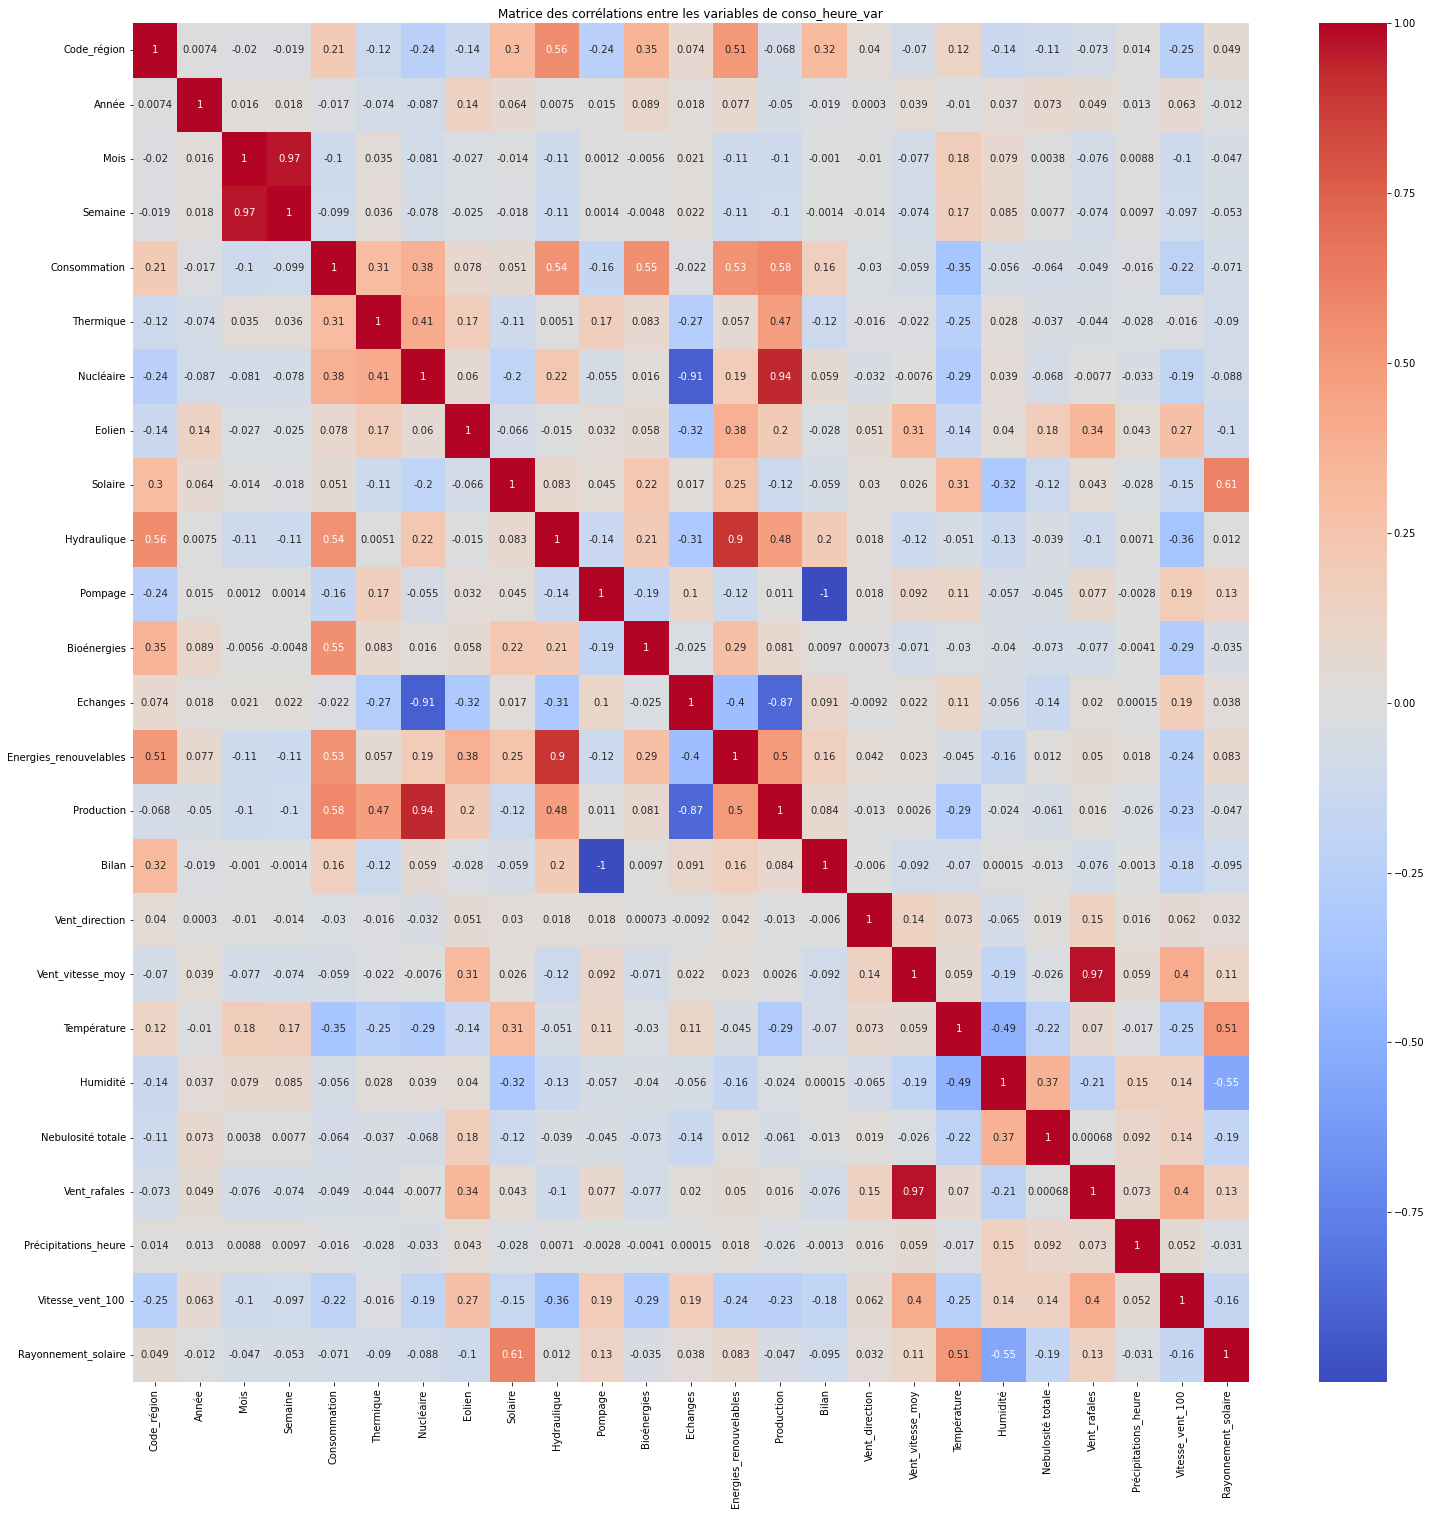

In [35]:
# Analyse des corrélations
cor = conso_heure_var.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm')
plt.title('Matrice des corrélations entre les variables de conso_heure_var')
plt.savefig('conso_heure_var_matrice_correlations.png');  

- Surprise : La consommation n'est corrélée que moyennement à la température et négativement (-0.35) -> plots : température vs conso à faire
- La consommation est corrélée parfaitement à Bilan : coeff = 1 -> La variance de la consommation domine sur celles des échanges et de la production

- Pas d’autres corrélations très fortes avec Consommation (max = 0.61) :
 -- Fortes corrélations positives (autour de 0.5) avec 'Production', ‘Bioénergies’, 'Hydraulique' et 'Energies_renouvelables'
 -- Corrélation négative moyenne avec la température (-0.35)
 -- Faibles corrélations positives avec 'Thermique' (0.31) et 'Nucléaire' (0.38)

- Corrélations fortes entre variables :
Vitesse du vent moyen et rafales : 0.97 
Echanges et Nucléaire : -0.91
Production et Nucléaire : 0.94
Production et Hydraulique : 0.48
Production et énergies renouvelables : 0.5
Bilan et énergies renouvelables : 0.66
Énergies renouvelables et hydraulique : 0.9
Échanges et production : -0.87
Rayonnement solaire et température : 0.51
Rayonnement solaire et production solaire : 0.61
Rayonnement solaire et humidité : -0.55
Code_région et Hydraulique : 0.56
Code_région et Energies_renouvelables : 0.51
Code_région et bilan : 0.51
Corrélations moyennes entre :
Consommation et Vitesse_vent_100 : -0.22
Consommation et Code_région (0.21)
Vent-rafales et Eolien (0.34)
Pas ou peu de corrélation entre :
Précipitations et Hydraulique (<0.01)
Direction vent et Eolien (0.058)
Nébulosité avec aucune variable sauf Humidité (0.39)
Consommation et Vent_rafales et Vent_vitesse_moy (proche de 0)

    
Pour les paramètres liés au vent on peut ne garder que Vitesse_vent_100 et Vent_rafales.
On peut tester la corrélation entre Consommation et Température.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


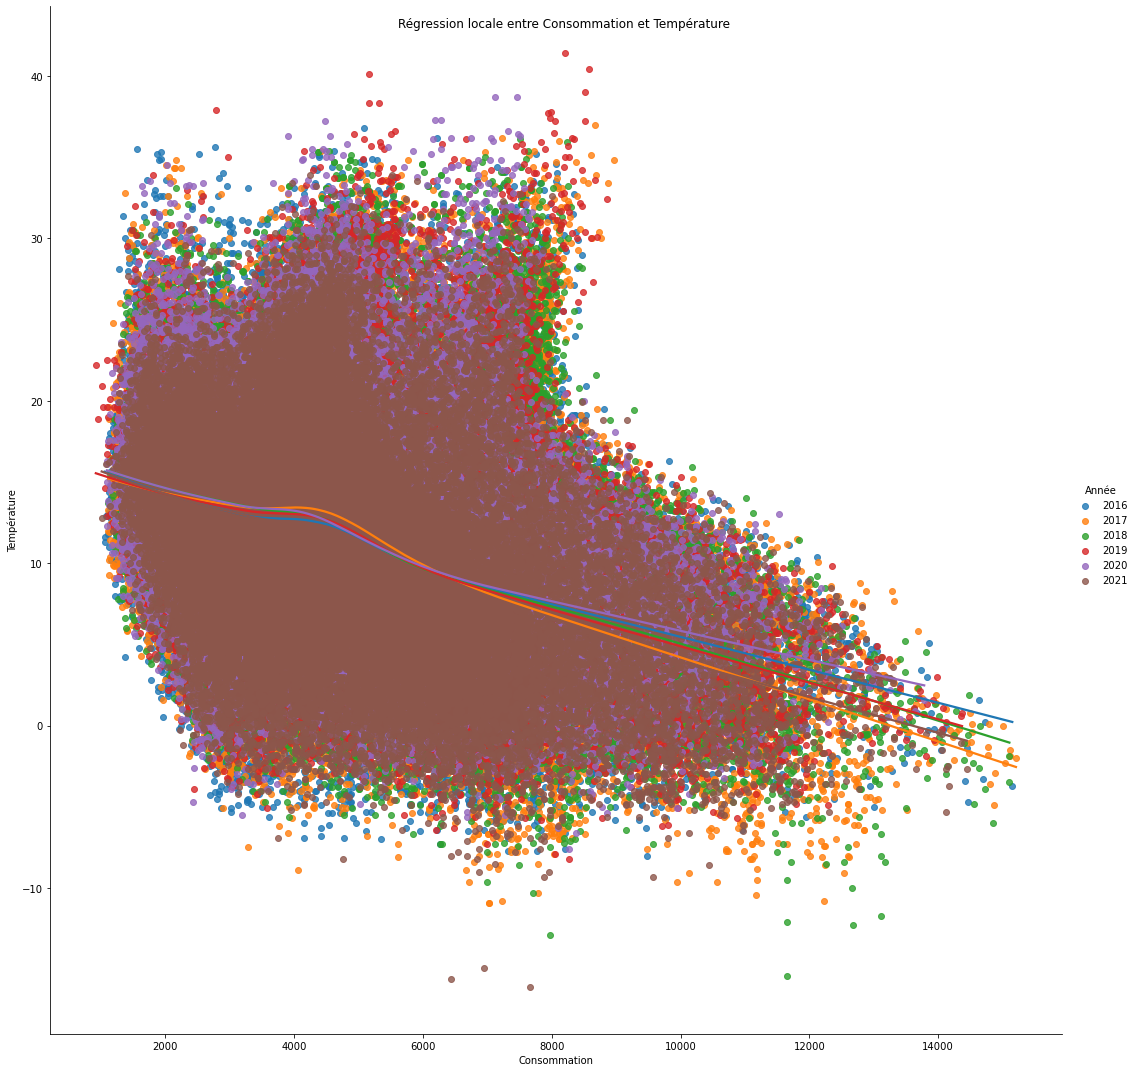

In [36]:
# Régression locale entre Consommation et Température
sns.lmplot(x='Consommation', y='Température', data=conso_heure_var, size = 15, 
           lowess=True, hue='Année').fig.suptitle('Régression locale entre Consommation et Température');

In [37]:
# Test de Pearson pour tester la corrélation entre Consommation et Température
from scipy.stats import pearsonr
conso_temp=pd.DataFrame(conso_heure_var[['Consommation','Température']].dropna(axis=0)) ## On extrait les variables à tester et on supprime les NaNs
#conso_temp.info() shape :(349039,2)
pd.DataFrame(pearsonr(conso_temp['Consommation'], conso_temp['Température']), index=['pearson_coeff','p-value'], columns=['resultat_test'])


resultat_test
pearson_coeff      -0.349525
p-value             0.000000

In [38]:
conso_temp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 349039 entries, 15 to 349030
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Consommation  349039 non-null  float64
 1   Température   349039 non-null  float64
dtypes: float64(2)
memory usage: 8.0 MB


In [39]:
# Regroupement des valeurs en utilisant les moyennes et médianes de Consommation et Température
mean_conso=conso_heure_var.groupby('Date', as_index=False).agg({'Consommation':'mean'})
med_conso =conso_heure_var.groupby('Date', as_index=False).agg({'Consommation':'median'})
mean_temp = conso_heure_var.groupby('Date', as_index=False).agg({'Température':'mean'})
med_temp = conso_heure_var.groupby('Date', as_index=False).agg({'Température':'median'})

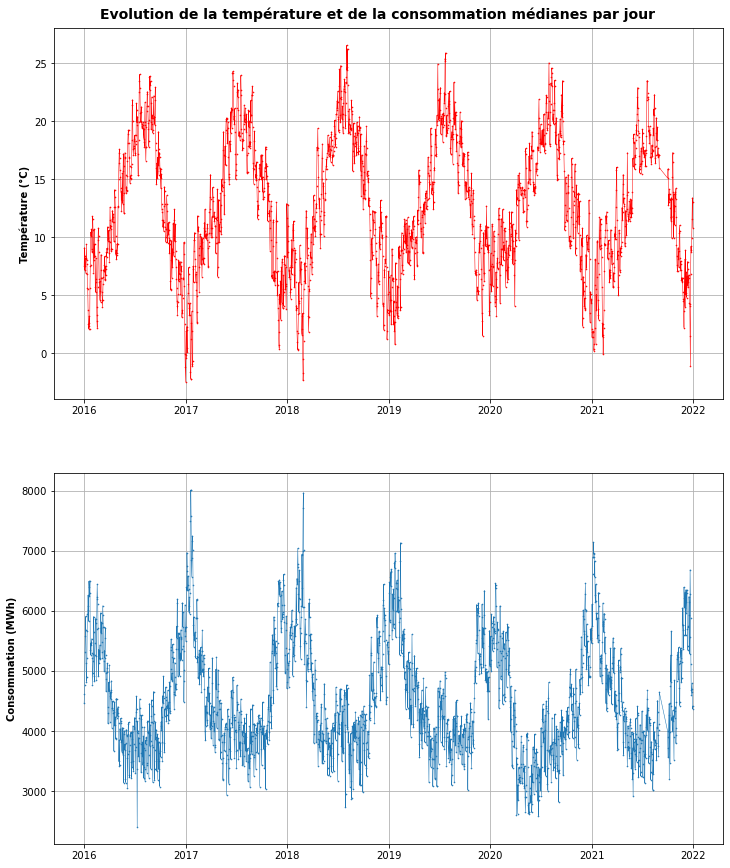

In [40]:
# Affichage de l'évolution de Consommation et de Température médianes au cours du temps
fig, (ax1,ax2)= plt.subplots(2)
fig.set_size_inches(12,15)
fig.suptitle('Evolution de la température et de la consommation médianes par jour', y=0.9, fontsize = 14, fontweight ='bold')
ax1.plot_date(x='Date', y='Température', data=med_temp, label='Température médiane(°C)',c='r',lw=0.5, markersize=0.6, ls='-', xdate=True)
ax1.set_ylabel('Température (°C)', fontweight ='bold')
ax2.plot_date(x='Date', y='Consommation', data=med_conso, label='Consommation médiane(MWh)',ls='-',lw=0.5, markersize=0.6, xdate=True)
ax2.set_ylabel('Consommation (MWh)',fontweight ='bold')
ax1.grid(True)
ax2.grid(True)
plt.show()

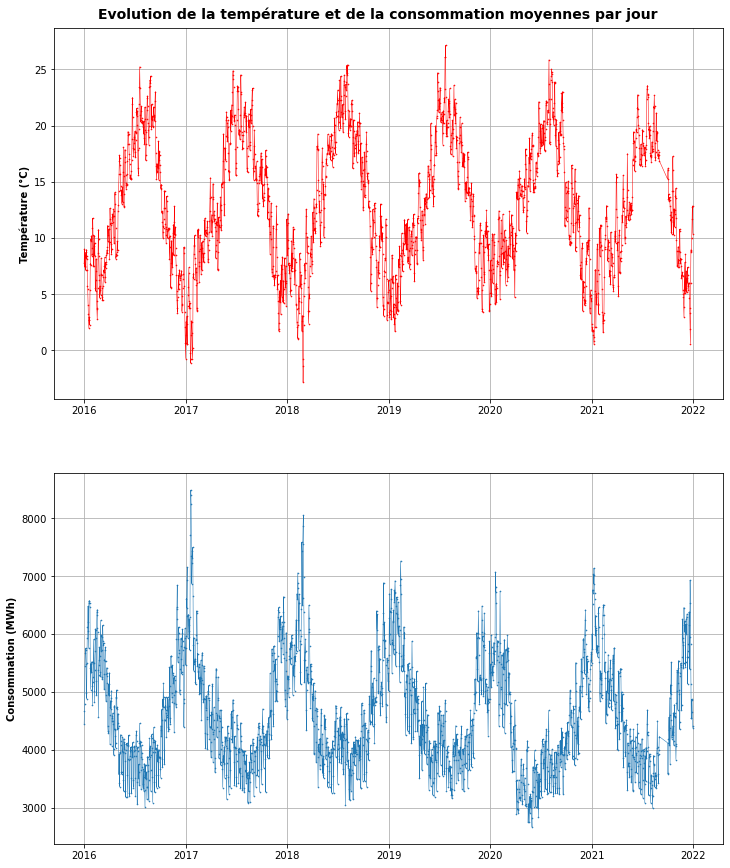

In [41]:
# Affichage de l'évolution de Consommation et de Température moyennes au cours du temps
fig, (ax1,ax2)= plt.subplots(2)
fig.set_size_inches(12,15)
fig.suptitle('Evolution de la température et de la consommation moyennes par jour', y=0.9, fontsize = 14, fontweight ='bold')
ax1.plot_date(x='Date', y='Température', data=mean_temp, label='Température moyenne(°C)',c='r',lw=0.5, markersize=0.6, ls='-', xdate=True)
ax1.set_ylabel('Température (°C)', fontweight ='bold')
ax2.plot_date(x='Date', y='Consommation', data=mean_conso, label='Consommation moyenne(MWh)',ls='-',lw=0.5, markersize=0.6, xdate=True)
ax2.set_ylabel('Consommation (MWh)',fontweight ='bold')
ax1.grid(True)
ax2.grid(True)
plt.show()

In [42]:
# Suppression des variables 'Vent_direction', 'Vent_vitesse_moy', 'Précipitations_heure', 'Nebulosité totale' qui n'ont quasiment pas
#de corrélation avec la consommation et/ou une corrélation très fortes avec d'autres variables qui mesurent les mêmes paramètres (ex : le vent)
conso_heure_var.drop(['Vent_direction', 'Vent_vitesse_moy', 'Précipitations_heure', 'Nebulosité totale' ], axis=1, inplace=True)

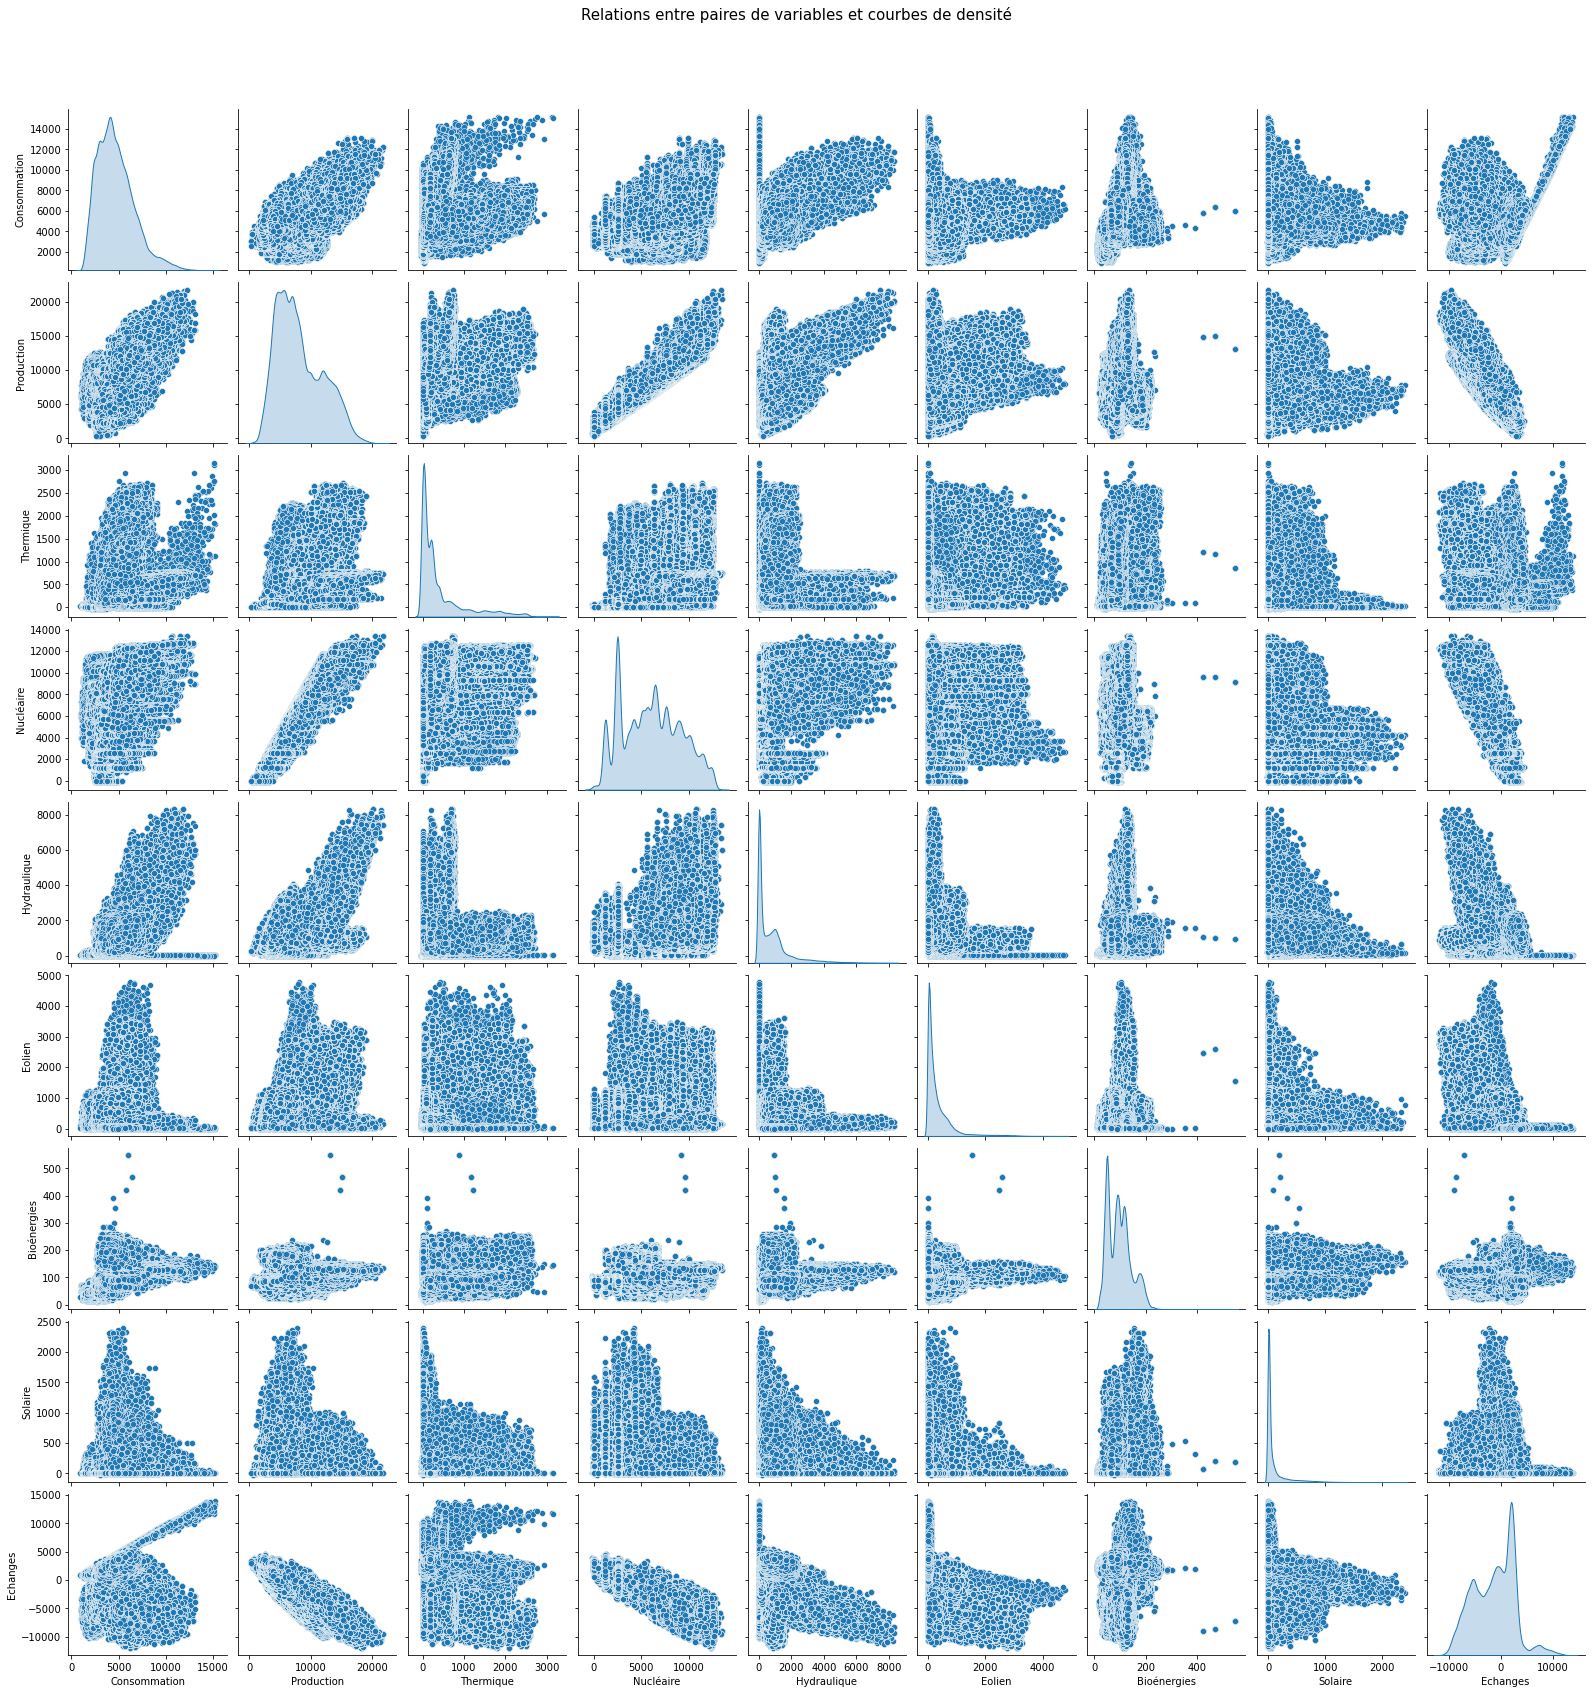

In [43]:
# Analyse des corrélations entre variables
num_env_heure = conso_heure_var.select_dtypes(include ='number')
sns.pairplot(num_env_heure[['Consommation','Production','Thermique','Nucléaire', 'Hydraulique', 
                            'Eolien','Bioénergies', 'Solaire', 'Echanges']], 
             diag_kind='kde').fig.suptitle('Relations entre paires de variables et courbes de densité', fontsize=15, y=1.05);

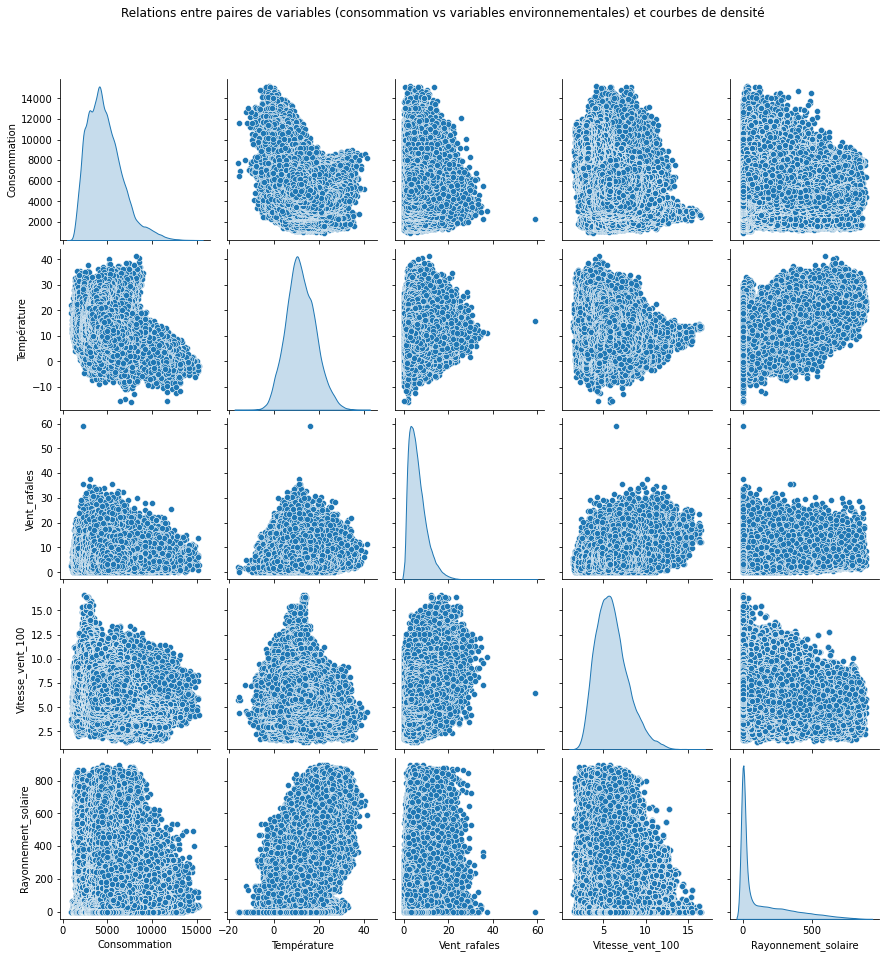

In [44]:
sns.pairplot(num_env_heure[['Consommation', 'Température', 'Vent_rafales', 'Vitesse_vent_100',
                            'Rayonnement_solaire']], diag_kind='kde').fig.suptitle('Relations entre paires de variables (consommation vs variables environnementales) et courbes de densité',
                                                                                   fontsize=12, va='bottom', y=1.05);


In [45]:
# Valeurs manquantes :
valeur_manquante(conso_heure_var)

"Nucléaire":"97723 valeurs manquantes"
"Pompage":"129090 valeurs manquantes"
"Production":"97723 valeurs manquantes"
"Bilan":"97723 valeurs manquantes"


Les valeurs manquantes restantes ne concernent que des variables non explicatives pour le modèle de prédiction. 

#### 1.4.2 Ajout des variables Vacances, jour_ferie et confinement

In [46]:
#Import du fichier jour féries

jf = pd.read_csv('jours_feries_metropole.csv')

display(jf.info())
display(jf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            286 non-null    object
 1   annee           286 non-null    int64 
 2   zone            286 non-null    object
 3   nom_jour_ferie  286 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.1+ KB


None

date  annee       zone   nom_jour_ferie
0  2002-01-01   2002  Métropole      1er janvier
1  2002-04-01   2002  Métropole  Lundi de Pâques
2  2002-05-01   2002  Métropole          1er mai
3  2002-05-08   2002  Métropole            8 mai
4  2002-05-09   2002  Métropole        Ascension

In [47]:
#Ajout de la variable jour ferie (1=férié), (0=non férié)
list_jf = list(jf.date)
conso_heure_var['jour_ferie'] = np.where(conso_heure_var.Date.isin(list_jf),1,0)

In [48]:
#Importation du fichier des Zones de Vacances Scolaire  
vac = pd.read_csv('data.csv')
display(vac.head)

vac = vac.rename({'date':'Date'}, axis=1)
vac['Date'] = pd.to_datetime(vac['Date'])

#Fusion avec conso_heure
conso_heure_var = conso_heure_var.merge(vac, on='Date')

<bound method NDFrame.head of              date  vacances_zone_a  vacances_zone_b  vacances_zone_c  \
0      1990-01-01            False            False            False   
1      1990-01-02            False            False            False   
2      1990-01-03            False            False            False   
3      1990-01-04            False            False            False   
4      1990-01-05            False            False            False   
...           ...              ...              ...              ...   
12413  2023-12-27            False            False            False   
12414  2023-12-28            False            False            False   
12415  2023-12-29            False            False            False   
12416  2023-12-30            False            False            False   
12417  2023-12-31            False            False            False   

      nom_vacances  
0              NaN  
1              NaN  
2              NaN  
3              NaN  


In [49]:
#Création un dictionnaire pour la variable 'Zone'
map_dic = {'Bourgogne-Franche-Comté':'A','Auvergne-Rhône-Alpes':'A','Nouvelle-Aquitaine':'A',
           'Centre-Val de Loire':'B', 'Normandie':'B', 'Hauts-de-France':'B', 'Grand Est':'B', 'Pays de la Loire':'B',
           'Bretagne':'B', "Provence-Alpes-Côte d'Azur":'B', 'Île-de-France':'C','Occitanie':'C'}

conso_heure_var['Zone'] = conso_heure_var['Région'].map(map_dic)

In [50]:
#Création de la variable 'Vacances'
condition = [(conso_heure_var['vacances_zone_a']==True) & (conso_heure_var['Zone']=='A'),
             (conso_heure_var['vacances_zone_b']==True) & (conso_heure_var['Zone']=='B'),
             (conso_heure_var['vacances_zone_c']==True) & (conso_heure_var['Zone']=='C')]

choicelist=[1,1,1]

conso_heure_var['Vacances'] = np.select(condition, choicelist)

In [51]:
#Création de la variable avec les dates du confinement national  (1=confiné), (0=non confiné)
date1 = pd.Timestamp('2020-03-17')
date2 = pd.Timestamp('2020-05-10')
date3 = pd.Timestamp('2020-10-30')
date4 = pd.Timestamp('2020-12-14')
date5 = pd.Timestamp('2021-04-03')
date6 = pd.Timestamp('2021-05-03')

conso_heure_var['confinement'] = [1 if ((d >=date1) & (d<=date2)) else 1 if ((d >=date3) & (d<=date4))
                                  else 1 if (d >=date5) & (d<=date6)
                                  else 0 for d in conso_heure_var.Date]

In [52]:
display(conso_heure_var.info())
display(conso_heure_var.head())
display(valeur_manquante(conso_heure_var))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349039 entries, 0 to 349038
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Code_région             349039 non-null  int64         
 1   Région                  349039 non-null  object        
 2   Nature                  349039 non-null  object        
 3   Date                    349039 non-null  datetime64[ns]
 4   Année                   349039 non-null  int64         
 5   Mois                    349039 non-null  int64         
 6   Semaine                 349039 non-null  UInt32        
 7   Heure                   349039 non-null  object        
 8   Date - Heure            349039 non-null  object        
 9   Saison                  349039 non-null  category      
 10  Consommation            349039 non-null  float64       
 11  Thermique               349039 non-null  float64       
 12  Nucléaire               251316

None

Code_région         Région               Nature       Date  Année  Mois  \
0           11  Île-de-France  Données définitives 2016-01-01   2016     1   
1           11  Île-de-France  Données définitives 2016-01-01   2016     1   
2           11  Île-de-France  Données définitives 2016-01-01   2016     1   
3           11  Île-de-France  Données définitives 2016-01-01   2016     1   
4           11  Île-de-France  Données définitives 2016-01-01   2016     1   

   Semaine  Heure               Date - Heure Saison  Consommation  Thermique  \
0       53  04:00  2016-01-01T04:00:00+01:00  Hiver        7174.0      312.0   
1       53  07:00  2016-01-01T07:00:00+01:00  Hiver        7348.0      312.0   
2       53  10:00  2016-01-01T10:00:00+01:00  Hiver        7746.0      311.0   
3       53  13:00  2016-01-01T13:00:00+01:00  Hiver        8856.0      305.0   
4       53  16:00  2016-01-01T16:00:00+01:00  Hiver        8474.0      305.0   

   Nucléaire  Eolien  Solaire  Hydraulique  Pompage  Bioénergies  Echanges  \
0        NaN     3.0      0.0         10.0      NaN        150.0    6700.0   
1        NaN     1.0      0.0         10.0      NaN        151.0    6874.0   
2        NaN     2.0      2.0         10.0      NaN        150.0    7271.0   
3        NaN     2.0      7.0         10.0      NaN        145.0    8387.0   
4        NaN    10.0      2.0         10.0      NaN        152.0    7993.0   

   Energies_renouvelables  Production  Bilan  Température  Humidité  \
0                   163.0         NaN    NaN          4.9      95.0   
1                   162.0         NaN    NaN          3.9      97.0   
2                   164.0         NaN    NaN          4.9      99.0   
3                   164.0         NaN    NaN          6.4      99.0   
4                   174.0         NaN    NaN          7.4      93.0   

   Vent_rafales  Vitesse_vent_100  Rayonnement_solaire  jour_ferie  \
0           2.3              9.43                 0.00           1   
1           0.9              8.90                 0.00           1   
2           3.5              8.25                12.12           1   
3           4.8              8.29               179.61           1   
4           4.8              8.26               114.67           1   

   vacances_zone_a  vacances_zone_b  vacances_zone_c      nom_vacances Zone  \
0             True             True             True  Vacances de Noël    C   
1             True             True             True  Vacances de Noël    C   
2             True             True             True  Vacances de Noël    C   
3             True             True             True  Vacances de Noël    C   
4             True             True             True  Vacances de Noël    C   

   Vacances  confinement  
0         1            0  
1         1            0  
2         1            0  
3         1            0  
4         1            0

"Nucléaire":"97723 valeurs manquantes"
"Pompage":"129090 valeurs manquantes"
"Production":"97723 valeurs manquantes"
"Bilan":"97723 valeurs manquantes"
"nom_vacances":"206203 valeurs manquantes"


None

In [53]:
vac['nom_vacances'].unique()

array([nan, 'Vacances de la Toussaint', 'Vacances de Noël',
       "Vacances d'hiver", 'Vacances de printemps', "Vacances d'été",
       "Pont de l'Ascension"], dtype=object)

Du à un trés grand nombre de valeurs manquantes pour la variable 'nom_vacances' on choisit de la supprimer et de tester d'abord la variable 'Vacances' voir si elle est corrélée à la consommation. On peut aussi supprimer les variables vacances_zone_a,b et c et Zone qui n'ont servi qu'à créer les variables vacances.

In [54]:
conso_heure_var = conso_heure_var.drop(['vacances_zone_a','vacances_zone_b','vacances_zone_c', 'nom_vacances','Zone'], axis=1)

In [55]:
conso_heure_var.head()

Code_région         Région               Nature       Date  Année  Mois  \
0           11  Île-de-France  Données définitives 2016-01-01   2016     1   
1           11  Île-de-France  Données définitives 2016-01-01   2016     1   
2           11  Île-de-France  Données définitives 2016-01-01   2016     1   
3           11  Île-de-France  Données définitives 2016-01-01   2016     1   
4           11  Île-de-France  Données définitives 2016-01-01   2016     1   

   Semaine  Heure               Date - Heure Saison  Consommation  Thermique  \
0       53  04:00  2016-01-01T04:00:00+01:00  Hiver        7174.0      312.0   
1       53  07:00  2016-01-01T07:00:00+01:00  Hiver        7348.0      312.0   
2       53  10:00  2016-01-01T10:00:00+01:00  Hiver        7746.0      311.0   
3       53  13:00  2016-01-01T13:00:00+01:00  Hiver        8856.0      305.0   
4       53  16:00  2016-01-01T16:00:00+01:00  Hiver        8474.0      305.0   

   Nucléaire  Eolien  Solaire  Hydraulique  Pompage  Bioénergies  Echanges  \
0        NaN     3.0      0.0         10.0      NaN        150.0    6700.0   
1        NaN     1.0      0.0         10.0      NaN        151.0    6874.0   
2        NaN     2.0      2.0         10.0      NaN        150.0    7271.0   
3        NaN     2.0      7.0         10.0      NaN        145.0    8387.0   
4        NaN    10.0      2.0         10.0      NaN        152.0    7993.0   

   Energies_renouvelables  Production  Bilan  Température  Humidité  \
0                   163.0         NaN    NaN          4.9      95.0   
1                   162.0         NaN    NaN          3.9      97.0   
2                   164.0         NaN    NaN          4.9      99.0   
3                   164.0         NaN    NaN          6.4      99.0   
4                   174.0         NaN    NaN          7.4      93.0   

   Vent_rafales  Vitesse_vent_100  Rayonnement_solaire  jour_ferie  Vacances  \
0           2.3              9.43                 0.00           1         1   
1           0.9              8.90                 0.00           1         1   
2           3.5              8.25                12.12           1         1   
3           4.8              8.29               179.61           1         1   
4           4.8              8.26               114.67           1         1   

   confinement  
0            0  
1            0  
2            0  
3            0  
4            0

In [56]:
# Exportation du dataframe en csv
conso_heure_var.to_csv(r'C:\Users\Lenovo\PyConso\conso_heure_var.csv', index = False)
conso_heure_var.shape #(349039, 30)

(349039, 30)

Le jeu de données enregistrées par demi-heure final est : conso_heure_var

#### 1.4.3 Ajout d'autres variables potentiellement explicatives (échelles de temps différentes)

##### 1.4.3.1 Importation et modification des datasets contenant des variables complémentaires

In [57]:
#LES BORNES DE RECHARGE ELECTRIQUE : PYBORNE

# Lecture du dataset (source : https://opendata.reseaux-energies.fr/explore/dataset/bornes-irve/table/)
borne = pd.read_csv('bornes-irve.csv', sep=';',low_memory=False) 
# Error tokenizing data. C error: Expected 12 fields in line 25, saw 14

# Affichage des 1ères lignes de meteo
pd.set_option('display.max_columns', None)
display(borne.head())
display(borne.info())

#1. SELECTION DES VARIABLES NECESSAIRES

# A conserver : Xlongitude, Ylatitude, nbre_pdc (nb de points de recharge par station), date_maj, geo_point_borne, Région

borne_py = borne[['Xlongitude', 'Ylatitude', 'nbre_pdc', 'date_maj', 'Région']]
borne_py.head()

# Conversion de la variable 'Date' au format datetime et création de 2 nouvelles variables 'Année' et 'Mois'
from datetime import datetime as dt
borne_py['date_maj'] = pd.to_datetime(borne_py['date_maj'])

# Création des variables 'Année'et 'Mois'
borne_py['Année']=borne_py['date_maj'].dt.year
borne_py['Mois']=borne_py['date_maj'].dt.month
print('Le jeu de données contient des enregistrements pour les années:', borne_py['Année'].unique())

# Renommer la colonne Date
dico = {'date_maj':'Date', 'Xlongitude':'borne_longitude', 'Ylatitude':'borne_latitude'}
borne_py.rename(dico, axis=1, inplace=True)

borne_py.sort_values(by='Date', ascending=True, inplace=True)

# Dimension de df et intervalle de temps de récolte des données

print("Dimensions du dataset borne_py :",borne_py.shape) # (18142, 7)
print("Les données ont été récoltées sur l'intervalle,", borne_py['Année'].unique()) # 2019 à 2021 (+ 1970)
print('\n')

(borne_py.loc[borne_py['Année']==1970]) # suppression de l'année 1970

borne_py = borne_py[borne_py['Année']!=1970]

## faire la somme du nbre_pdc par région et par date

borne_py = borne_py.groupby(['Année','Mois','Date','Région'])['nbre_pdc'].agg('sum').reset_index()
borne_py.head()

#2. VALEURS MANQUANTES

borne_py.isna().sum()

# Suppression toutes les lignes pour lesquelles on trouve des NaNs pour toutes les variables numériques
borne_py = borne_py.dropna(axis=0, how='all', subset=borne_py.columns[3:8])
borne_py.head()

# Valeurs manquantes

print('Variables avec des valeurs manquantes: \n')
def valeur_manquante(df):
  flag=0
  for col in df.columns:
    if df[col].isna().sum() >0 :
      flag=1
      print(f'"{col}":"{df[col].isna().sum()} valeurs manquantes"')
      if flag==0:
        print("Le dataset ne contient plus de NaNs.")

print('Valeurs manquantes restantes :', valeur_manquante(borne_py))


print("Dimensions du dataset borne_py :",borne_py.shape) # (18043, 7)
print("Les données ont été récoltées sur l'intervalle,", borne_py['Année'].unique()) # 2017 à 2021
print('\n')

# Transformation du type Date de objet à datetime
borne_py['Date'] = pd.to_datetime(borne_py['Date'])

display(borne_py.head())

# Exportation du dataframe df en csv
borne_py.to_csv(r'C:\Users\Lenovo\PyConso\pyborne.csv', index = False)

n_amenageur  \
0                                        SymielecVar   
1  Syndicat Départemental d'Énergie de Loire-Atla...   
2  Syndicat Départemental d'Énergie de Loire-Atla...   
3  Syndicat Départemental d'Énergie de Loire-Atla...   
4  Syndicat Départemental d'Énergie de Loire-Atla...   

                                         n_operateur    n_enseigne  \
0                                              SPBR1  Réseau eborn   
1  Syndicat Départemental d'Énergie de Loire-Atla...        SYDEGO   
2  Syndicat Départemental d'Énergie de Loire-Atla...        SYDEGO   
3  Syndicat Départemental d'Énergie de Loire-Atla...        SYDEGO   
4  Syndicat Départemental d'Énergie de Loire-Atla...        SYDEGO   

          id_station                                         n_station  \
0  FR*EBN*MGSHTS9WRC     Le Cannet-Des-Maures, 48 Avenue du 8 mai 1945   
1     FR*S44*P44126A             La Plaine-sur-Mer | Rue Joseph Rousse   
2     FR*S44*P44005B                   Chaumes-en-Retz | Rue de Nantes   
3     FR*S44*P44188B  Saint-Philbert-de-Grand-Lieu | Place de l'Église   
4     FR*S44*P44071B          Haute-Goulaine | Rue de la Châtaigneraie   

                                          ad_station  code_insee  Xlongitude  \
0  48 Avenue du 8 mai 1945 83340 Le Cannet-Des-Ma...     83340.0    6.342794   
1          Rue Joseph Rousse 44770 La Plaine-sur-Mer         NaN   -2.191869   
2                Rue de Nantes 44320 Chaumes-en-Retz         NaN   -1.937478   
3  Place de l'Église 44310 Saint-Philbert-de-Gran...         NaN   -1.640351   
4       Rue de la Châtaigneraie 44115 Haute-Goulaine         NaN   -1.432675   

   Ylatitude  nbre_pdc           id_pdc  puiss_max type_prise acces_recharge  \
0  43.390503       2.0   FR*EBN*ESECR*2       22.0   T2 - E/F         payant   
1  47.136163       2.0  FR*S44*E44126A2       18.0      T2-EF         Payant   
2  47.114005       2.0  FR*S44*E44005B2       18.0      T2-EF         Payant   
3  47.036010       2.0  FR*S44*E44188B2       18.0      T2-EF         Payant   
4  47.195930       2.0  FR*S44*E44071B2       18.0      T2-EF         Payant   

  accessibilité                            observations    date_maj  \
0   24h/24 7j/7  Badge - Navigateur - Application - TPE  2021-04-01   
1     24/24 7/7                                     NaN  2020-07-10   
2     24/24 7/7                                     NaN  2020-07-10   
3     24/24 7/7                                     NaN  2020-07-10   
4     24/24 7/7                                     NaN  2020-07-10   

                                              source      geo_point_borne  \
0  https://www.data.gouv.fr/fr/datasets/irve-ebor...   43.390503,6.342794   
1  https://www.data.gouv.fr/fr/datasets/bornes-de...  47.136163,-2.191869   
2  https://www.data.gouv.fr/fr/datasets/bornes-de...  47.114005,-1.937478   
3  https://www.data.gouv.fr/fr/datasets/bornes-de...   47.03601,-1.640351   
4  https://www.data.gouv.fr/fr/datasets/bornes-de...   47.19593,-1.432675   

  code_insee_commune                      Région  
0              83031  Provence-Alpes-Côte d'Azur  
1              44126            Pays de la Loire  
2              44005            Pays de la Loire  
3              44188            Pays de la Loire  
4              44071            Pays de la Loire

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18142 entries, 0 to 18141
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   n_amenageur         18136 non-null  object 
 1   n_operateur         18133 non-null  object 
 2   n_enseigne          17917 non-null  object 
 3   id_station          17697 non-null  object 
 4   n_station           18071 non-null  object 
 5   ad_station          18079 non-null  object 
 6   code_insee          16590 non-null  float64
 7   Xlongitude          18112 non-null  float64
 8   Ylatitude           18136 non-null  float64
 9   nbre_pdc            16410 non-null  float64
 10  id_pdc              18142 non-null  object 
 11  puiss_max           18005 non-null  float64
 12  type_prise          18138 non-null  object 
 13  acces_recharge      18134 non-null  object 
 14  accessibilité       18050 non-null  object 
 15  observations        13225 non-null  object 
 16  date

None

Le jeu de données contient des enregistrements pour les années: [2021 2020 1970 2019 2018 2017]
Dimensions du dataset borne_py : (18142, 7)
Les données ont été récoltées sur l'intervalle, [1970 2017 2018 2019 2020 2021]


Variables avec des valeurs manquantes: 

Valeurs manquantes restantes : None
Dimensions du dataset borne_py : (403, 5)
Les données ont été récoltées sur l'intervalle, [2017 2018 2019 2020 2021]




C:\Users\Lenovo\AppData\Local\Temp/ipykernel_9504/3117439950.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borne_py['date_maj'] = pd.to_datetime(borne_py['date_maj'])
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_9504/3117439950.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borne_py['Année']=borne_py['date_maj'].dt.year
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_9504/3117439950.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Année  Mois       Date                      Région  nbre_pdc
0   2017     1 2017-01-03                   Occitanie     120.0
1   2017     1 2017-01-04  Provence-Alpes-Côte d'Azur       2.0
2   2017     1 2017-01-06             Hauts-de-France       2.0
3   2017     1 2017-01-20             Hauts-de-France     136.0
4   2017     1 2017-01-31          Nouvelle-Aquitaine     328.0

In [58]:
## LES DONNEES DE DISTRIBUTION D'ENERGIE : PYCHAUFFAGE

# Données locales de consommation d'énergie (période 2008-2017) - chaleur et froid

# Informations sur les données et sur les variables sur : liste-des-variables-chaleur-et-froid-2017-et-avant.pdf
# Source : https://www.statistiques.developpement-durable.gouv.fr/donnees-locales-de-consommation-denergie-periode-2008-2017-chaleur-et-froid

# Lecture du dataset 1
py_chauffage17 = pd.read_csv('Donnees-locales-de-consommation-denergie-periode-2008-2017-chaleur-et-froid.csv', sep=';',low_memory=False) 
# Error tokenizing data. C error: Expected 12 fields in line 25, saw 14

# Affichage des 1ères lignes de meteo
pd.set_option('display.max_columns', None)
py_chauffage17.head()
py_chauffage17.info()

# Lecture du dataset 2
py_chauffage18 = pd.read_csv('Donnees-de-consommation-et-de-points-de-livraison-denergie-a-la-maille-commune-chaleur-et-froid-annee-2018.csv', sep=';',low_memory=False) 
# Error tokenizing data. C error: Expected 12 fields in line 25, saw 14

# Affichage des 1ères lignes de meteo
pd.set_option('display.max_columns', None)
py_chauffage18.head()
py_chauffage18.info()

# Lecture du dataset 3
py_chauffage19 = pd.read_csv('Donnees-de-consommation-et-de-points-de-livraison-denergie-a-la-maille-commune-chaleur-et-froid-annee-2019.csv', sep=';',low_memory=False) 
# Error tokenizing data. C error: Expected 12 fields in line 25, saw 14

# Affichage des 1ères lignes de meteo
pd.set_option('display.max_columns', None)
py_chauffage19.head()
py_chauffage19.info()

# Lecture du dataset 4
py_chauffage20 = pd.read_csv('Donnees-de-consommation-et-de-points-de-livraison-denergie-a-la-maille-commune-chaleur-et-froid-annee-2020.csv', sep=';',low_memory=False) 
# Error tokenizing data. C error: Expected 12 fields in line 25, saw 14

# Affichage des 1ères lignes de meteo
pd.set_option('display.max_columns', None)
py_chauffage20.head()
py_chauffage20.info()

## Une variable en plus : 'Niveau de rejet en CO2 des réseaux en analyse du cycle de vie -ACV- (en kg/kWh)'

# suppression de la variable en plus du dataset4
py_chauffage20.drop('Niveau de rejet en CO2 des réseaux en analyse du cycle de vie -ACV- (en kg/kWh)', axis=1, inplace=True)

# On concate les datasets 2,3 et 4
py_chauffage18_19 = pd.concat([py_chauffage18, py_chauffage19], axis=0)
py_chauffage18_20 = pd.concat([py_chauffage18_19, py_chauffage20], axis=0)

# on renomme la colonne Code géographique du territoire du dataset 1 en Code géographique du territoire - Code de la zone
py_chauffage17.rename({'Code géographique du territoire':'Code géographique du territoire - Code de la zone'} , axis=1, inplace=True)
# on supprime la colonne Code géographique du territoire - Libellé de la zone de py_chauffage18_20
py_chauffage18_20.drop('Code géographique du territoire - Libellé de la zone', axis=1, inplace=True)

# On concate py_chauffage17 et 18_20
py_chauffage = pd.concat([py_chauffage18_20, py_chauffage17], axis=0)

py_chauffage['Millésime des données'].unique()

py_chauffage['Énergie concernée'].unique() # 'C' pour chaleur et 'F' pour froid

# 1. SELECTION DES VARIABLES NECESSAIRES

# On supprime la première ligne
py_chauffage.drop(py_chauffage.index[0], inplace=True)

#****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
# On ne garde que certaines colonnes :
py_chauffage = py_chauffage[['Millésime des données', 'Énergie concernée', 'Code géographique du territoire - Code de la zone','Production thermique sur le réseau de la filière chaudieres electriques (en MWh)',
                            'Production thermique sur le réseau de la filière geothermie (en MWh)','Production thermique sur le réseau de la filière Pompes à chaleur (en MWh)',
                             'Production thermique sur le réseau de la filière solaire thermique (en MWh)','Production thermique sur le réseau de la filière Autres énergies renouvelables (en MWh)','Nombre de points de livraison']]


# Transformer la variable 'Code géographique du territoire - Code de la zone' en 'Région'
ARA = ['01','03','07','15','26','38','42','43','63','69','73','74']
BFC = ['21','25','39','58','70','71','89', '90']
BRE = ['22', '29', '35', '56']
CVL = ['18', '26', '28', '37', '41', '45']
GE = ['08', '10', '51', '52', '54', '55', '57', '67', '68', '88']
HDF = ['02', '59', '60', '62','80']
IDF = ['75', '77', '78', '91', '92', '93', '94', '95']
NOR = ['14', '27', '50', '61','76']
NA = ['16','17', '19', '23', '24', '33', '40', '47', '64', '79', '86', '87']
OCC = ['09','11', '12', '30', '31', '32', '34', '46', '48', '65', '66', '81', '82']
PLL = ['44', '49', '53', '72', '85']
PACA = ['04', '05', '06', '13', '83', '84']

# On crée la variable département
py_chauffage['Code géographique du territoire - Code de la zone']=py_chauffage['Code géographique du territoire - Code de la zone'].astype(str)
py_chauffage['departement']= py_chauffage['Code géographique du territoire - Code de la zone'].apply(lambda x : x[:2]).astype(str)
py_chauffage = py_chauffage[(py_chauffage['departement']!='na')&(py_chauffage['departement']!='2B')]
py_chauffage.head()

regions = []
for i in py_chauffage['departement']:
    if i in ARA:
        regions.append('Auvergne-Rhône-Alpes')
    elif i in BFC :
        regions.append('Bourgogne-Franche-Comté')
    elif i in BRE :
        regions.append('Bretagne')
    elif i in CVL:
        regions.append('Centre-Val de Loire')
    elif i in GE :
        regions.append('Grand Est')
    elif i in HDF:
        regions.append('Hauts-de-France')
    elif i in IDF:
        regions.append('Île-de-France')
    elif i in NOR:
        regions.append('Normandie')
    elif i in NA:
        regions.append('Nouvelle-Aquitaine')
    elif i in OCC:
        regions.append('Occitanie')
    elif i in PLL:
        regions.append('Pays de la Loire')
    elif i in PACA:
        regions.append("Provence-Alpes-Côte d'Azur")
    else :
        regions.append("nan")

regions

py_chauffage['Région']= regions
py_chauffage=py_chauffage[py_chauffage['Région']!='nan']


# Ajouter les Code-région
codes = []
for i in py_chauffage['Région']:
    if i == 'Auvergne-Rhône-Alpes':
        codes.append(84)
    elif i == 'Bourgogne-Franche-Comté' :
        codes.append(27)
    elif i == 'Bretagne' :
        codes.append(53)
    elif i == 'Centre-Val de Loire':
        codes.append(24)
    elif i == 'Grand Est' :
        codes.append(44)
    elif i == 'Hauts-de-France':
        codes.append(32)
    elif i == 'Île-de-France':
        codes.append(11)
    elif i == 'Normandie':
        codes.append(28)
    elif i == 'Nouvelle-Aquitaine':
        codes.append(75)
    elif i == 'Occitanie':
        codes.append(76)
    elif i == 'Pays de la Loire':
        codes.append(52)
    elif i == "Provence-Alpes-Côte d'Azur":
        codes.append(93)
    else :
        codes.append("nan")

py_chauffage['Code_région']= codes
py_chauffage=py_chauffage[py_chauffage['Code_région']!='nan']

py_chauffage.drop(['Code géographique du territoire - Code de la zone','departement'], axis=1, inplace=True)

# On renomme :
dico_var={'Millésime des données':'Année','Énergie concernée':'type_nrj_therm', 
          'Production thermique sur le réseau de la filière chaudieres electriques (en MWh)':'prod_chaudiere',
          'Production thermique sur le réseau de la filière geothermie (en MWh)':'prod_geothermie',
      'Production thermique sur le réseau de la filière Pompes à chaleur (en MWh)':'prod_pompe_chaleur', 
          'Production thermique sur le réseau de la filière solaire thermique (en MWh)':'prod_solaire',
          'Production thermique sur le réseau de la filière Autres énergies renouvelables (en MWh)':'prod_autre_renouvelable',
         'Nombre de points de livraison':'points_livraison'}
py_chauffage=py_chauffage.rename(dico_var, axis=1)

# Création d'un fichier texte pour préciser la définition des variables
with open ('PyChauffage_variables.txt', 'w') as f:
    f.write("'Millésime des données':'Année','Énergie concernée':'type_nrj_therm', 'Production thermique sur le réseau de la filière chaudieres electriques (en MWh)':'prod_chaudiere','Production thermique sur le réseau de la filière geothermie (en MWh)':'prod_geothermie','Production thermique sur le réseau de la filière Pompes à chaleur (en MWh)':'prod_pompe_chaleur', 'Production thermique sur le réseau de la filière solaire thermique (en MWh)':'prod_solaire','Production thermique sur le réseau de la filière Autres énergies renouvelables (en MWh)':'prod_autre_renouvelable', 'Nombre de points de livraison':'points_livraison'")

#2. VALEURS MANQUANTES

py_chauffage.groupby('Année').count()

py_chauffage['Année']=py_chauffage['Année'].astype(int)
py_chauffage['Code_région']=py_chauffage['Code_région'].astype(int)

# suppression des années 2008 à 2012
liste_annees = [2013, 2014,2015,2016,2017,2018,2019,2020]
py_chauffage = py_chauffage.loc[py_chauffage['Année'].isin(liste_annees)]

py_chauffage.groupby('type_nrj_therm').count()

#On ne peut pas prédire une consommation à partir de productions donc on ne gardera pour le modèle prédictif que les points_livraison qu'on séparera en 2 variables points_livraison_chaud et points_livraison_froid.

#On crée deux variables indicatrices du type chaud ou froid de l'énergie distribuée
py_chauffage=pd.get_dummies(py_chauffage, columns=['type_nrj_therm'], prefix='type', prefix_sep='_')

# On crée 2 nouvelles variables nous donnant le nombre de points de livraison d'énergie type chaud et type froid
chaud=[]
froid=[]
for i,j in zip(py_chauffage['points_livraison'],py_chauffage['type_C']) :
    if j==1:
        chaud.append(i)
    else:
        chaud.append(0)
for i,j in zip(py_chauffage['points_livraison'],py_chauffage['type_F']) :
    if j==1:
        froid.append(i)
    else:
        froid.append(0)
py_chauffage['points_livraison_chaud']=chaud
py_chauffage['points_livraison_froid']=froid

# On supprime les variables productions, point_livraison et les variables crées par get_dummies
py_chauffage.drop(['prod_chaudiere','prod_geothermie','prod_pompe_chaleur','prod_solaire','prod_autre_renouvelable', 'points_livraison','type_C', 'type_F'], axis=1, inplace=True)

py_chauffage.isna().sum()

# Tri par région et année
py_chauffage=py_chauffage.sort_values(by=['Code_région','Région','Année'], ascending=True)

#suppression des valeurs manquantes
py_chauffage.dropna(axis=0, inplace=True)

display(py_chauffage['points_livraison_chaud'].unique())
display(py_chauffage['points_livraison_froid'].unique())

# Les chiffres sont en strings donc besoin de les convertir en int et de supprmier 'secret'
py_chauffage=py_chauffage[py_chauffage['points_livraison_chaud']!= 'secret']


py_chauffage['points_livraison_chaud']=py_chauffage['points_livraison_chaud'].astype('int')
py_chauffage['points_livraison_froid']=py_chauffage['points_livraison_froid'].astype('int')

# Somme des points de livraison par région
var_names = ['points_livraison_chaud','points_livraison_froid']
py_chauffage_final = py_chauffage.groupby(['Année','Code_région','Région'])[var_names].agg('sum').reset_index() #comme beaucoup de NaNs faire plutôt la moyenne que la somme


py_chauffage_final['Année']=py_chauffage_final['Année'].astype('int')

print("Dimensions du dataset :",py_chauffage_final.shape) # (96, 5)
print("Les données ont été récoltées sur l'intervalle,", py_chauffage_final['Année'].unique()) # 2013 à 2020
print('\n')
display(py_chauffage_final.head())

# Exportation du dataframe df en csv

py_chauffage_final.to_csv(r'C:\Users\Lenovo\PyConso\pychauffage.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5215 entries, 0 to 5214
Data columns (total 59 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                 --------------  ----- 
 0   Opérateur                                                                                                              5213 non-null   object
 1   Millésime des données                                                                                                  5214 non-null   object
 2   Énergie concernée                                                                                                      5214 non-null   object
 3   Code géographique du territoire                                                                                        5214 non-null   object
 4   Puissa

array(['5619', '14', '32', '123', '80', '22', '34', '23', '64', '20',
       '30', '101', '97', '89', '29', '24', '142', '27', '175', '91',
       '366', '17', '13', '61', '15', '26', '9', '73', '202', '62', '85',
       '18', '100', '43', '79', '215', '11', '36', '10', '290', '149',
       '48', '50', '31', '47', '53', '68', '45', '258', '150', '105',
       '41', '71', '39', '135', '76', '83', '60', '96', '143', '344',
       '57', '119', '69', '12', 0, '5665', '21', '82', '363', '104', '44',
       '37', '305', '51', '46', '25', '270', '130', '146', '86', '88',
       '347', '59', '169', '5926', '35', '33', '237', '84', '16', '19',
       '63', '125', '173', '38', '320', '52', '40', '225', '108', '152',
       '81', '65', '72', '369', '172', '6012', '128', '106', '2', '250',
       '244', '204', '414', '42', '307', '109', '124', '161', '90', '110',
       '380', '75', '55', '6134', '134', '112', '3', '222', '371', '264',
       '126', '66', '432', '54', '164', '170', '103', '111', '

array([0, '541', '13', '123', '67', '2', '10', '16', '68', '567', '14',
       '69', '5', '3', '591', '143', '17', '70', '617', '127', '8', '638',
       '18', '130', '12', '21', '112', '664', '200', '115', '71', '135',
       '19', '690', '40', '705', '22', '7', '11', '55', '54', '23', '6',
       '24', '1', '25', '56', '4', '45', '62', '9', '95', '78', '88',
       '31'], dtype=object)

Dimensions du dataset : (96, 5)
Les données ont été récoltées sur l'intervalle, [2013 2014 2015 2016 2017 2018 2019 2020]




Année  Code_région                   Région  points_livraison_chaud  \
0   2013           11            Île-de-France                   11839   
1   2013           24      Centre-Val de Loire                     886   
2   2013           27  Bourgogne-Franche-Comté                    1444   
3   2013           28                Normandie                    3782   
4   2013           32          Hauts-de-France                    1464   

   points_livraison_froid  
0                     842  
1                       0  
2                       0  
3                       0  
4                       0

In [59]:
# Définition des variables
print('Variables de pychauffage :\n')
with open('PyChauffage_variables.txt','r') as f:
    f_contenu=f.read()
    print(f_contenu)
print('\n')
print('Variables de pysecteur :\n')
with open('PySecteurs_variables.txt','r') as f:
    f_contenu=f.read()
    print(f_contenu)

Variables de pychauffage :

'Millésime des données':'Année','Énergie concernée':'type_nrj_therm', 'Production thermique sur le réseau de la filière chaudieres electriques (en MWh)':'prod_chaudiere','Production thermique sur le réseau de la filière geothermie (en MWh)':'prod_geothermie','Production thermique sur le réseau de la filière Pompes à chaleur (en MWh)':'prod_pompe_chaleur', 'Production thermique sur le réseau de la filière solaire thermique (en MWh)':'prod_solaire','Production thermique sur le réseau de la filière Autres énergies renouvelables (en MWh)':'prod_autre_renouvelable', 'Nombre de points de livraison':'points_livraison'


Variables de pysecteur :

Variables pour 5 secteurs (Agriculture, Industriel, Tertiaire, Résidentiel et Autre):
 conso_ (ex :conso_agri) : Consommation d'électricité par secteur (en MWh) ;
 pdl_(ex :nb_elec_agri): nombre de points de livraison dans un secteur;
 indqual_ (ex:part_agri): Pourcentage de la consommation annuelle dans un secteur (01/01 a

In [60]:
## DONNEES LIEES A LA DISTRIBUTION D'ENERGIE EN FONCTION DES SECTEURS D'ACTIVITE : PYSECTEURS

#Consommation annuelle d’électricité et gaz par département et par secteur d’activité

#Informations sur les données et sur les variables sur : note_methodologique_2021_10_20.pdf
#Source : https://www.data.gouv.fr/fr/datasets/consommation-annuelle-delectricite-et-gaz-par-departement-et-par-secteur-dactivite/

# Lecture du dataset 1
py_secteurs = pd.read_csv('conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-departement.csv', sep=';',low_memory=False) 
# Error tokenizing data. C error: Expected 12 fields in line 25, saw 14

# Affichage des 1ères lignes de meteo
pd.set_option('display.max_columns', None)
display(py_secteurs.head())
display(py_secteurs.info())

py_secteurs.annee.unique()

py_secteurs.libelle_region.unique()

#SELECTION DES VARIABLES NECESSAIRES

#On ne garde que la filière électricité
py_secteurs=elc_secteurs=py_secteurs[py_secteurs['filiere']=='Electricité']

# On ne garde que les régions métropolitaines
liste_regions = ['Occitanie', 'Hauts-de-France', 'Auvergne-Rhône-Alpes',
       "Provence-Alpes-Côte d'Azur", 'Grand Est', 'Nouvelle-Aquitaine',
       'Bretagne', 'Bourgogne-Franche-Comté', 'Pays de la Loire',
       'Normandie', 'Île-de-France', 'Centre-Val de Loire']
py_secteurs=elc_secteurs=py_secteurs.loc[py_secteurs['libelle_region'].isin(liste_regions)]

#On ne garde que les années 2013 à 2020
liste_annee = [2013,2014,2015,2016,2017,2018,2019,2020]
py_secteurs=py_secteurs.loc[py_secteurs['annee'].isin(liste_annee)]

print(py_secteurs.filiere.unique())
print(py_secteurs.libelle_region.unique())

#on supprime les colonnes 'filiere', geom', 'operateur', 'nombre_maille_secretisees_a', 'nombre_maille_secretisees_i','nombre_maille_secretisees_t', nombre_maille_secretisees_r, nombre_maille_secretisees_na, libelle_departement, code_departement,id_filiere,consototale 
py_secteurs=py_secteurs.drop(['filiere', 'geom', 'operateur', 'nombre_maille_secretisees_a', 'nombre_maille_secretisees_i','nombre_maille_secretisees_t', 'nombre_maille_secretisees_r', 
                                  'nombre_maille_secretisees_na', 'libelle_departement','code_departement','id_filiere','consototale'], axis=1)

# On renomme :
dico1={'annee':'Année','consoa':'conso_agri', 'pdla':'nb_elec_agri', 'indquala':'part_agri',
      'consoi':'conso_indus', 'pdli':'nb_elec_indus', 'indquali':'part_indus',
      'consot':'conso_ter', 'pdlt':'nb_elec_ter', 'indqualt':'part_ter',
      'consor':'conso_resi', 'pdlr':'nb_elec_resi', 'indqualr':'part_resi',
      'consona':'conso_autre', 'pdlna':'nb_elec_autre', 'indqualna':'part_autre', 
       'code_region':'Code_région', 'libelle_region':'Région'}
py_secteurs=py_secteurs.rename(dico1, axis=1)
display(py_secteurs.head())
display(py_secteurs.info())

# On obtient un dataset sans valeurs manquantes

# Création d'un fichier texte pour préciser la définition des variables
with open ('PySecteurs_variables.txt', 'w') as f:
    f.write("Variables pour 5 secteurs (Agriculture, Industriel, Tertiaire, Résidentiel et Autre):\n conso_ (ex :conso_agri) : Consommation d'électricité par secteur (en MWh) ;\n pdl_(ex :nb_elec_agri): nombre de points de livraison dans un secteur;\n indqual_ (ex:part_agri): Pourcentage de la consommation annuelle dans un secteur (01/01 au 31/12);\n ")

# Tri par région et année
py_secteurs['Année']=py_secteurs['Année'].astype('int')
py_secteurs=py_secteurs.sort_values(by=['Code_région','Région','Année'], ascending=True)

# Somme des points de livraison par région
var_names = py_secteurs.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
var_names
py_secteurs = py_secteurs.groupby(['Code_région','Région','Année'])[var_names].agg('sum').reset_index() 

display(py_secteurs.head())
print("Dimensions du dataset :",py_secteurs.shape) # (2507, 13)
print("Les données ont été récoltées sur l'intervalle,", py_secteurs['Année'].unique()) # 2013 à 2020

# Exportation du dataframe df en csv

py_secteurs.to_csv(r'C:\Users\Lenovo\PyConso\pysecteurs.csv', index = False)

operateur  annee      filiere  \
0  Coopérative d’électricité de Saint-Martin de L...   2011  Electricité   
1                                             Enedis   2011  Electricité   
2                                             Enedis   2011  Electricité   
3                                             Enedis   2011  Electricité   
4                                             Enedis   2011  Electricité   

     consoa  pdla  nombre_maille_secretisees_a  indquala     consoi  pdli  \
0   1414.68    22                            0     1.000   15865.01    66   
1  26490.69   334                            0     0.957  838010.71   633   
2  25747.90   373                            0     0.976  426364.02   553   
3   6611.47    62                            0     0.949   44404.66   213   
4   6496.52    70                            0     0.934  510119.99   501   

   nombre_maille_secretisees_i  indquali     consot  pdlt  \
0                            0     1.000   61451.25   239   
1                            0     0.959  515742.32  2069   
2                            0     0.954  430434.21  1813   
3                            0     0.944  323814.05  1984   
4                            0     0.967  232299.15  1106   

   nombre_maille_secretisees_t  indqualt      consor    pdlr  \
0                            0     1.000   257484.67   34495   
1                            0     0.938  1472026.60  259239   
2                            0     0.935  1130822.23  219826   
3                            0     0.923   561238.84  123947   
4                            0     0.936   773083.38  156013   

   nombre_maille_secretisees_r  indqualr  consona  pdlna  \
0                            0     1.000   826.39     17   
1                            2     0.301  3010.34     44   
2                            0     0.285  3822.28     47   
3                            0     0.311  1343.35     44   
4                            0     0.318    84.85     24   

   nombre_maille_secretisees_na  indqualna code_departement  \
0                             0      1.000               34   
1                             0      0.568               02   
2                             0      0.871               03   
3                             0      0.320               05   
4                             0      0.930               08   

  libelle_departement  code_region              libelle_region  id_filiere  \
0             Hérault           76                   Occitanie         100   
1               Aisne           32             Hauts-de-France         100   
2              Allier           84        Auvergne-Rhône-Alpes         100   
3        Hautes-Alpes           93  Provence-Alpes-Côte d'Azur         100   
4            Ardennes           44                   Grand Est         100   

   geom  consototale  
0   NaN    337042.00  
1   NaN   2855280.66  
2   NaN   2017190.64  
3   NaN    937412.37  
4   NaN   1522083.89

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   operateur                     5023 non-null   object 
 1   annee                         5023 non-null   int64  
 2   filiere                       5023 non-null   object 
 3   consoa                        5023 non-null   float64
 4   pdla                          5023 non-null   int64  
 5   nombre_maille_secretisees_a   5023 non-null   int64  
 6   indquala                      5023 non-null   float64
 7   consoi                        5023 non-null   float64
 8   pdli                          5023 non-null   int64  
 9   nombre_maille_secretisees_i   5023 non-null   int64  
 10  indquali                      5023 non-null   float64
 11  consot                        5023 non-null   float64
 12  pdlt                          5023 non-null   int64  
 13  nom

None

['Electricité']
['Auvergne-Rhône-Alpes' 'Hauts-de-France' 'Normandie' 'Nouvelle-Aquitaine'
 'Bretagne' 'Occitanie' 'Centre-Val de Loire' 'Grand Est'
 'Pays de la Loire' 'Île-de-France' "Provence-Alpes-Côte d'Azur"
 'Bourgogne-Franche-Comté']


Année  conso_agri  nb_elec_agri  part_agri  conso_indus  nb_elec_indus  \
283   2013    32234.43           306      0.944   1196983.07           1542   
284   2013    24021.49           348      0.949    844276.98            658   
285   2013    19696.14           178      0.909    843745.59            912   
286   2013    41154.30           624      0.973    522074.56            680   
287   2013   216850.24           951      0.929    830061.02            831   

     part_indus   conso_ter  nb_elec_ter  part_ter  conso_resi  nb_elec_resi  \
283       0.965   784307.99         3176     0.942  2200496.29        322329   
284       0.964   536491.03         2154     0.941  1607453.71        261386   
285       0.956  1001358.57         4197     0.941  2591360.11        433203   
286       0.961   432590.80         1840     0.947  1253537.05        210205   
287       0.960   708861.57         2886     0.943  2398240.60        381615   

     part_resi  conso_autre  nb_elec_autre  part_autre  Code_région  \
283      0.408     35278.53             37       0.847           84   
284      0.407      3113.02             39       0.584           32   
285      0.414      4105.87             46       0.859           28   
286      0.426       908.92             31       0.931           75   
287      0.398      3880.29             38       0.650           53   

                   Région  
283  Auvergne-Rhône-Alpes  
284       Hauts-de-France  
285             Normandie  
286    Nouvelle-Aquitaine  
287              Bretagne

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2507 entries, 283 to 4963
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Année          2507 non-null   int64  
 1   conso_agri     2507 non-null   float64
 2   nb_elec_agri   2507 non-null   int64  
 3   part_agri      2507 non-null   float64
 4   conso_indus    2507 non-null   float64
 5   nb_elec_indus  2507 non-null   int64  
 6   part_indus     2507 non-null   float64
 7   conso_ter      2507 non-null   float64
 8   nb_elec_ter    2507 non-null   int64  
 9   part_ter       2507 non-null   float64
 10  conso_resi     2507 non-null   float64
 11  nb_elec_resi   2507 non-null   int64  
 12  part_resi      2507 non-null   float64
 13  conso_autre    2507 non-null   float64
 14  nb_elec_autre  2507 non-null   int64  
 15  part_autre     2507 non-null   float64
 16  Code_région    2507 non-null   int64  
 17  Région         2507 non-null   object 
dtypes: flo

None

Code_région         Région  Année  conso_agri  nb_elec_agri  part_agri  \
0           11  Île-de-France   2013    61238.32           798      7.228   
1           11  Île-de-France   2014    58446.04           806      7.291   
2           11  Île-de-France   2015    73435.16           824     10.383   
3           11  Île-de-France   2016    60987.54           822     10.315   
4           11  Île-de-France   2017    68540.41           785     10.136   

   conso_indus  nb_elec_indus  part_indus    conso_ter  nb_elec_ter  part_ter  \
0   8086424.23          11305      14.405  29899407.56        78870    15.552   
1   7821384.62          11512      14.375  28399508.74        80270    15.540   
2   7936284.12          11759      19.473  28943071.05        82099    19.620   
3   7901979.57          11962      17.384  28997321.88        84912    18.577   
4   7952745.85          12306      18.373  28697455.33        85776    19.426   

    conso_resi  nb_elec_resi  part_resi  conso_autre  nb_elec_autre  \
0  32134636.70       6226905      3.231    212862.48           1586   
1  29127541.95       6272637      3.223    102861.08           1452   
2  30170690.66       6359691      8.207    173146.63           1450   
3  31010320.21       6409602      6.735    151711.75            483   
4  30229311.34       6468000      8.461     22377.04            128   

   part_autre  
0      3.9690  
1      3.8930  
2      7.8020  
3      9.0940  
4      3.2226

Dimensions du dataset : (96, 18)
Les données ont été récoltées sur l'intervalle, [2013 2014 2015 2016 2017 2018 2019 2020]


In [61]:
# DONNEES LIEES AUX DENSITES DE POPULATION : dfpop

dfpop = pd.read_csv('Pop_globale_2013-2022.csv', sep=';') # densité de population et tranches d'âges

#Affichage du jeu de données
display(dfpop.head())

# On renomme la variable 'Régions' en 'Région' du dfpop
dfpop.rename({'Régions':'Région'}, axis=1, inplace=True)
dfpop=dfpop.replace('Centre-Val-de-Loire','Centre-Val de Loire')

dfpop.to_csv(r'C:\Users\Lenovo\PyConso\dfpop.csv', index = False)

Régions  0-19 ans  20-39 ans  40-59 ans  60-74 ans  \
0     Auvergne-Rhône-Alpes   1954478    1919182    2101152    1363175   
1  Bourgogne-Franche-Comté    626265     597756     714566     544240   
2                 Bretagne    775071     727225     874530     648720   
3      Centre-Val-de-Loire    598665     546806     658975     485719   
4                    Corse     70622      75611      93686      65846   

   75 ans - plus  Total_Population  Année  
0         775818           8113805   2021  
1         308982           2791809   2021  
2         360869           3386415   2021  
3         277603           2567768   2021  
4          40845            346610   2021

<AxesSubplot:>

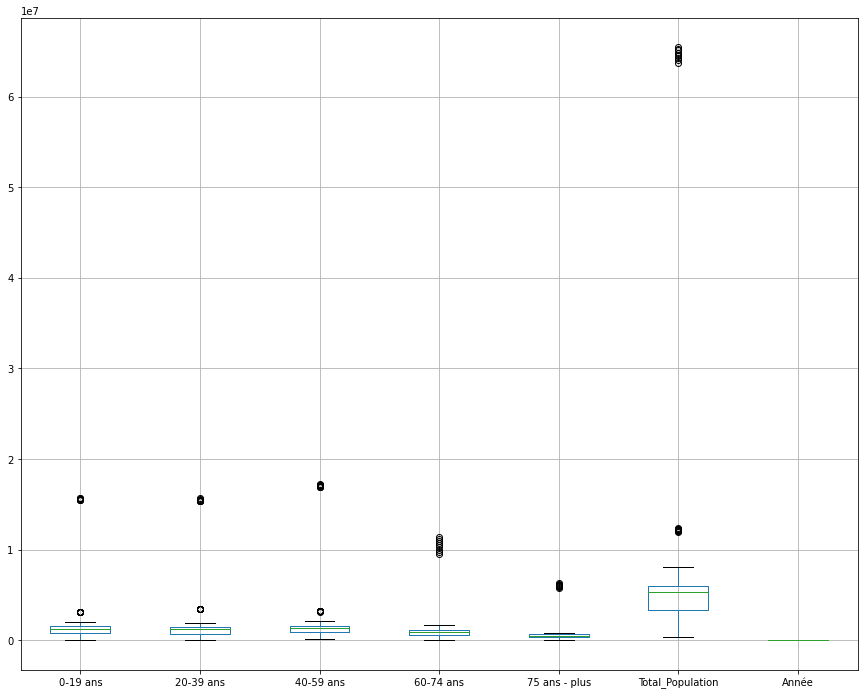

In [62]:
# Distribution de la population par tranche d'âge
plt.figure(figsize=(15,12))
dfpop.boxplot()

In [63]:
dfpop[['Région','Total_Population']][dfpop['Total_Population']>60000000]

Région  Total_Population
13   France métropolitaine          65447454
27   France métropolitaine          65284389
41   France métropolitaine          65096768
55   France métropolitaine          64844037
69   France métropolitaine          64639133
83   France métropolitaine          64468792
97   France métropolitaine          64300821
111  France métropolitaine          64027958
125  France métropolitaine          63697865

<AxesSubplot:>

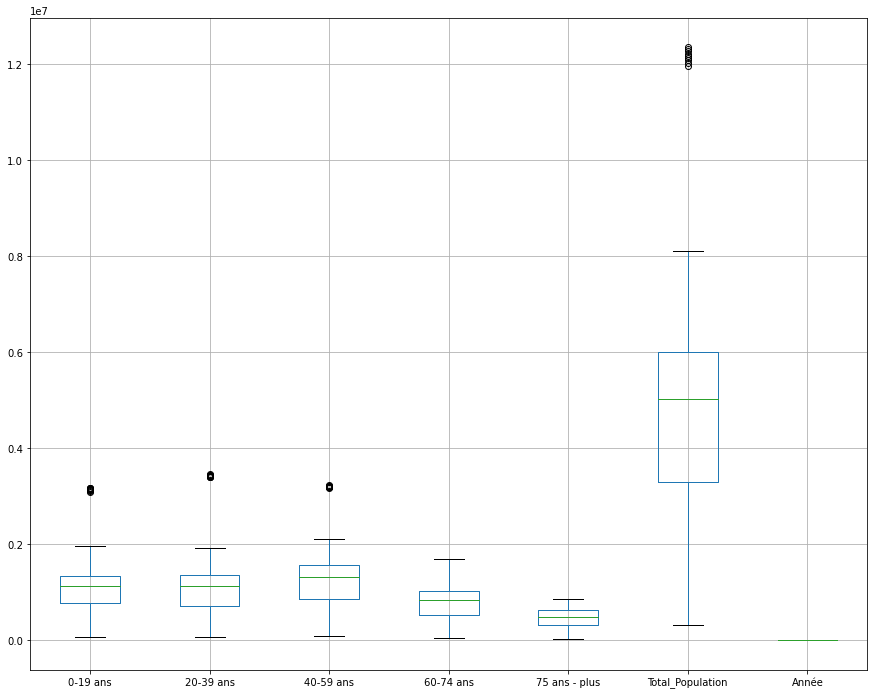

In [64]:
dfpop = dfpop[dfpop['Région']!='France métropolitaine'] #suppression de la 'Région' 'France métropolitaine'

# Distribution de la population par tranche d'âge
plt.figure(figsize=(15,12))
dfpop.boxplot()

In [65]:
#Outliers Total_Population
pop_outliers = dfpop[['Année','Région','Total_Population']][dfpop['Total_Population']>10000000] 
display(pop_outliers)


Année         Région  Total_Population
7     2021  Île-de-France          12348605
21    2020  Île-de-France          12308593
35    2019  Île-de-France          12262544
49    2018  Île-de-France          12213447
63    2017  Île-de-France          12174880
77    2016  Île-de-France          12117132
91    2015  Île-de-France          12082144
105   2014  Île-de-France          12027565
119   2013  Île-de-France          11959807

In [66]:
#Outliers 0-19 ans
dfpop[['Année','Région','0-19 ans']][dfpop['0-19 ans']>3000000] 
#Ils correspondent à la région Ile-de-France beaucoup plus peuplée que les autres régions

Année         Région  0-19 ans
7     2021  Île-de-France   3167904
21    2020  Île-de-France   3169861
35    2019  Île-de-France   3164236
49    2018  Île-de-France   3155638
63    2017  Île-de-France   3146029
77    2016  Île-de-France   3132488
91    2015  Île-de-France   3127492
105   2014  Île-de-France   3107383
119   2013  Île-de-France   3093352

In [67]:
#Outliers 20-39 ans
dfpop[['Année','Région','20-39 ans']][dfpop['20-39 ans']>3000000] 
#Ils correspondent à la région Ile-de-France beaucoup plus peuplée que les autres régions

Année         Région  20-39 ans
7     2021  Île-de-France    3396669
21    2020  Île-de-France    3396917
35    2019  Île-de-France    3401028
49    2018  Île-de-France    3429591
63    2017  Île-de-France    3428805
77    2016  Île-de-France    3425345
91    2015  Île-de-France    3433558
105   2014  Île-de-France    3446573
119   2013  Île-de-France    3463237

In [68]:
#Outliers 40-59 ans
dfpop[['Année','Région','40-59 ans']][dfpop['40-59 ans']>3000000] 
#Ils correspondent à la région Ile-de-France beaucoup plus peuplée que les autres régions

Année         Région  40-59 ans
7     2021  Île-de-France    3227280
21    2020  Île-de-France    3219363
35    2019  Île-de-France    3217757
49    2018  Île-de-France    3201501
63    2017  Île-de-France    3202825
77    2016  Île-de-France    3200438
91    2015  Île-de-France    3199824
105   2014  Île-de-France    3191424
119   2013  Île-de-France    3164711

##### 1.4.2.2 Fusion des datasets


In [69]:
# Importation des jeux de données à fusionner

# Importation des jeux de données par jour (bornes voitures électriques)
py_borne = pd.read_csv('pyborne.csv')

# Importation des jeux de données par année
pychauffage = pd.read_csv('pychauffage.csv')
pysecteur = pd.read_csv('pysecteurs.csv')
dfpop = pd.read_csv('dfpop.csv')

In [70]:
# on s'assure que les régions sont bien les mêmes dans tous les datasets à fusionner
display(py_borne.Région.unique())
display(dfpop.Région.unique())
display(pychauffage.Région.unique())
display(pysecteur.Région.unique())

array(['Occitanie', "Provence-Alpes-Côte d'Azur", 'Hauts-de-France',
       'Nouvelle-Aquitaine', 'Normandie', 'Centre-Val de Loire',
       'Bourgogne-Franche-Comté', 'Île-de-France', 'Bretagne',
       'Auvergne-Rhône-Alpes', 'Grand Est', 'Pays de la Loire', 'Corse',
       'La Réunion'], dtype=object)

array(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Corse', 'Grand Est', 'Hauts-de-France',
       'Île-de-France', 'Normandie', 'Nouvelle-Aquitaine', 'Occitanie',
       'Pays de la Loire', "Provence-Alpes-Côte d'Azur",
       'France métropolitaine'], dtype=object)

array(['Île-de-France', 'Centre-Val de Loire', 'Bourgogne-Franche-Comté',
       'Normandie', 'Hauts-de-France', 'Grand Est', 'Pays de la Loire',
       'Bretagne', 'Nouvelle-Aquitaine', 'Occitanie',
       'Auvergne-Rhône-Alpes', "Provence-Alpes-Côte d'Azur"], dtype=object)

array(['Île-de-France', 'Centre-Val de Loire', 'Bourgogne-Franche-Comté',
       'Normandie', 'Hauts-de-France', 'Grand Est', 'Pays de la Loire',
       'Bretagne', 'Nouvelle-Aquitaine', 'Occitanie',
       'Auvergne-Rhône-Alpes', "Provence-Alpes-Côte d'Azur"], dtype=object)

In [71]:
# Sélection des régions métropolitaines pour tous les datasets
# Liste des régions métropolitaines
regions = ['Auvergne-Rhône-Alpes', 'Pays de la Loire', 'Bretagne','Grand Est', 'Occitanie', 'Île-de-France', 
           "Provence-Alpes-Côte d'Azur", 'Normandie', 'Centre-Val de Loire','Bourgogne-Franche-Comté', 'Nouvelle-Aquitaine',
           'Hauts-de-France']

pyborne = py_borne[py_borne['Région'].isin(regions)]
pychauffage = pychauffage[pychauffage['Région'].isin(regions)]
pysecteur = pysecteur[pysecteur['Région'].isin(regions)]
dfpop = dfpop[dfpop['Région'].isin(regions)]

In [72]:
# On regarde les dates 
pyborne.Date.unique() ## attention la fusion avec pyborne va créer beaucoup de valeurs manquantes car peu de date -> il faudra les remplacer par la valeur précédente non nulle

array(['2017-01-03', '2017-01-04', '2017-01-06', '2017-01-20',
       '2017-01-31', '2017-02-04', '2017-02-13', '2017-03-04',
       '2017-03-06', '2017-03-11', '2017-03-14', '2017-03-15',
       '2017-03-16', '2017-03-17', '2017-03-18', '2017-03-19',
       '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23',
       '2017-03-24', '2017-03-25', '2017-03-26', '2017-03-27',
       '2017-03-28', '2017-03-29', '2017-03-30', '2017-03-31',
       '2017-04-04', '2017-04-13', '2017-04-30', '2017-05-19',
       '2017-05-29', '2017-05-31', '2017-06-21', '2017-06-30',
       '2017-07-18', '2017-07-31', '2017-08-04', '2017-08-22',
       '2017-08-28', '2017-08-31', '2017-09-04', '2017-09-30',
       '2017-10-08', '2017-10-11', '2017-10-20', '2017-10-24',
       '2017-10-31', '2017-11-04', '2017-11-16', '2017-11-30',
       '2017-12-04', '2017-12-20', '2018-01-03', '2018-02-09',
       '2018-03-10', '2018-03-15', '2018-03-26', '2018-03-31',
       '2018-04-10', '2018-04-11', '2018-04-15', '2018-

In [73]:
## Fusion avec pyborne 
 ## transformer le type de Date de pyborne en datetime64
pyborne['Date'] = pd.to_datetime(pyborne['Date'])

conso_heure2 = conso_heure_var.merge(right=pyborne, on=['Date', 'Région', 'Année','Mois'], how='left')
#conso_heure2.drop(['borne_longitude','borne_latitude'], axis=1, inplace=True)
display(conso_heure2.head())
display(conso_heure2.info()) #(349039,28)
print('Nombre de doublons :', conso_heure2.duplicated().sum())
print('Nombre de valeurs manquantes :', conso_heure2.isna().sum())

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_9504/3011632642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pyborne['Date'] = pd.to_datetime(pyborne['Date'])


Code_région         Région               Nature       Date  Année  Mois  \
0           11  Île-de-France  Données définitives 2016-01-01   2016     1   
1           11  Île-de-France  Données définitives 2016-01-01   2016     1   
2           11  Île-de-France  Données définitives 2016-01-01   2016     1   
3           11  Île-de-France  Données définitives 2016-01-01   2016     1   
4           11  Île-de-France  Données définitives 2016-01-01   2016     1   

   Semaine  Heure               Date - Heure Saison  Consommation  Thermique  \
0       53  04:00  2016-01-01T04:00:00+01:00  Hiver        7174.0      312.0   
1       53  07:00  2016-01-01T07:00:00+01:00  Hiver        7348.0      312.0   
2       53  10:00  2016-01-01T10:00:00+01:00  Hiver        7746.0      311.0   
3       53  13:00  2016-01-01T13:00:00+01:00  Hiver        8856.0      305.0   
4       53  16:00  2016-01-01T16:00:00+01:00  Hiver        8474.0      305.0   

   Nucléaire  Eolien  Solaire  Hydraulique  Pompage  Bioénergies  Echanges  \
0        NaN     3.0      0.0         10.0      NaN        150.0    6700.0   
1        NaN     1.0      0.0         10.0      NaN        151.0    6874.0   
2        NaN     2.0      2.0         10.0      NaN        150.0    7271.0   
3        NaN     2.0      7.0         10.0      NaN        145.0    8387.0   
4        NaN    10.0      2.0         10.0      NaN        152.0    7993.0   

   Energies_renouvelables  Production  Bilan  Température  Humidité  \
0                   163.0         NaN    NaN          4.9      95.0   
1                   162.0         NaN    NaN          3.9      97.0   
2                   164.0         NaN    NaN          4.9      99.0   
3                   164.0         NaN    NaN          6.4      99.0   
4                   174.0         NaN    NaN          7.4      93.0   

   Vent_rafales  Vitesse_vent_100  Rayonnement_solaire  jour_ferie  Vacances  \
0           2.3              9.43                 0.00           1         1   
1           0.9              8.90                 0.00           1         1   
2           3.5              8.25                12.12           1         1   
3           4.8              8.29               179.61           1         1   
4           4.8              8.26               114.67           1         1   

   confinement  nbre_pdc  
0            0       NaN  
1            0       NaN  
2            0       NaN  
3            0       NaN  
4            0       NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349039 entries, 0 to 349038
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Code_région             349039 non-null  int64         
 1   Région                  349039 non-null  object        
 2   Nature                  349039 non-null  object        
 3   Date                    349039 non-null  datetime64[ns]
 4   Année                   349039 non-null  int64         
 5   Mois                    349039 non-null  int64         
 6   Semaine                 349039 non-null  UInt32        
 7   Heure                   349039 non-null  object        
 8   Date - Heure            349039 non-null  object        
 9   Saison                  349039 non-null  category      
 10  Consommation            349039 non-null  float64       
 11  Thermique               349039 non-null  float64       
 12  Nucléaire               251316

None

Nombre de doublons : 9
Nombre de valeurs manquantes : Code_région                    0
Région                         0
Nature                         0
Date                           0
Année                          0
Mois                           0
Semaine                        0
Heure                          0
Date - Heure                   0
Saison                         0
Consommation                   0
Thermique                      0
Nucléaire                  97723
Eolien                         0
Solaire                        0
Hydraulique                    0
Pompage                   129090
Bioénergies                    0
Echanges                       0
Energies_renouvelables         0
Production                 97723
Bilan                      97723
Température                    0
Humidité                       0
Vent_rafales                   0
Vitesse_vent_100               0
Rayonnement_solaire            0
jour_ferie                     0
Vacances              

In [74]:
# Remplacer les valeurs manquantes de nbre_pdc par la valeur précédente non-nulle
conso_heure2['nbre_pdc']=conso_heure2['nbre_pdc'].ffill(axis=0)   
display(conso_heure2.head(50))
display(conso_heure2.info())
print('Nombre de doublons :', conso_heure2.duplicated().sum())
print('Nombre de valeurs manquantes :', conso_heure2.isna().sum())

Code_région                   Région               Nature       Date  \
0            11            Île-de-France  Données définitives 2016-01-01   
1            11            Île-de-France  Données définitives 2016-01-01   
2            11            Île-de-France  Données définitives 2016-01-01   
3            11            Île-de-France  Données définitives 2016-01-01   
4            11            Île-de-France  Données définitives 2016-01-01   
5            11            Île-de-France  Données définitives 2016-01-01   
6            11            Île-de-France  Données définitives 2016-01-01   
7            24      Centre-Val de Loire  Données définitives 2016-01-01   
8            24      Centre-Val de Loire  Données définitives 2016-01-01   
9            24      Centre-Val de Loire  Données définitives 2016-01-01   
10           24      Centre-Val de Loire  Données définitives 2016-01-01   
11           24      Centre-Val de Loire  Données définitives 2016-01-01   
12           24      Centre-Val de Loire  Données définitives 2016-01-01   
13           24      Centre-Val de Loire  Données définitives 2016-01-01   
14           24      Centre-Val de Loire  Données définitives 2016-01-01   
15           24      Centre-Val de Loire  Données définitives 2016-01-01   
16           24      Centre-Val de Loire  Données définitives 2016-01-01   
17           24      Centre-Val de Loire  Données définitives 2016-01-01   
18           24      Centre-Val de Loire  Données définitives 2016-01-01   
19           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
20           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
21           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
22           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
23           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
24           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
25           28                Normandie  Données définitives 2016-01-01   
26           28                Normandie  Données définitives 2016-01-01   
27           28                Normandie  Données définitives 2016-01-01   
28           28                Normandie  Données définitives 2016-01-01   
29           28                Normandie  Données définitives 2016-01-01   
30           28                Normandie  Données définitives 2016-01-01   
31           28                Normandie  Données définitives 2016-01-01   
32           28                Normandie  Données définitives 2016-01-01   
33           28                Normandie  Données définitives 2016-01-01   
34           28                Normandie  Données définitives 2016-01-01   
35           28                Normandie  Données définitives 2016-01-01   
36           28                Normandie  Données définitives 2016-01-01   
37           28                Normandie  Données définitives 2016-01-01   
38           28                Normandie  Données définitives 2016-01-01   
39           28                Normandie  Données définitives 2016-01-01   
40           28                Normandie  Données définitives 2016-01-01   
41           28                Normandie  Données définitives 2016-01-01   
42           28                Normandie  Données définitives 2016-01-01   
43           28                Normandie  Données définitives 2016-01-01   
44           28                Normandie  Données définitives 2016-01-01   
45           32          Hauts-de-France  Données définitives 2016-01-01   
46           32          Hauts-de-France  Données définitives 2016-01-01   
47           32          Hauts-de-France  Données définitives 2016-01-01   
48           32          Hauts-de-France  Données définitives 2016-01-01   
49           32          Hauts-de-France  Données définitives 2016-01-01   

    Année  Mois  Semaine  Heure               Date - Heure Saison  \
0    2016     1       53  04:00  2016-01-01T04:00:00+01:00

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349039 entries, 0 to 349038
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Code_région             349039 non-null  int64         
 1   Région                  349039 non-null  object        
 2   Nature                  349039 non-null  object        
 3   Date                    349039 non-null  datetime64[ns]
 4   Année                   349039 non-null  int64         
 5   Mois                    349039 non-null  int64         
 6   Semaine                 349039 non-null  UInt32        
 7   Heure                   349039 non-null  object        
 8   Date - Heure            349039 non-null  object        
 9   Saison                  349039 non-null  category      
 10  Consommation            349039 non-null  float64       
 11  Thermique               349039 non-null  float64       
 12  Nucléaire               251316

None

Nombre de doublons : 9
Nombre de valeurs manquantes : Code_région                    0
Région                         0
Nature                         0
Date                           0
Année                          0
Mois                           0
Semaine                        0
Heure                          0
Date - Heure                   0
Saison                         0
Consommation                   0
Thermique                      0
Nucléaire                  97723
Eolien                         0
Solaire                        0
Hydraulique                    0
Pompage                   129090
Bioénergies                    0
Echanges                       0
Energies_renouvelables         0
Production                 97723
Bilan                      97723
Température                    0
Humidité                       0
Vent_rafales                   0
Vitesse_vent_100               0
Rayonnement_solaire            0
jour_ferie                     0
Vacances              

In [75]:
# remplir les valeurs manquantes restantes par les valeurs non nulles suivantes
conso_heure2['nbre_pdc']=conso_heure2['nbre_pdc'].bfill() #notamment pour les nans de 2016 les remplacer par la première valeur de 2017

print(conso_heure2.info())
print('Nombre de doublons :', conso_heure2.duplicated().sum())
print('Nombre de valeurs manquantes :', conso_heure2.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349039 entries, 0 to 349038
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Code_région             349039 non-null  int64         
 1   Région                  349039 non-null  object        
 2   Nature                  349039 non-null  object        
 3   Date                    349039 non-null  datetime64[ns]
 4   Année                   349039 non-null  int64         
 5   Mois                    349039 non-null  int64         
 6   Semaine                 349039 non-null  UInt32        
 7   Heure                   349039 non-null  object        
 8   Date - Heure            349039 non-null  object        
 9   Saison                  349039 non-null  category      
 10  Consommation            349039 non-null  float64       
 11  Thermique               349039 non-null  float64       
 12  Nucléaire               251316

In [76]:
# suppression des doublons restants
conso_heure2.drop_duplicates(inplace=True)

In [77]:
conso_heure2['Année'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [78]:
# Fusion avec pychauffage
conso_heure4 = conso_heure2.merge(right=pychauffage, on=['Code_région','Région','Année'], how='left')
display(conso_heure4.head())
display(conso_heure4.info())
print('Nombre de doublons :', conso_heure4.duplicated().sum())
print('Nombre de valeurs manquantes :', conso_heure4.isna().sum())

Code_région         Région               Nature       Date  Année  Mois  \
0           11  Île-de-France  Données définitives 2016-01-01   2016     1   
1           11  Île-de-France  Données définitives 2016-01-01   2016     1   
2           11  Île-de-France  Données définitives 2016-01-01   2016     1   
3           11  Île-de-France  Données définitives 2016-01-01   2016     1   
4           11  Île-de-France  Données définitives 2016-01-01   2016     1   

   Semaine  Heure               Date - Heure Saison  Consommation  Thermique  \
0       53  04:00  2016-01-01T04:00:00+01:00  Hiver        7174.0      312.0   
1       53  07:00  2016-01-01T07:00:00+01:00  Hiver        7348.0      312.0   
2       53  10:00  2016-01-01T10:00:00+01:00  Hiver        7746.0      311.0   
3       53  13:00  2016-01-01T13:00:00+01:00  Hiver        8856.0      305.0   
4       53  16:00  2016-01-01T16:00:00+01:00  Hiver        8474.0      305.0   

   Nucléaire  Eolien  Solaire  Hydraulique  Pompage  Bioénergies  Echanges  \
0        NaN     3.0      0.0         10.0      NaN        150.0    6700.0   
1        NaN     1.0      0.0         10.0      NaN        151.0    6874.0   
2        NaN     2.0      2.0         10.0      NaN        150.0    7271.0   
3        NaN     2.0      7.0         10.0      NaN        145.0    8387.0   
4        NaN    10.0      2.0         10.0      NaN        152.0    7993.0   

   Energies_renouvelables  Production  Bilan  Température  Humidité  \
0                   163.0         NaN    NaN          4.9      95.0   
1                   162.0         NaN    NaN          3.9      97.0   
2                   164.0         NaN    NaN          4.9      99.0   
3                   164.0         NaN    NaN          6.4      99.0   
4                   174.0         NaN    NaN          7.4      93.0   

   Vent_rafales  Vitesse_vent_100  Rayonnement_solaire  jour_ferie  Vacances  \
0           2.3              9.43                 0.00           1         1   
1           0.9              8.90                 0.00           1         1   
2           3.5              8.25                12.12           1         1   
3           4.8              8.29               179.61           1         1   
4           4.8              8.26               114.67           1         1   

   confinement  nbre_pdc  points_livraison_chaud  points_livraison_froid  
0            0     120.0                 13470.0                   937.0  
1            0     120.0                 13470.0                   937.0  
2            0     120.0                 13470.0                   937.0  
3            0     120.0                 13470.0                   937.0  
4            0     120.0                 13470.0                   937.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349030 entries, 0 to 349029
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Code_région             349030 non-null  int64         
 1   Région                  349030 non-null  object        
 2   Nature                  349030 non-null  object        
 3   Date                    349030 non-null  datetime64[ns]
 4   Année                   349030 non-null  int64         
 5   Mois                    349030 non-null  int64         
 6   Semaine                 349030 non-null  UInt32        
 7   Heure                   349030 non-null  object        
 8   Date - Heure            349030 non-null  object        
 9   Saison                  349030 non-null  category      
 10  Consommation            349030 non-null  float64       
 11  Thermique               349030 non-null  float64       
 12  Nucléaire               251308

None

Nombre de doublons : 0
Nombre de valeurs manquantes : Code_région                    0
Région                         0
Nature                         0
Date                           0
Année                          0
Mois                           0
Semaine                        0
Heure                          0
Date - Heure                   0
Saison                         0
Consommation                   0
Thermique                      0
Nucléaire                  97722
Eolien                         0
Solaire                        0
Hydraulique                    0
Pompage                   129086
Bioénergies                    0
Echanges                       0
Energies_renouvelables         0
Production                 97722
Bilan                      97722
Température                    0
Humidité                       0
Vent_rafales                   0
Vitesse_vent_100               0
Rayonnement_solaire            0
jour_ferie                     0
Vacances              

In [79]:
# Remplacer les valeurs manquantes des points_livraison par la valeur précédente non-nulle
conso_heure4['points_livraison_chaud']=conso_heure4['points_livraison_chaud'].ffill(axis=0)
conso_heure4['points_livraison_froid']=conso_heure4['points_livraison_froid'].ffill(axis=0)
display(conso_heure4.head(50))
display(conso_heure4.info())
print('Nombre de doublons :', conso_heure4.duplicated().sum())
print('Nombre de valeurs manquantes :', conso_heure4.isna().sum())

Code_région                   Région               Nature       Date  \
0            11            Île-de-France  Données définitives 2016-01-01   
1            11            Île-de-France  Données définitives 2016-01-01   
2            11            Île-de-France  Données définitives 2016-01-01   
3            11            Île-de-France  Données définitives 2016-01-01   
4            11            Île-de-France  Données définitives 2016-01-01   
5            11            Île-de-France  Données définitives 2016-01-01   
6            11            Île-de-France  Données définitives 2016-01-01   
7            24      Centre-Val de Loire  Données définitives 2016-01-01   
8            24      Centre-Val de Loire  Données définitives 2016-01-01   
9            24      Centre-Val de Loire  Données définitives 2016-01-01   
10           24      Centre-Val de Loire  Données définitives 2016-01-01   
11           24      Centre-Val de Loire  Données définitives 2016-01-01   
12           24      Centre-Val de Loire  Données définitives 2016-01-01   
13           24      Centre-Val de Loire  Données définitives 2016-01-01   
14           24      Centre-Val de Loire  Données définitives 2016-01-01   
15           24      Centre-Val de Loire  Données définitives 2016-01-01   
16           24      Centre-Val de Loire  Données définitives 2016-01-01   
17           24      Centre-Val de Loire  Données définitives 2016-01-01   
18           24      Centre-Val de Loire  Données définitives 2016-01-01   
19           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
20           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
21           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
22           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
23           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
24           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
25           28                Normandie  Données définitives 2016-01-01   
26           28                Normandie  Données définitives 2016-01-01   
27           28                Normandie  Données définitives 2016-01-01   
28           28                Normandie  Données définitives 2016-01-01   
29           28                Normandie  Données définitives 2016-01-01   
30           28                Normandie  Données définitives 2016-01-01   
31           28                Normandie  Données définitives 2016-01-01   
32           28                Normandie  Données définitives 2016-01-01   
33           28                Normandie  Données définitives 2016-01-01   
34           28                Normandie  Données définitives 2016-01-01   
35           28                Normandie  Données définitives 2016-01-01   
36           28                Normandie  Données définitives 2016-01-01   
37           28                Normandie  Données définitives 2016-01-01   
38           28                Normandie  Données définitives 2016-01-01   
39           28                Normandie  Données définitives 2016-01-01   
40           28                Normandie  Données définitives 2016-01-01   
41           28                Normandie  Données définitives 2016-01-01   
42           28                Normandie  Données définitives 2016-01-01   
43           28                Normandie  Données définitives 2016-01-01   
44           28                Normandie  Données définitives 2016-01-01   
45           32          Hauts-de-France  Données définitives 2016-01-01   
46           32          Hauts-de-France  Données définitives 2016-01-01   
47           32          Hauts-de-France  Données définitives 2016-01-01   
48           32          Hauts-de-France  Données définitives 2016-01-01   
49           32          Hauts-de-France  Données définitives 2016-01-01   

    Année  Mois  Semaine  Heure               Date - Heure Saison  \
0    2016     1       53  04:00  2016-01-01T04:00:00+01:00

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349030 entries, 0 to 349029
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Code_région             349030 non-null  int64         
 1   Région                  349030 non-null  object        
 2   Nature                  349030 non-null  object        
 3   Date                    349030 non-null  datetime64[ns]
 4   Année                   349030 non-null  int64         
 5   Mois                    349030 non-null  int64         
 6   Semaine                 349030 non-null  UInt32        
 7   Heure                   349030 non-null  object        
 8   Date - Heure            349030 non-null  object        
 9   Saison                  349030 non-null  category      
 10  Consommation            349030 non-null  float64       
 11  Thermique               349030 non-null  float64       
 12  Nucléaire               251308

None

Nombre de doublons : 0
Nombre de valeurs manquantes : Code_région                    0
Région                         0
Nature                         0
Date                           0
Année                          0
Mois                           0
Semaine                        0
Heure                          0
Date - Heure                   0
Saison                         0
Consommation                   0
Thermique                      0
Nucléaire                  97722
Eolien                         0
Solaire                        0
Hydraulique                    0
Pompage                   129086
Bioénergies                    0
Echanges                       0
Energies_renouvelables         0
Production                 97722
Bilan                      97722
Température                    0
Humidité                       0
Vent_rafales                   0
Vitesse_vent_100               0
Rayonnement_solaire            0
jour_ferie                     0
Vacances              

In [80]:
# avec pysecteurs
conso_heure5 = conso_heure4.merge(right=pysecteur, on=['Code_région','Année','Région'], how='left')
display(conso_heure5.head())
display(conso_heure5.info())
print('Nombre de doublons :', conso_heure5.duplicated().sum())
print('Nombre de valeurs manquantes :', conso_heure5.isna().sum())

Code_région         Région               Nature       Date  Année  Mois  \
0           11  Île-de-France  Données définitives 2016-01-01   2016     1   
1           11  Île-de-France  Données définitives 2016-01-01   2016     1   
2           11  Île-de-France  Données définitives 2016-01-01   2016     1   
3           11  Île-de-France  Données définitives 2016-01-01   2016     1   
4           11  Île-de-France  Données définitives 2016-01-01   2016     1   

   Semaine  Heure               Date - Heure Saison  Consommation  Thermique  \
0       53  04:00  2016-01-01T04:00:00+01:00  Hiver        7174.0      312.0   
1       53  07:00  2016-01-01T07:00:00+01:00  Hiver        7348.0      312.0   
2       53  10:00  2016-01-01T10:00:00+01:00  Hiver        7746.0      311.0   
3       53  13:00  2016-01-01T13:00:00+01:00  Hiver        8856.0      305.0   
4       53  16:00  2016-01-01T16:00:00+01:00  Hiver        8474.0      305.0   

   Nucléaire  Eolien  Solaire  Hydraulique  Pompage  Bioénergies  Echanges  \
0        NaN     3.0      0.0         10.0      NaN        150.0    6700.0   
1        NaN     1.0      0.0         10.0      NaN        151.0    6874.0   
2        NaN     2.0      2.0         10.0      NaN        150.0    7271.0   
3        NaN     2.0      7.0         10.0      NaN        145.0    8387.0   
4        NaN    10.0      2.0         10.0      NaN        152.0    7993.0   

   Energies_renouvelables  Production  Bilan  Température  Humidité  \
0                   163.0         NaN    NaN          4.9      95.0   
1                   162.0         NaN    NaN          3.9      97.0   
2                   164.0         NaN    NaN          4.9      99.0   
3                   164.0         NaN    NaN          6.4      99.0   
4                   174.0         NaN    NaN          7.4      93.0   

   Vent_rafales  Vitesse_vent_100  Rayonnement_solaire  jour_ferie  Vacances  \
0           2.3              9.43                 0.00           1         1   
1           0.9              8.90                 0.00           1         1   
2           3.5              8.25                12.12           1         1   
3           4.8              8.29               179.61           1         1   
4           4.8              8.26               114.67           1         1   

   confinement  nbre_pdc  points_livraison_chaud  points_livraison_froid  \
0            0     120.0                 13470.0                   937.0   
1            0     120.0                 13470.0                   937.0   
2            0     120.0                 13470.0                   937.0   
3            0     120.0                 13470.0                   937.0   
4            0     120.0                 13470.0                   937.0   

   conso_agri  nb_elec_agri  part_agri  conso_indus  nb_elec_indus  \
0    60987.54         822.0     10.315   7901979.57        11962.0   
1    60987.54         822.0     10.315   7901979.57        11962.0   
2    60987.54         822.0     10.315   7901979.57        11962.0   
3    60987.54         822.0     10.315   7901979.57        11962.0   
4    60987.54         822.0     10.315   7901979.57        11962.0   

   part_indus    conso_ter  nb_elec_ter  part_ter   conso_resi  nb_elec_resi  \
0      17.384  28997321.88      84912.0    18.577  31010320.21     6409602.0   
1      17.384  28997321.88      84912.0    18.577  31010320.21     6409602.0   
2      17.384  28997321.88      84912.0    18.577  31010320.21     6409602.0   
3      17.384  28997321.88      84912.0    18.577  31010320.21     6409602.0   
4      17.384  28997321.88      84912.0    18.577  31010320.21     6409602.0   

   part_resi  conso_autre  nb_elec_autre  part_autre  
0      6.735    151711.75          483.0       9.094  
1      6.735    151711.75          483.0       9.094  
2      6.735    151711.75          483.0       9.094  
3      6.735    151711.75          483.0       9.094  
4      6.735    151711.75          483.0  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349030 entries, 0 to 349029
Data columns (total 48 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Code_région             349030 non-null  int64         
 1   Région                  349030 non-null  object        
 2   Nature                  349030 non-null  object        
 3   Date                    349030 non-null  datetime64[ns]
 4   Année                   349030 non-null  int64         
 5   Mois                    349030 non-null  int64         
 6   Semaine                 349030 non-null  UInt32        
 7   Heure                   349030 non-null  object        
 8   Date - Heure            349030 non-null  object        
 9   Saison                  349030 non-null  category      
 10  Consommation            349030 non-null  float64       
 11  Thermique               349030 non-null  float64       
 12  Nucléaire               251308

None

Nombre de doublons : 0
Nombre de valeurs manquantes : Code_région                    0
Région                         0
Nature                         0
Date                           0
Année                          0
Mois                           0
Semaine                        0
Heure                          0
Date - Heure                   0
Saison                         0
Consommation                   0
Thermique                      0
Nucléaire                  97722
Eolien                         0
Solaire                        0
Hydraulique                    0
Pompage                   129086
Bioénergies                    0
Echanges                       0
Energies_renouvelables         0
Production                 97722
Bilan                      97722
Température                    0
Humidité                       0
Vent_rafales                   0
Vitesse_vent_100               0
Rayonnement_solaire            0
jour_ferie                     0
Vacances              

In [81]:
# Suppression des variables conso_ et part_ qui ne sont pas prédictives de la consommation mais parts de cette dernière
conso_heure5 = conso_heure5.drop(['conso_agri','conso_indus','conso_ter','conso_resi','conso_autre', 
                                  'part_agri','part_indus','part_ter','part_resi','part_autre'],axis=1)

In [82]:
# Remplacer les valeurs manquantes desnb_elec et part_ par les valeurs précédentes non-nulles
conso_heure5['nb_elec_agri']=conso_heure5['nb_elec_agri'].ffill(axis=0)
conso_heure5['nb_elec_indus']=conso_heure5['nb_elec_indus'].ffill(axis=0)
conso_heure5['nb_elec_ter']=conso_heure5['nb_elec_ter'].ffill(axis=0)
conso_heure5['nb_elec_resi']=conso_heure5['nb_elec_resi'].ffill(axis=0)
conso_heure5['nb_elec_autre']=conso_heure5['nb_elec_autre'].ffill(axis=0)

display(conso_heure5.head(50))
display(conso_heure5.info())
print('Nombre de doublons :', conso_heure5.duplicated().sum())
print('Nombre de valeurs manquantes :', conso_heure5.isna().sum())

Code_région                   Région               Nature       Date  \
0            11            Île-de-France  Données définitives 2016-01-01   
1            11            Île-de-France  Données définitives 2016-01-01   
2            11            Île-de-France  Données définitives 2016-01-01   
3            11            Île-de-France  Données définitives 2016-01-01   
4            11            Île-de-France  Données définitives 2016-01-01   
5            11            Île-de-France  Données définitives 2016-01-01   
6            11            Île-de-France  Données définitives 2016-01-01   
7            24      Centre-Val de Loire  Données définitives 2016-01-01   
8            24      Centre-Val de Loire  Données définitives 2016-01-01   
9            24      Centre-Val de Loire  Données définitives 2016-01-01   
10           24      Centre-Val de Loire  Données définitives 2016-01-01   
11           24      Centre-Val de Loire  Données définitives 2016-01-01   
12           24      Centre-Val de Loire  Données définitives 2016-01-01   
13           24      Centre-Val de Loire  Données définitives 2016-01-01   
14           24      Centre-Val de Loire  Données définitives 2016-01-01   
15           24      Centre-Val de Loire  Données définitives 2016-01-01   
16           24      Centre-Val de Loire  Données définitives 2016-01-01   
17           24      Centre-Val de Loire  Données définitives 2016-01-01   
18           24      Centre-Val de Loire  Données définitives 2016-01-01   
19           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
20           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
21           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
22           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
23           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
24           27  Bourgogne-Franche-Comté  Données définitives 2016-01-01   
25           28                Normandie  Données définitives 2016-01-01   
26           28                Normandie  Données définitives 2016-01-01   
27           28                Normandie  Données définitives 2016-01-01   
28           28                Normandie  Données définitives 2016-01-01   
29           28                Normandie  Données définitives 2016-01-01   
30           28                Normandie  Données définitives 2016-01-01   
31           28                Normandie  Données définitives 2016-01-01   
32           28                Normandie  Données définitives 2016-01-01   
33           28                Normandie  Données définitives 2016-01-01   
34           28                Normandie  Données définitives 2016-01-01   
35           28                Normandie  Données définitives 2016-01-01   
36           28                Normandie  Données définitives 2016-01-01   
37           28                Normandie  Données définitives 2016-01-01   
38           28                Normandie  Données définitives 2016-01-01   
39           28                Normandie  Données définitives 2016-01-01   
40           28                Normandie  Données définitives 2016-01-01   
41           28                Normandie  Données définitives 2016-01-01   
42           28                Normandie  Données définitives 2016-01-01   
43           28                Normandie  Données définitives 2016-01-01   
44           28                Normandie  Données définitives 2016-01-01   
45           32          Hauts-de-France  Données définitives 2016-01-01   
46           32          Hauts-de-France  Données définitives 2016-01-01   
47           32          Hauts-de-France  Données définitives 2016-01-01   
48           32          Hauts-de-France  Données définitives 2016-01-01   
49           32          Hauts-de-France  Données définitives 2016-01-01   

    Année  Mois  Semaine  Heure               Date - Heure Saison  \
0    2016     1       53  04:00  2016-01-01T04:00:00+01:00

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349030 entries, 0 to 349029
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Code_région             349030 non-null  int64         
 1   Région                  349030 non-null  object        
 2   Nature                  349030 non-null  object        
 3   Date                    349030 non-null  datetime64[ns]
 4   Année                   349030 non-null  int64         
 5   Mois                    349030 non-null  int64         
 6   Semaine                 349030 non-null  UInt32        
 7   Heure                   349030 non-null  object        
 8   Date - Heure            349030 non-null  object        
 9   Saison                  349030 non-null  category      
 10  Consommation            349030 non-null  float64       
 11  Thermique               349030 non-null  float64       
 12  Nucléaire               251308

None

Nombre de doublons : 0
Nombre de valeurs manquantes : Code_région                    0
Région                         0
Nature                         0
Date                           0
Année                          0
Mois                           0
Semaine                        0
Heure                          0
Date - Heure                   0
Saison                         0
Consommation                   0
Thermique                      0
Nucléaire                  97722
Eolien                         0
Solaire                        0
Hydraulique                    0
Pompage                   129086
Bioénergies                    0
Echanges                       0
Energies_renouvelables         0
Production                 97722
Bilan                      97722
Température                    0
Humidité                       0
Vent_rafales                   0
Vitesse_vent_100               0
Rayonnement_solaire            0
jour_ferie                     0
Vacances              

In [83]:
# avec dfpop
conso_heure6 = conso_heure5.merge(right=dfpop, on=['Région', 'Année'], how='left')
display(conso_heure6.head())
display(conso_heure6.info())
print('Nombre de doublons :', conso_heure6.duplicated().sum())
print('Nombre de valeurs manquantes :', conso_heure6.isna().sum())

Code_région         Région               Nature       Date  Année  Mois  \
0           11  Île-de-France  Données définitives 2016-01-01   2016     1   
1           11  Île-de-France  Données définitives 2016-01-01   2016     1   
2           11  Île-de-France  Données définitives 2016-01-01   2016     1   
3           11  Île-de-France  Données définitives 2016-01-01   2016     1   
4           11  Île-de-France  Données définitives 2016-01-01   2016     1   

   Semaine  Heure               Date - Heure Saison  Consommation  Thermique  \
0       53  04:00  2016-01-01T04:00:00+01:00  Hiver        7174.0      312.0   
1       53  07:00  2016-01-01T07:00:00+01:00  Hiver        7348.0      312.0   
2       53  10:00  2016-01-01T10:00:00+01:00  Hiver        7746.0      311.0   
3       53  13:00  2016-01-01T13:00:00+01:00  Hiver        8856.0      305.0   
4       53  16:00  2016-01-01T16:00:00+01:00  Hiver        8474.0      305.0   

   Nucléaire  Eolien  Solaire  Hydraulique  Pompage  Bioénergies  Echanges  \
0        NaN     3.0      0.0         10.0      NaN        150.0    6700.0   
1        NaN     1.0      0.0         10.0      NaN        151.0    6874.0   
2        NaN     2.0      2.0         10.0      NaN        150.0    7271.0   
3        NaN     2.0      7.0         10.0      NaN        145.0    8387.0   
4        NaN    10.0      2.0         10.0      NaN        152.0    7993.0   

   Energies_renouvelables  Production  Bilan  Température  Humidité  \
0                   163.0         NaN    NaN          4.9      95.0   
1                   162.0         NaN    NaN          3.9      97.0   
2                   164.0         NaN    NaN          4.9      99.0   
3                   164.0         NaN    NaN          6.4      99.0   
4                   174.0         NaN    NaN          7.4      93.0   

   Vent_rafales  Vitesse_vent_100  Rayonnement_solaire  jour_ferie  Vacances  \
0           2.3              9.43                 0.00           1         1   
1           0.9              8.90                 0.00           1         1   
2           3.5              8.25                12.12           1         1   
3           4.8              8.29               179.61           1         1   
4           4.8              8.26               114.67           1         1   

   confinement  nbre_pdc  points_livraison_chaud  points_livraison_froid  \
0            0     120.0                 13470.0                   937.0   
1            0     120.0                 13470.0                   937.0   
2            0     120.0                 13470.0                   937.0   
3            0     120.0                 13470.0                   937.0   
4            0     120.0                 13470.0                   937.0   

   nb_elec_agri  nb_elec_indus  nb_elec_ter  nb_elec_resi  nb_elec_autre  \
0         822.0        11962.0      84912.0     6409602.0          483.0   
1         822.0        11962.0      84912.0     6409602.0          483.0   
2         822.0        11962.0      84912.0     6409602.0          483.0   
3         822.0        11962.0      84912.0     6409602.0          483.0   
4         822.0        11962.0      84912.0     6409602.0          483.0   

   0-19 ans  20-39 ans  40-59 ans  60-74 ans  75 ans - plus  Total_Population  
0   3132488    3425345    3200438    1547105         811756          12117132  
1   3132488    3425345    3200438    1547105         811756          12117132  
2   3132488    3425345    3200438    1547105         811756          12117132  
3   3132488    3425345    3200438    1547105         811756          12117132  
4   3132488    3425345    3200438    1547105         811756          12117132

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349030 entries, 0 to 349029
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Code_région             349030 non-null  int64         
 1   Région                  349030 non-null  object        
 2   Nature                  349030 non-null  object        
 3   Date                    349030 non-null  datetime64[ns]
 4   Année                   349030 non-null  int64         
 5   Mois                    349030 non-null  int64         
 6   Semaine                 349030 non-null  UInt32        
 7   Heure                   349030 non-null  object        
 8   Date - Heure            349030 non-null  object        
 9   Saison                  349030 non-null  category      
 10  Consommation            349030 non-null  float64       
 11  Thermique               349030 non-null  float64       
 12  Nucléaire               251308

None

Nombre de doublons : 0
Nombre de valeurs manquantes : Code_région                    0
Région                         0
Nature                         0
Date                           0
Année                          0
Mois                           0
Semaine                        0
Heure                          0
Date - Heure                   0
Saison                         0
Consommation                   0
Thermique                      0
Nucléaire                  97722
Eolien                         0
Solaire                        0
Hydraulique                    0
Pompage                   129086
Bioénergies                    0
Echanges                       0
Energies_renouvelables         0
Production                 97722
Bilan                      97722
Température                    0
Humidité                       0
Vent_rafales                   0
Vitesse_vent_100               0
Rayonnement_solaire            0
jour_ferie                     0
Vacances              

In [84]:
# Exportation du dataframe en csv

conso_heure6.to_csv(r'C:\Users\Lenovo\PyConso\conso_heure_final.csv', index = False)

##### 1.4.2.2 Création des jeux de données par année, mois, semaine et jour

In [85]:
df = pd.read_csv('conso_heure_final.csv')
display(df.head())
print(df.shape)

Code_région         Région               Nature        Date  Année  Mois  \
0           11  Île-de-France  Données définitives  2016-01-01   2016     1   
1           11  Île-de-France  Données définitives  2016-01-01   2016     1   
2           11  Île-de-France  Données définitives  2016-01-01   2016     1   
3           11  Île-de-France  Données définitives  2016-01-01   2016     1   
4           11  Île-de-France  Données définitives  2016-01-01   2016     1   

   Semaine  Heure               Date - Heure Saison  Consommation  Thermique  \
0       53  04:00  2016-01-01T04:00:00+01:00  Hiver        7174.0      312.0   
1       53  07:00  2016-01-01T07:00:00+01:00  Hiver        7348.0      312.0   
2       53  10:00  2016-01-01T10:00:00+01:00  Hiver        7746.0      311.0   
3       53  13:00  2016-01-01T13:00:00+01:00  Hiver        8856.0      305.0   
4       53  16:00  2016-01-01T16:00:00+01:00  Hiver        8474.0      305.0   

   Nucléaire  Eolien  Solaire  Hydraulique  Pompage  Bioénergies  Echanges  \
0        NaN     3.0      0.0         10.0      NaN        150.0    6700.0   
1        NaN     1.0      0.0         10.0      NaN        151.0    6874.0   
2        NaN     2.0      2.0         10.0      NaN        150.0    7271.0   
3        NaN     2.0      7.0         10.0      NaN        145.0    8387.0   
4        NaN    10.0      2.0         10.0      NaN        152.0    7993.0   

   Energies_renouvelables  Production  Bilan  Température  Humidité  \
0                   163.0         NaN    NaN          4.9      95.0   
1                   162.0         NaN    NaN          3.9      97.0   
2                   164.0         NaN    NaN          4.9      99.0   
3                   164.0         NaN    NaN          6.4      99.0   
4                   174.0         NaN    NaN          7.4      93.0   

   Vent_rafales  Vitesse_vent_100  Rayonnement_solaire  jour_ferie  Vacances  \
0           2.3              9.43                 0.00           1         1   
1           0.9              8.90                 0.00           1         1   
2           3.5              8.25                12.12           1         1   
3           4.8              8.29               179.61           1         1   
4           4.8              8.26               114.67           1         1   

   confinement  nbre_pdc  points_livraison_chaud  points_livraison_froid  \
0            0     120.0                 13470.0                   937.0   
1            0     120.0                 13470.0                   937.0   
2            0     120.0                 13470.0                   937.0   
3            0     120.0                 13470.0                   937.0   
4            0     120.0                 13470.0                   937.0   

   nb_elec_agri  nb_elec_indus  nb_elec_ter  nb_elec_resi  nb_elec_autre  \
0         822.0        11962.0      84912.0     6409602.0          483.0   
1         822.0        11962.0      84912.0     6409602.0          483.0   
2         822.0        11962.0      84912.0     6409602.0          483.0   
3         822.0        11962.0      84912.0     6409602.0          483.0   
4         822.0        11962.0      84912.0     6409602.0          483.0   

   0-19 ans  20-39 ans  40-59 ans  60-74 ans  75 ans - plus  Total_Population  
0   3132488    3425345    3200438    1547105         811756          12117132  
1   3132488    3425345    3200438    1547105         811756          12117132  
2   3132488    3425345    3200438    1547105         811756          12117132  
3   3132488    3425345    3200438    1547105         811756          12117132  
4   3132488    3425345    3200438    1547105         811756          12117132

(349030, 44)


In [86]:
## conso_annee_final = moyennes annuelles par région


var_names = df.columns[[10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]]
var_names

conso_annee_final = df.groupby(['Région','Code_région','Année'])[var_names].agg('mean').reset_index()

conso_annee_final=conso_annee_final.sort_values(by=['Code_région','Année'])

display(conso_annee_final.head())
display(conso_annee_final.info()) #12 régions x 6 années = 72


Région  Code_région  Année  Consommation   Thermique  Nucléaire  \
66  Île-de-France           11   2016   8361.606588  271.926351        NaN   
67  Île-de-France           11   2017   8144.879329  279.571939        NaN   
68  Île-de-France           11   2018   8100.700683  203.696730        NaN   
69  Île-de-France           11   2019   7951.621964  194.355201        NaN   
70  Île-de-France           11   2020   7678.033333  226.585526        NaN   

       Eolien    Solaire  Hydraulique  Pompage  Bioénergies     Echanges  \
66   6.966691   7.881199     6.626573      NaN   141.561436  7926.621392   
67  10.484827   8.208140     6.710461      NaN   147.928597  7691.955730   
68  13.975925   9.554078     4.666188      NaN   145.240388  7723.546892   
69  21.264951  11.502718     7.058717      NaN   136.586444  7580.846684   
70  32.165351  12.672368     4.618421      NaN   130.075000  7272.574561   

    Energies_renouvelables  Production  Bilan  Température   Humidité  \
66              163.035899         NaN    NaN    11.704515  77.750925   
67              173.332024         NaN    NaN    12.241842  73.717601   
68              173.436579         NaN    NaN    12.889436  73.765720   
69              176.412831         NaN    NaN    12.769590  72.581370   
70              179.531140         NaN    NaN    12.985175  75.801316   

    Vent_rafales  Vitesse_vent_100  Rayonnement_solaire  jour_ferie  Vacances  \
66      5.183901          5.774119           130.957931    0.027757  0.350851   
67      5.091039          5.808815           131.230846    0.030346  0.325241   
68      5.944197          5.990266           140.635095    0.030183  0.338484   
69      6.233454          6.213367           141.997423    0.029358  0.352664   
70      6.645482          6.537461           120.865952    0.025877  0.376316   

    confinement    nbre_pdc  points_livraison_chaud  points_livraison_froid  \
66     0.000000  120.000000                 13470.0                   937.0   
67     0.000000   37.472688                 13903.0                  1023.0   
68     0.000000   52.220985                 14191.0                  1121.0   
69     0.000000   41.066328                 14312.0                  1084.0   
70     0.229825  506.339474                 15192.0                  1101.0   

    nb_elec_agri  nb_elec_indus  nb_elec_ter  nb_elec_resi  nb_elec_autre  \
66         822.0        11962.0      84912.0     6409602.0          483.0   
67         785.0        12306.0      85776.0     6468000.0          128.0   
68        2269.0        37021.0     618011.0     5739224.0       170480.0   
69        2335.0        43460.0     643820.0     5810121.0       145510.0   
70        2275.0        48167.0     757248.0     5827581.0        30612.0   

     0-19 ans  20-39 ans  40-59 ans  60-74 ans  75 ans - plus  \
66  3132488.0  3425345.0  3200438.0  1547105.0       811756.0   
67  3146029.0  3428805.0  3202825.0  1578021.0       819200.0   
68  3155638.0  3429591.0  3201501.0  1601718.0       824999.0   
69  3164236.0  3401028.0  3217757.0  1643374.0       836149.0   
70  3169861.0  3396917.0  3219363.0  1672519.0       849933.0   

    Total_Population  
66        12117132.0  
67        12174880.0  
68        12213447.0  
69        12262544.0  
70        12308593.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 66 to 65
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Région                  72 non-null     object 
 1   Code_région             72 non-null     int64  
 2   Année                   72 non-null     int64  
 3   Consommation            72 non-null     float64
 4   Thermique               72 non-null     float64
 5   Nucléaire               42 non-null     float64
 6   Eolien                  72 non-null     float64
 7   Solaire                 72 non-null     float64
 8   Hydraulique             72 non-null     float64
 9   Pompage                 42 non-null     float64
 10  Bioénergies             72 non-null     float64
 11  Echanges                72 non-null     float64
 12  Energies_renouvelables  72 non-null     float64
 13  Production              42 non-null     float64
 14  Bilan                   42 non-null     flo

None

In [87]:
# Exportation du dataframe en csv

conso_annee_final.to_csv(r'C:\Users\Lenovo\PyConso\conso_annee_final.csv', index = False)

In [88]:
## conso_mois_final = moyennes mensuelles par région


var_names = df.columns[[10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]]
var_names

conso_mois_final = df.groupby(['Région','Code_région','Année', 'Saison','Mois'])[var_names].agg('mean').reset_index()

conso_mois_final=conso_mois_final.sort_values(by=['Code_région','Année','Saison','Mois'])

display(conso_mois_final.head())
display(conso_mois_final.info()) #12 régions x 6 années x 12 mois = 864 donc il manque des mois ou des régions

Région  Code_région  Année   Saison  Mois  Consommation  \
785  Île-de-France           11   2016  Automne    10   7948.290456   
786  Île-de-France           11   2016  Automne    11   9473.173160   
787  Île-de-France           11   2016      Eté     7   6450.920168   
788  Île-de-France           11   2016      Eté     8   5988.481481   
789  Île-de-France           11   2016      Eté     9   6731.772926   

      Thermique  Nucléaire    Eolien    Solaire  Hydraulique  Pompage  \
785  206.626556        NaN  5.746888   9.983402     6.663900      NaN   
786  717.480519        NaN  9.458874   3.220779     7.874459      NaN   
787   14.768908        NaN  3.735294  12.978992     7.449580      NaN   
788   12.687243        NaN  4.567901  12.032922     6.547325      NaN   
789   72.131004        NaN  3.475983   8.222707     7.008734      NaN   

     Bioénergies     Echanges  Energies_renouvelables  Production  Bilan  \
785   139.074689  7580.116183              161.468880         NaN    NaN   
786   148.181818  8586.839827              168.735931         NaN    NaN   
787   169.911765  6242.029412              194.075630         NaN    NaN   
788   131.950617  5820.716049              155.098765         NaN    NaN   
789   140.558952  6500.454148              159.266376         NaN    NaN   

     Température   Humidité  Vent_rafales  Vitesse_vent_100  \
785    10.898755  82.767635      4.365560          5.014357   
786     7.508225  85.242424      5.492208          6.490606   
787    20.499580  66.113445      4.999160          4.493571   
788    20.928395  64.654321      4.853909          4.781235   
789    18.190830  74.895197      3.568122          4.668515   

     Rayonnement_solaire  jour_ferie  Vacances  confinement  nbre_pdc  \
785           101.119668    0.000000  0.410788          0.0     120.0   
786            47.479481    0.064935  0.064935          0.0     120.0   
787           228.604496    0.029412  0.869748          0.0     120.0   
788           209.339918    0.032922  1.000000          0.0     120.0   
789           140.269694    0.000000  0.000000          0.0     120.0   

     points_livraison_chaud  points_livraison_froid  nb_elec_agri  \
785                 13470.0                   937.0         822.0   
786                 13470.0                   937.0         822.0   
787                 13470.0                   937.0         822.0   
788                 13470.0                   937.0         822.0   
789                 13470.0                   937.0         822.0   

     nb_elec_indus  nb_elec_ter  nb_elec_resi  nb_elec_autre   0-19 ans  \
785        11962.0      84912.0     6409602.0          483.0  3132488.0   
786        11962.0      84912.0     6409602.0          483.0  3132488.0   
787        11962.0      84912.0     6409602.0          483.0  3132488.0   
788        11962.0      84912.0     6409602.0          483.0  3132488.0   
789        11962.0      84912.0     6409602.0          483.0  3132488.0   

     20-39 ans  40-59 ans  60-74 ans  75 ans - plus  Total_Population  
785  3425345.0  3200438.0  1547105.0       811756.0        12117132.0  
786  3425345.0  3200438.0  1547105.0       811756.0        12117132.0  
787  3425345.0  3200438.0  1547105.0       811756.0        12117132.0  
788  3425345.0  3200438.0  1547105.0       811756.0        12117132.0  
789  3425345.0  3200438.0  1547105.0       811756.0        12117132.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 785 to 784
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Région                  857 non-null    object 
 1   Code_région             857 non-null    int64  
 2   Année                   857 non-null    int64  
 3   Saison                  857 non-null    object 
 4   Mois                    857 non-null    int64  
 5   Consommation            857 non-null    float64
 6   Thermique               857 non-null    float64
 7   Nucléaire               500 non-null    float64
 8   Eolien                  857 non-null    float64
 9   Solaire                 857 non-null    float64
 10  Hydraulique             857 non-null    float64
 11  Pompage                 500 non-null    float64
 12  Bioénergies             857 non-null    float64
 13  Echanges                857 non-null    float64
 14  Energies_renouvelables  857 non-null    

None

In [89]:
# Exportation du dataframe en csv

conso_mois_final.to_csv(r'C:\Users\Lenovo\PyConso\conso_mois_final.csv', index = False)

In [90]:
## conso_semaine_final = moyennes hebdomadaires par région


var_names = df.columns[[10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]]
var_names

conso_semaine_final = df.groupby(['Région','Code_région','Année','Saison', 'Mois','Semaine'])[var_names].agg('mean').reset_index()

conso_semaine_final=conso_semaine_final.sort_values(by=['Code_région','Année','Saison', 'Mois','Semaine'])

display(conso_semaine_final.head())
display(conso_semaine_final.info()) # 54 semaines * 6 années * 12 régions = 3888, valeurs en trop ?

Région  Code_région  Année   Saison  Mois  Semaine  Consommation  \
4037  Île-de-France           11   2016  Automne    10       39   6217.200000   
4038  Île-de-France           11   2016  Automne    10       40   7449.927273   
4039  Île-de-France           11   2016  Automne    10       41   8431.767857   
4040  Île-de-France           11   2016  Automne    10       42   8228.833333   
4041  Île-de-France           11   2016  Automne    10       43   8183.490566   

       Thermique  Nucléaire    Eolien    Solaire  Hydraulique  Pompage  \
4037   23.133333        NaN  6.666667  11.133333     6.666667      NaN   
4038  239.690909        NaN  9.327273  13.018182     7.145455      NaN   
4039  328.482143        NaN  6.178571  10.482143     8.089286      NaN   
4040  110.907407        NaN  4.388889   9.092593     4.555556      NaN   
4041  200.679245        NaN  2.603774   6.660377     6.452830      NaN   

      Bioénergies     Echanges  Energies_renouvelables  Production  Bilan  \
4037   177.866667  5991.400000              202.333333         NaN    NaN   
4038   144.181818  7036.600000              173.672727         NaN    NaN   
4039   127.625000  7950.732143              152.375000         NaN    NaN   
4040   130.629630  7969.129630              148.666667         NaN    NaN   
4041   142.283019  7824.792453              158.000000         NaN    NaN   

      Température   Humidité  Vent_rafales  Vitesse_vent_100  \
4037    13.106667  81.866667      5.360000          5.795333   
4038    11.594545  70.436364      5.829091          5.999636   
4039     9.967857  82.339286      4.648214          5.485536   
4040    10.242593  88.407407      4.103704          4.904444   
4041    11.075472  90.962264      2.624528          3.505283   

      Rayonnement_solaire  jour_ferie  Vacances  confinement  nbre_pdc  \
4037           113.682667         0.0  0.000000          0.0     120.0   
4038           138.472000         0.0  0.000000          0.0     120.0   
4039           104.652321         0.0  0.000000          0.0     120.0   
4040            88.051296         0.0  0.703704          0.0     120.0   
4041            68.176415         0.0  1.000000          0.0     120.0   

      points_livraison_chaud  points_livraison_froid  nb_elec_agri  \
4037                 13470.0                   937.0         822.0   
4038                 13470.0                   937.0         822.0   
4039                 13470.0                   937.0         822.0   
4040                 13470.0                   937.0         822.0   
4041                 13470.0                   937.0         822.0   

      nb_elec_indus  nb_elec_ter  nb_elec_resi  nb_elec_autre   0-19 ans  \
4037        11962.0      84912.0     6409602.0          483.0  3132488.0   
4038        11962.0      84912.0     6409602.0          483.0  3132488.0   
4039        11962.0      84912.0     6409602.0          483.0  3132488.0   
4040        11962.0      84912.0     6409602.0          483.0  3132488.0   
4041        11962.0      84912.0     6409602.0          483.0  3132488.0   

      20-39 ans  40-59 ans  60-74 ans  75 ans - plus  Total_Population  
4037  3425345.0  3200438.0  1547105.0       811756.0        12117132.0  
4038  3425345.0  3200438.0  1547105.0       811756.0        12117132.0  
4039  3425345.0  3200438.0  1547105.0       811756.0        12117132.0  
4040  3425345.0  3200438.0  1547105.0       811756.0        12117132.0  
4041  3425345.0  3200438.0  1547105.0       811756.0        12117132.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4405 entries, 4037 to 4036
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Région                  4405 non-null   object 
 1   Code_région             4405 non-null   int64  
 2   Année                   4405 non-null   int64  
 3   Saison                  4405 non-null   object 
 4   Mois                    4405 non-null   int64  
 5   Semaine                 4405 non-null   int64  
 6   Consommation            4405 non-null   float64
 7   Thermique               4405 non-null   float64
 8   Nucléaire               2575 non-null   float64
 9   Eolien                  4405 non-null   float64
 10  Solaire                 4405 non-null   float64
 11  Hydraulique             4405 non-null   float64
 12  Pompage                 2574 non-null   float64
 13  Bioénergies             4405 non-null   float64
 14  Echanges                4405 non-null

None

In [91]:
conso_semaine_final.duplicated().sum() # pas de doublons

0

In [92]:
# Exportation du dataframe en csv

conso_semaine_final.to_csv(r'C:\Users\Lenovo\PyConso\conso_semaine_final.csv', index = False)

In [93]:
## conso_jour_final = moyennes quotidiennes par région


var_names = df.columns[[10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]]
var_names

conso_jour_final = df.groupby(['Région','Code_région','Année','Saison', 'Mois','Semaine','Date'])[var_names].agg('mean').reset_index()

conso_jour_final=conso_jour_final.sort_values(by=['Code_région','Année','Saison','Mois','Semaine','Date'])
display(conso_jour_final.head())
display(conso_jour_final.info()) # 365 jours * 6 années * 12 régions = 26280 donc il manque des valeurs

Région  Code_région  Année   Saison  Mois  Semaine        Date  \
22462  Île-de-France           11   2016  Automne    10       39  2016-10-01   
22463  Île-de-France           11   2016  Automne    10       39  2016-10-02   
22464  Île-de-France           11   2016  Automne    10       40  2016-10-03   
22465  Île-de-France           11   2016  Automne    10       40  2016-10-04   
22466  Île-de-France           11   2016  Automne    10       40  2016-10-05   

       Consommation   Thermique  Nucléaire     Eolien    Solaire  Hydraulique  \
22462   6414.375000   -2.625000        NaN   7.000000  10.625000     6.500000   
22463   5991.857143   52.571429        NaN   6.285714  11.714286     6.857143   
22464   7376.500000  412.375000        NaN   3.250000  14.625000     7.250000   
22465   7484.000000  449.875000        NaN  13.125000  14.625000     7.125000   
22466   7489.250000  354.750000        NaN  17.875000  14.375000     6.500000   

       Pompage  Bioénergies     Echanges  Energies_renouvelables  Production  \
22462      NaN   180.500000  6211.875000              204.625000         NaN   
22463      NaN   174.857143  5739.428571              199.714286         NaN   
22464      NaN   146.250000  6792.875000              171.375000         NaN   
22465      NaN   150.625000  6848.875000              185.500000         NaN   
22466      NaN   138.750000  6956.125000              177.500000         NaN   

       Bilan  Température   Humidité  Vent_rafales  Vitesse_vent_100  \
22462    NaN    14.187500  85.500000      5.012500          5.398750   
22463    NaN    11.871429  77.714286      5.757143          6.248571   
22464    NaN    11.287500  72.500000      3.125000          6.703750   
22465    NaN    13.562500  71.375000      5.875000          7.336250   
22466    NaN    12.462500  63.250000      8.050000          7.357500   

       Rayonnement_solaire  jour_ferie  Vacances  confinement  nbre_pdc  \
22462           113.111250         0.0       0.0          0.0     120.0   
22463           114.335714         0.0       0.0          0.0     120.0   
22464           168.855000         0.0       0.0          0.0     120.0   
22465           164.707500         0.0       0.0          0.0     120.0   
22466           164.631250         0.0       0.0          0.0     120.0   

       points_livraison_chaud  points_livraison_froid  nb_elec_agri  \
22462                 13470.0                   937.0         822.0   
22463                 13470.0                   937.0         822.0   
22464                 13470.0                   937.0         822.0   
22465                 13470.0                   937.0         822.0   
22466                 13470.0                   937.0         822.0   

       nb_elec_indus  nb_elec_ter  nb_elec_resi  nb_elec_autre   0-19 ans  \
22462        11962.0      84912.0     6409602.0          483.0  3132488.0   
22463        11962.0      84912.0     6409602.0          483.0  3132488.0   
22464        11962.0      84912.0     6409602.0          483.0  3132488.0   
22465        11962.0      84912.0     6409602.0          483.0  3132488.0   
22466        11962.0      84912.0     6409602.0          483.0  3132488.0   

       20-39 ans  40-59 ans  60-74 ans  75 ans - plus  Total_Population  
22462  3425345.0  3200438.0  1547105.0       811756.0        12117132.0  
22463  3425345.0  3200438.0  1547105.0       811756.0        12117132.0  
22464  3425345.0  3200438.0  1547105.0       811756.0        12117132.0  
22465  3425345.0  3200438.0  1547105.0       811756.0        12117132.0  
22466  3425345.0  3200438.0  1547105.0       811756.0        12117132.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24580 entries, 22462 to 22461
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Région                  24580 non-null  object 
 1   Code_région             24580 non-null  int64  
 2   Année                   24580 non-null  int64  
 3   Saison                  24580 non-null  object 
 4   Mois                    24580 non-null  int64  
 5   Semaine                 24580 non-null  int64  
 6   Date                    24580 non-null  object 
 7   Consommation            24580 non-null  float64
 8   Thermique               24580 non-null  float64
 9   Nucléaire               14562 non-null  float64
 10  Eolien                  24580 non-null  float64
 11  Solaire                 24580 non-null  float64
 12  Hydraulique             24580 non-null  float64
 13  Pompage                 14460 non-null  float64
 14  Bioénergies             24580 non-

None

In [94]:
# Exportation du dataframe en csv

conso_jour_final.to_csv(r'C:\Users\Lenovo\PyConso\conso_jour_final.csv', index = False)

### 1.5 Data Viz sur le jeu de données conso_annee_var

In [95]:
## Réimportation du jeu de données
conso_annee_var=pd.read_csv('conso_annee_final.csv')

In [96]:
conso_annee_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Région                  72 non-null     object 
 1   Code_région             72 non-null     int64  
 2   Année                   72 non-null     int64  
 3   Consommation            72 non-null     float64
 4   Thermique               72 non-null     float64
 5   Nucléaire               42 non-null     float64
 6   Eolien                  72 non-null     float64
 7   Solaire                 72 non-null     float64
 8   Hydraulique             72 non-null     float64
 9   Pompage                 42 non-null     float64
 10  Bioénergies             72 non-null     float64
 11  Echanges                72 non-null     float64
 12  Energies_renouvelables  72 non-null     float64
 13  Production              42 non-null     float64
 14  Bilan                   42 non-null     floa

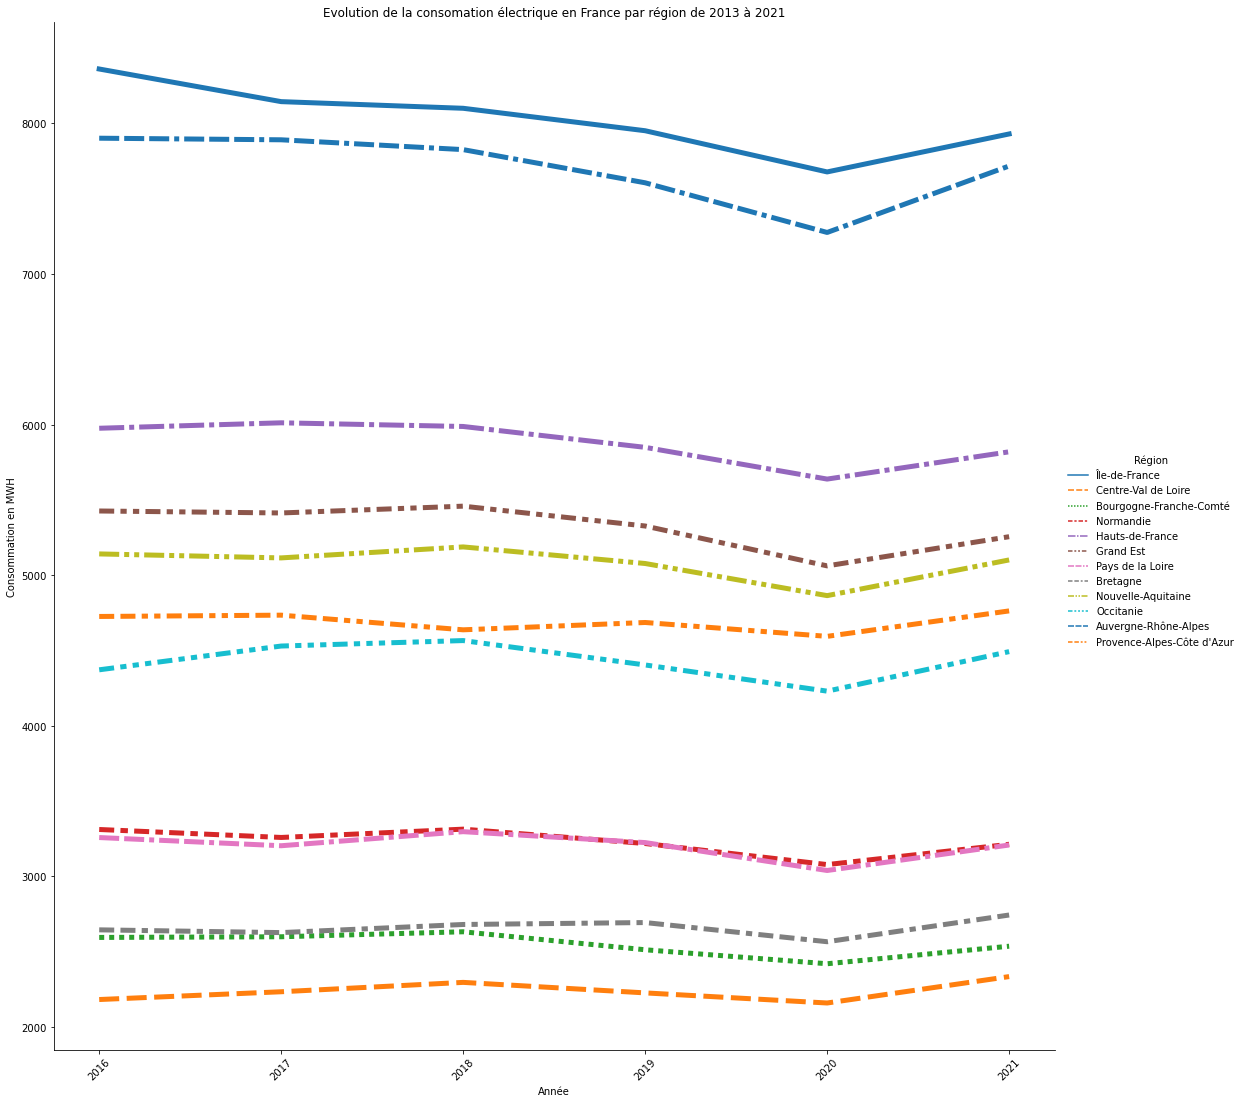

In [97]:
### Courbes de l'évolution de la consomation électrique en France de 2013 à 2021
sns.relplot(x= 'Année', y= 'Consommation',style= 'Région', hue= 'Région',palette="tab10",kind ='line',lw=5 , height =15, data = conso_annee_var)
plt.xticks(rotation=45)
plt.xlabel('Année')
plt.ylabel('Consommation en MWH')
plt.title('Evolution de la consomation électrique en France par région de 2013 à 2021')
plt.savefig('Courbe Evolution de la consomation électrique en France de 2013 à 2021.png');

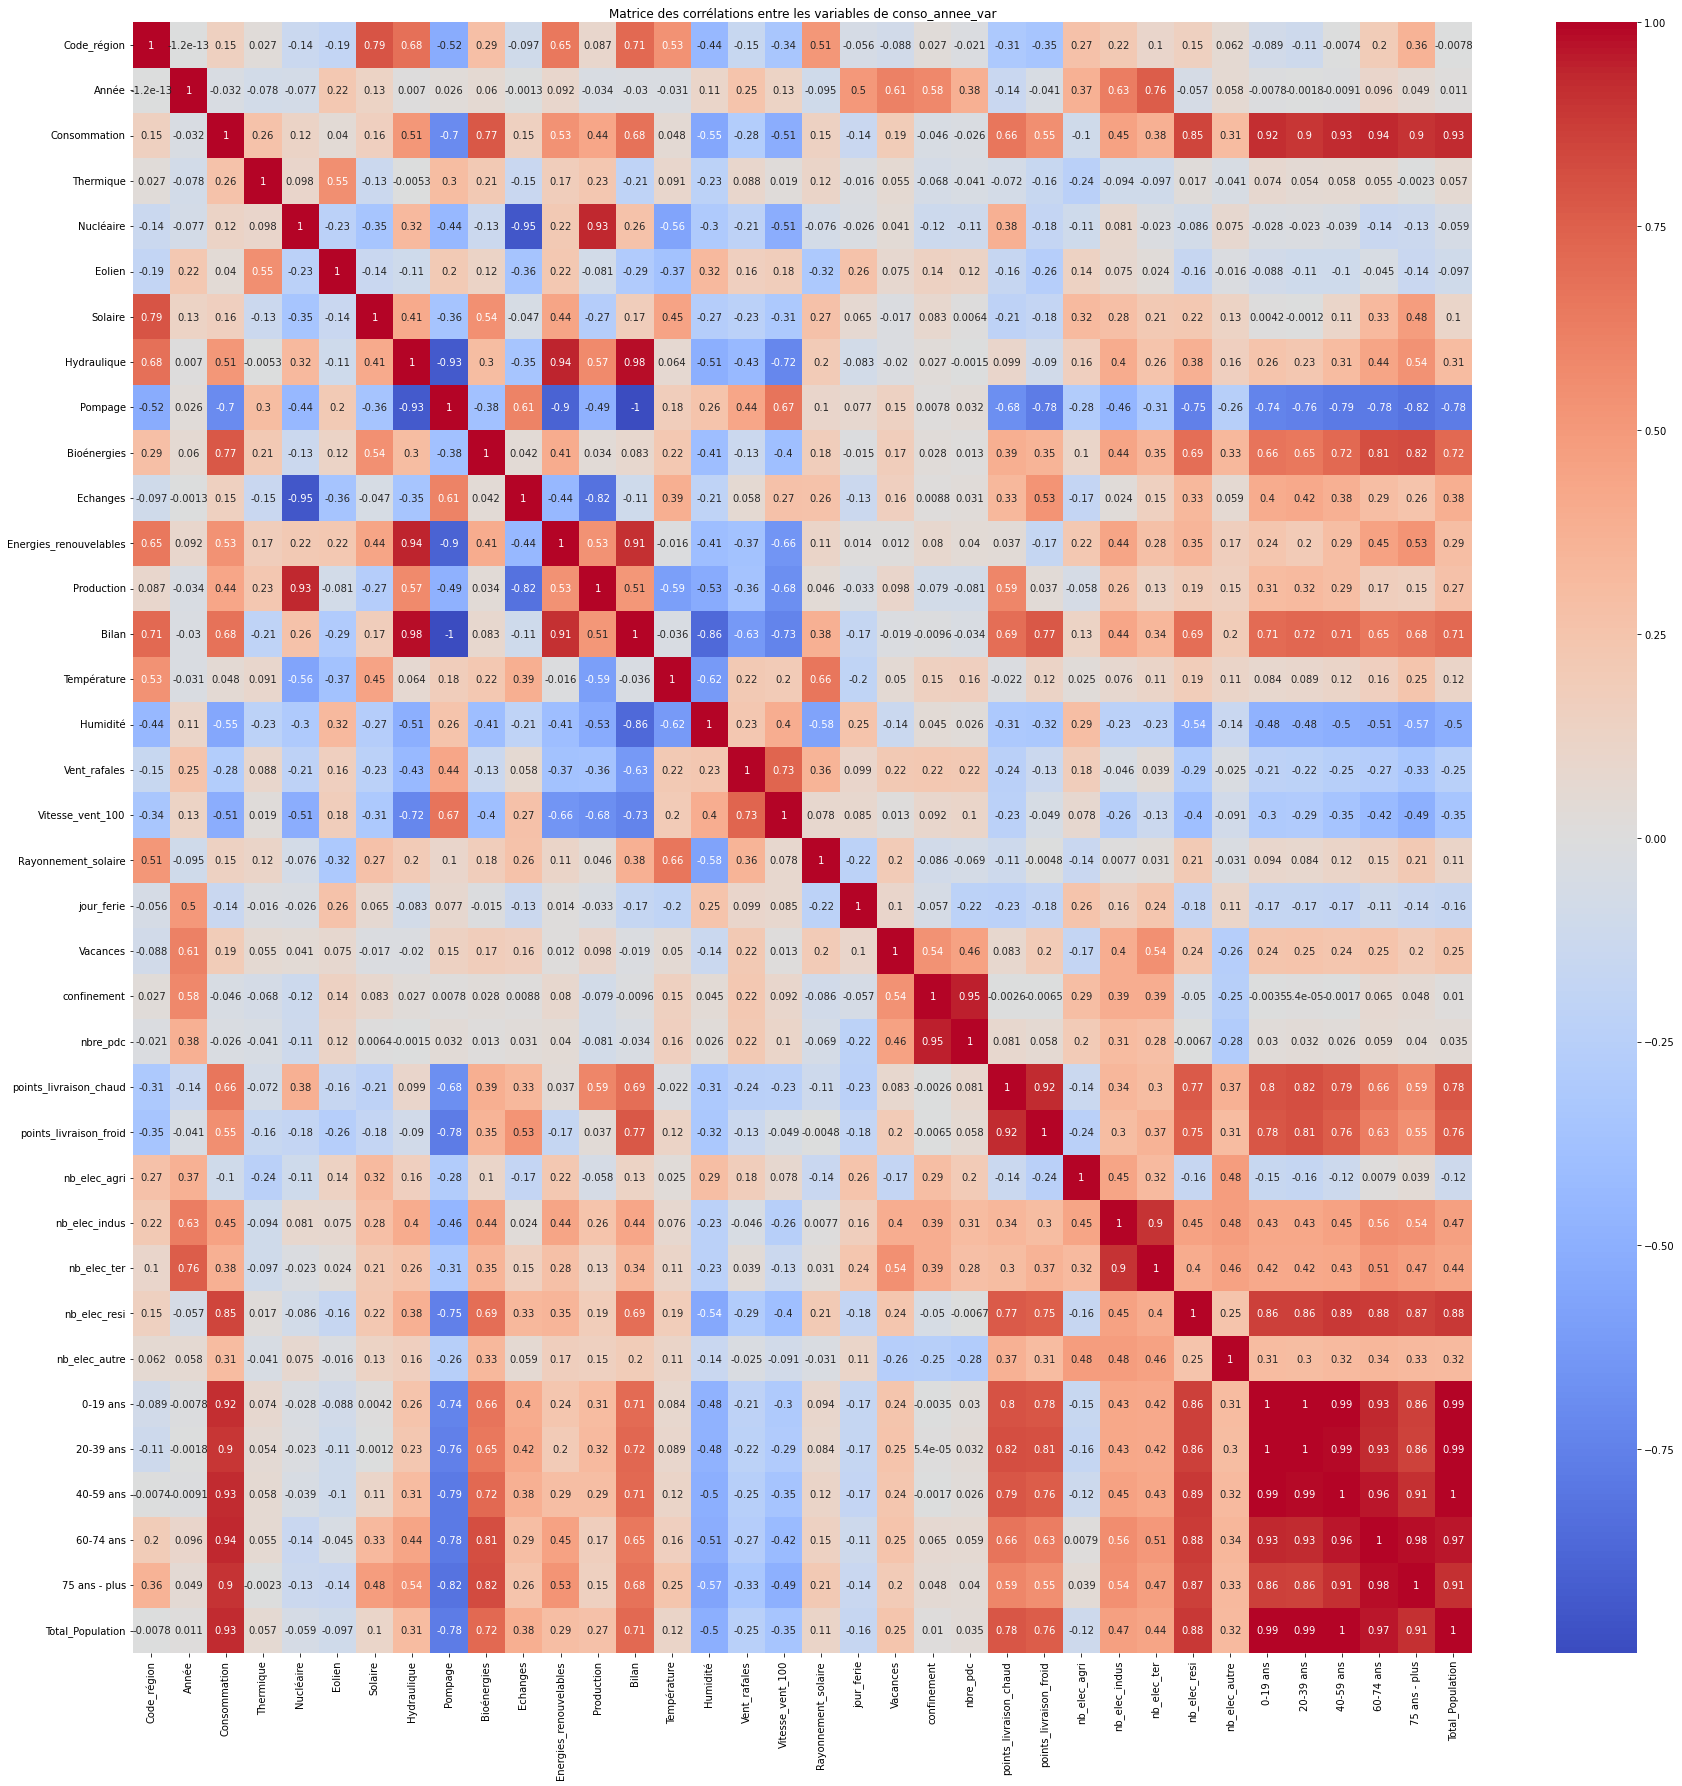

In [98]:
# Analyse des corrélations sur les variables conso_annee_var
cor = conso_annee_var.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm')
plt.title('Matrice des corrélations entre les variables de conso_annee_var')
plt.savefig('conso_annee_var_matrice_correlations.png');  


In [99]:
# Focus sur les densités de population

Il y a une forte corrélation entre les variables de densité de population par tranches d'âges et la consommation (~ 0,9),ce qui pouvait être prévisible. On observe aussi cette forte corrélation avec la production totale (moins prévisible) et le bilan énergétique.
On voit aussi que les variables liées aux secteurs et résidentiels sont moyennement corrélées aux densités de population par tranches d'âges (~ 0.3).

In [100]:
conso_annee_var.head(1)

Région  Code_région  Année  Consommation   Thermique  Nucléaire  \
0  Île-de-France           11   2016   8361.606588  271.926351        NaN   

     Eolien   Solaire  Hydraulique  Pompage  Bioénergies     Echanges  \
0  6.966691  7.881199     6.626573      NaN   141.561436  7926.621392   

   Energies_renouvelables  Production  Bilan  Température   Humidité  \
0              163.035899         NaN    NaN    11.704515  77.750925   

   Vent_rafales  Vitesse_vent_100  Rayonnement_solaire  jour_ferie  Vacances  \
0      5.183901          5.774119           130.957931    0.027757  0.350851   

   confinement  nbre_pdc  points_livraison_chaud  points_livraison_froid  \
0          0.0     120.0                 13470.0                   937.0   

   nb_elec_agri  nb_elec_indus  nb_elec_ter  nb_elec_resi  nb_elec_autre  \
0         822.0        11962.0      84912.0     6409602.0          483.0   

    0-19 ans  20-39 ans  40-59 ans  60-74 ans  75 ans - plus  Total_Population  
0  3132488.0  3425345.0  3200438.0  1547105.0       811756.0        12117132.0

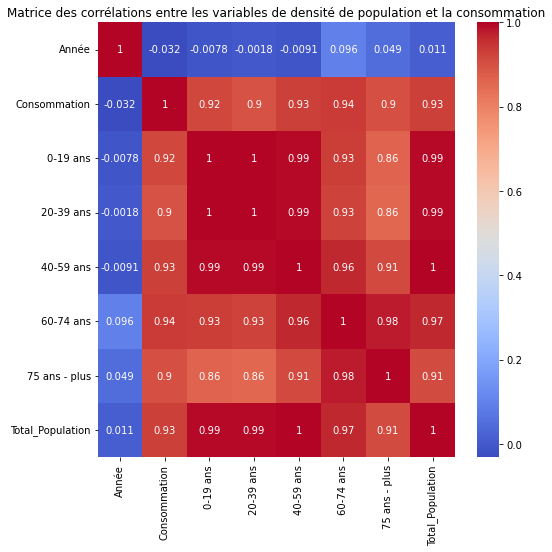

In [101]:
# Zoom sur la matrice aux niveau des densités de population
dfcor =pd.DataFrame(conso_annee_var, columns = ['Année','Consommation','0-19 ans',
                                                '20-39 ans', '40-59 ans', '60-74 ans','75 ans - plus', 'Total_Population'])
cor_pop = dfcor.corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cor_pop, annot=True, ax=ax, cmap='coolwarm')
plt.title('Matrice des corrélations entre les variables de densité de population et la consommation')
plt.savefig('df_pop_matrice_correlations.png');  

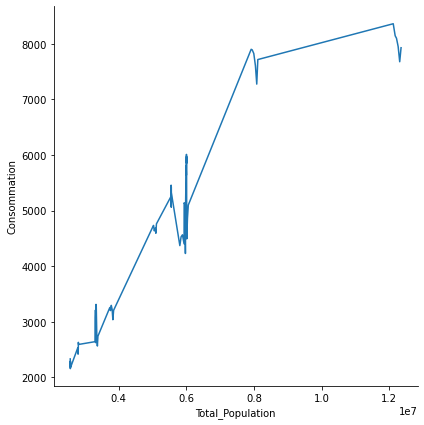

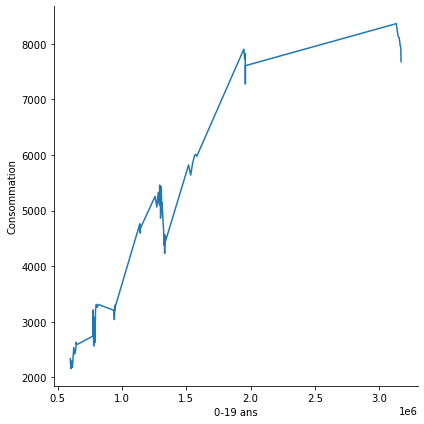

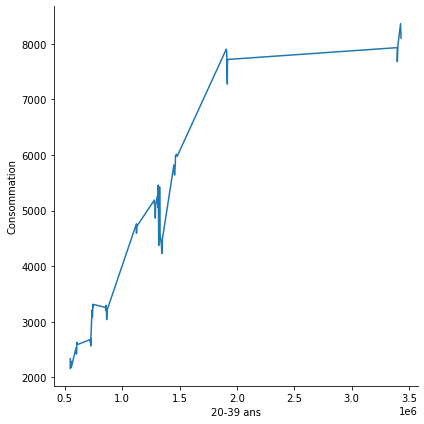

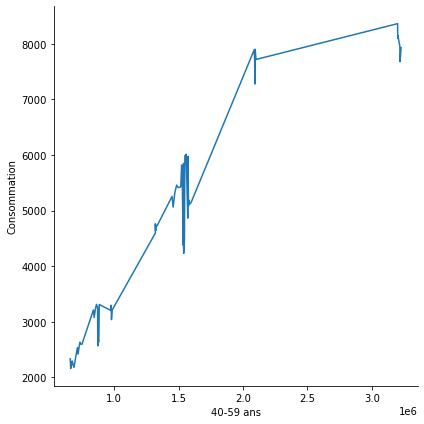

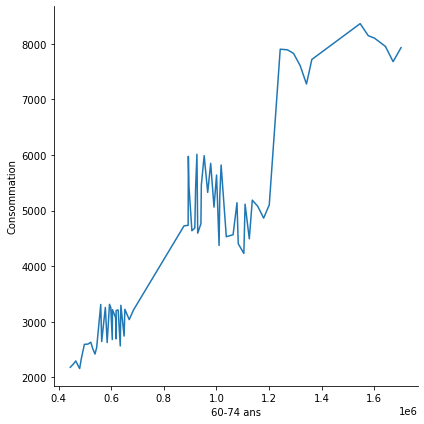

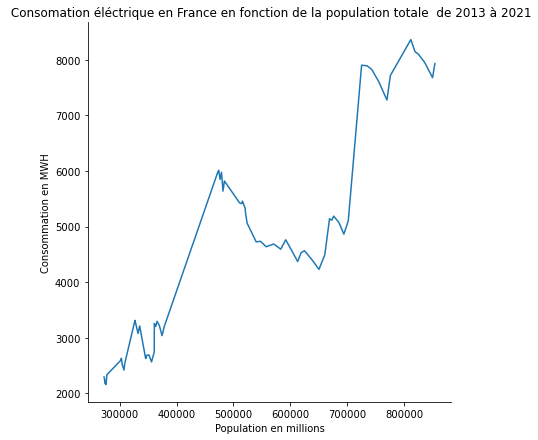

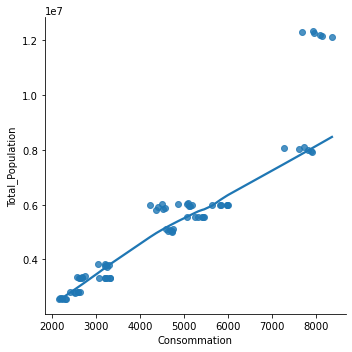

In [102]:
#Courbe d'evolution de la consomation en fonction de la population totale

f = sns.FacetGrid

sns.relplot(x='Total_Population', y='Consommation', kind='line',height = 6, data=conso_annee_var)
sns.relplot(x='0-19 ans', y='Consommation', kind='line',height = 6, data=conso_annee_var)
sns.relplot(x='20-39 ans', y='Consommation', kind='line',height = 6, data=conso_annee_var)
sns.relplot(x='40-59 ans', y='Consommation', kind='line',height = 6, data=conso_annee_var)
sns.relplot(x='60-74 ans', y='Consommation', kind='line',height = 6, data=conso_annee_var)
sns.relplot(x='75 ans - plus', y='Consommation', kind='line',height = 6, data=conso_annee_var)

plt.xlabel('Population en millions')
plt.ylabel('Consommation en MWH')
plt.title(' Consomation éléctrique en France en fonction de la population totale  de 2013 à 2021')
plt.savefig('Courbes Evolution de la consomation électrique en fonction de la tranche dage en France de 2013 à 2021.png');

sns.lmplot(x='Consommation', y='Total_Population', lowess= True , data=conso_annee_var);

In [103]:
# Comparaison entre les filières de production

In [104]:
## Comparaison Production thermique/Nucléaire/Energies renouvelables 
dfener = pd.DataFrame(conso_annee_var, columns = ['Année','Thermique','Energies_renouvelables','Nucléaire'])
display(dfener.head(10))
display(dfener.shape)

dfener = dfener.dropna(axis=0, how='any')

display(dfener.info())

Année   Thermique  Energies_renouvelables    Nucléaire
0   2016  271.926351              163.035899          NaN
1   2017  279.571939              173.332024          NaN
2   2018  203.696730              173.436579          NaN
3   2019  194.355201              176.412831          NaN
4   2020  226.585526              179.531140          NaN
5   2021  245.388846              191.757020          NaN
6   2016   34.201094              305.561273  8745.525976
7   2017   48.802137              336.837955  8664.615829
8   2018   59.281547              379.988586  8673.405200
9   2019   54.964474              449.473026  8103.533553

(72, 4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 6 to 65
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Année                   42 non-null     int64  
 1   Thermique               42 non-null     float64
 2   Energies_renouvelables  42 non-null     float64
 3   Nucléaire               42 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.6 KB


None

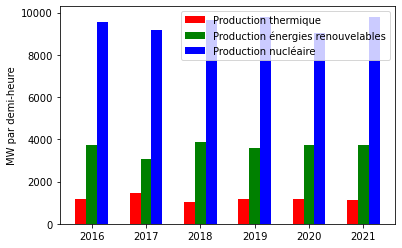

In [105]:
x=dfener['Année']
y1= dfener['Thermique']
y2=dfener['Energies_renouvelables']
y3=dfener['Nucléaire']

ax = plt.subplot(111)
ax.bar(x-0.2, y1, width=0.2, color='r', align='center', label='Production thermique')
ax.bar(x, y2, width=0.2, color='g', align='center', label='Production énergies renouvelables')
ax.bar(x+0.2, y3, width=0.2, color='b', align='center', label='Production nucléaire')
plt.ylabel('MW par demi-heure');
plt.legend()
plt.show()

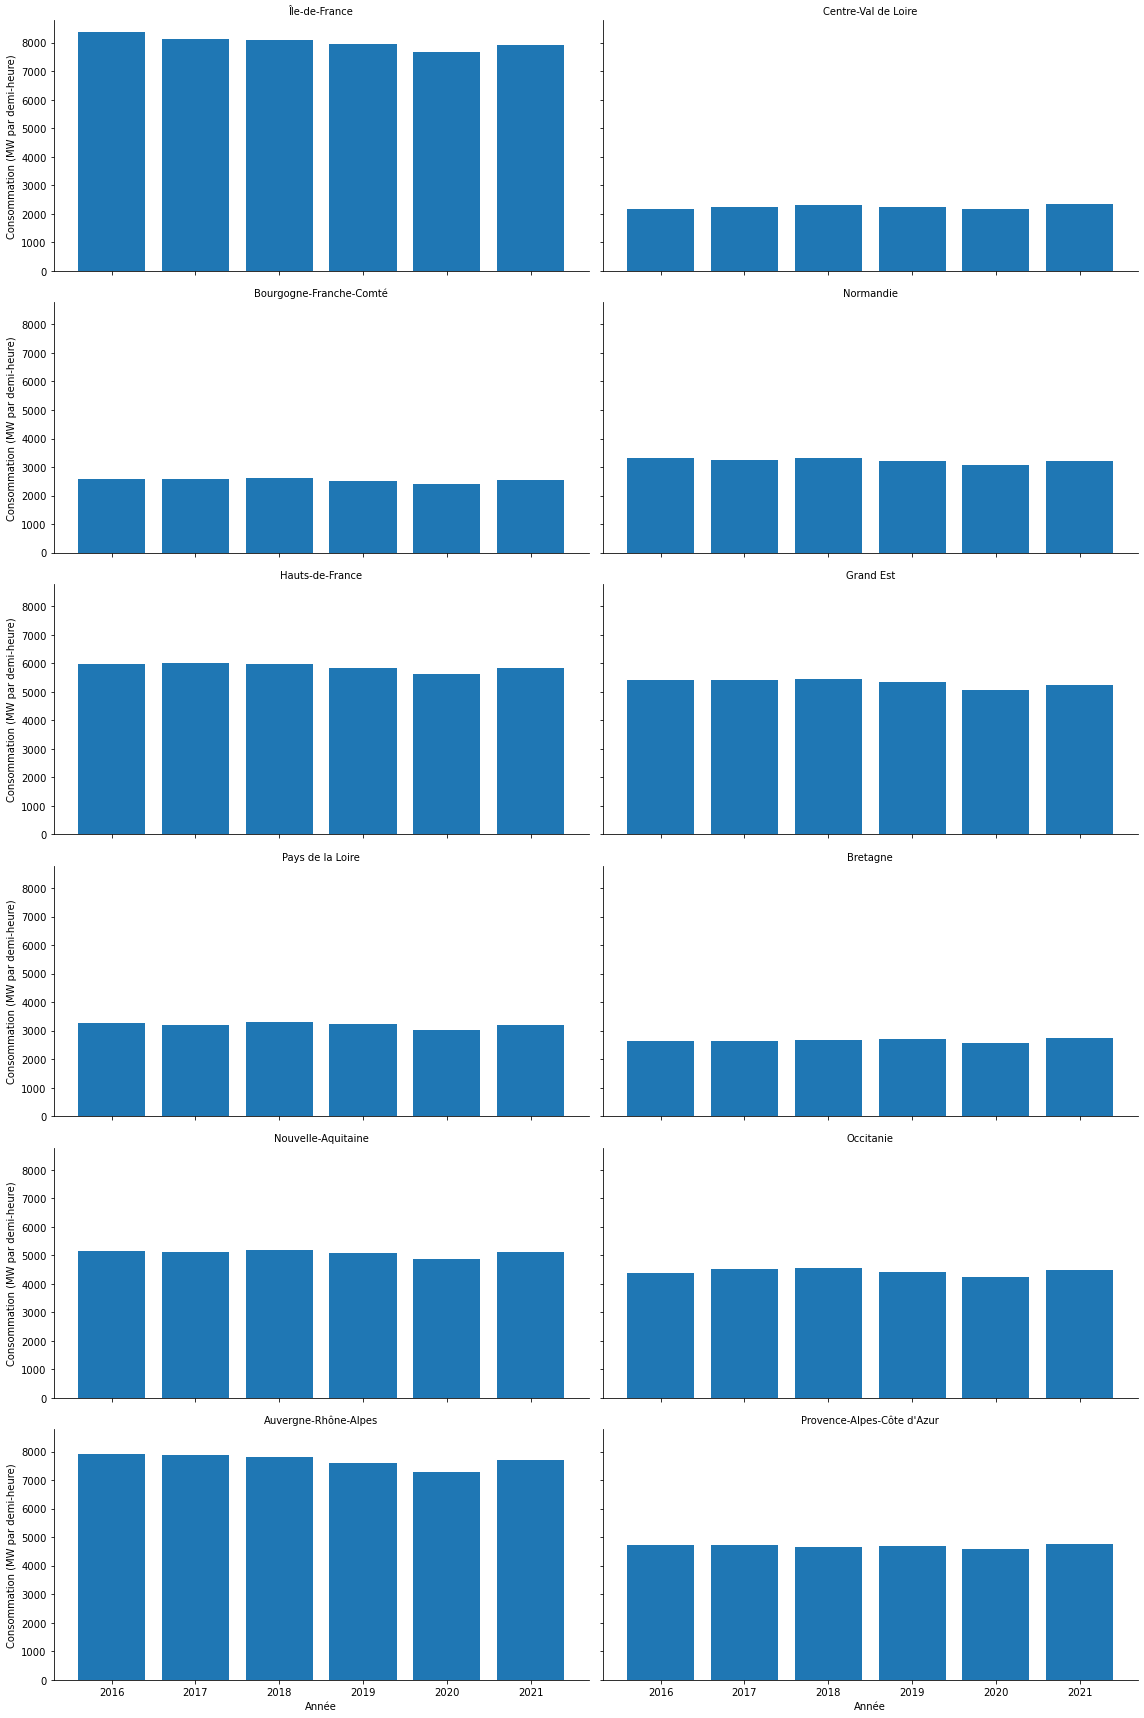

In [106]:
#Evolution de la consommation par année
f = sns.FacetGrid(conso_annee_var, col='Région', col_wrap= 2, height=4, aspect=2  )
f.map(plt.bar, 'Année', 'Consommation')
f.set_titles("{col_name}")  # use this argument literally
f.set_axis_labels(x_var="Année", y_var="Consommation (MW par demi-heure)") ;

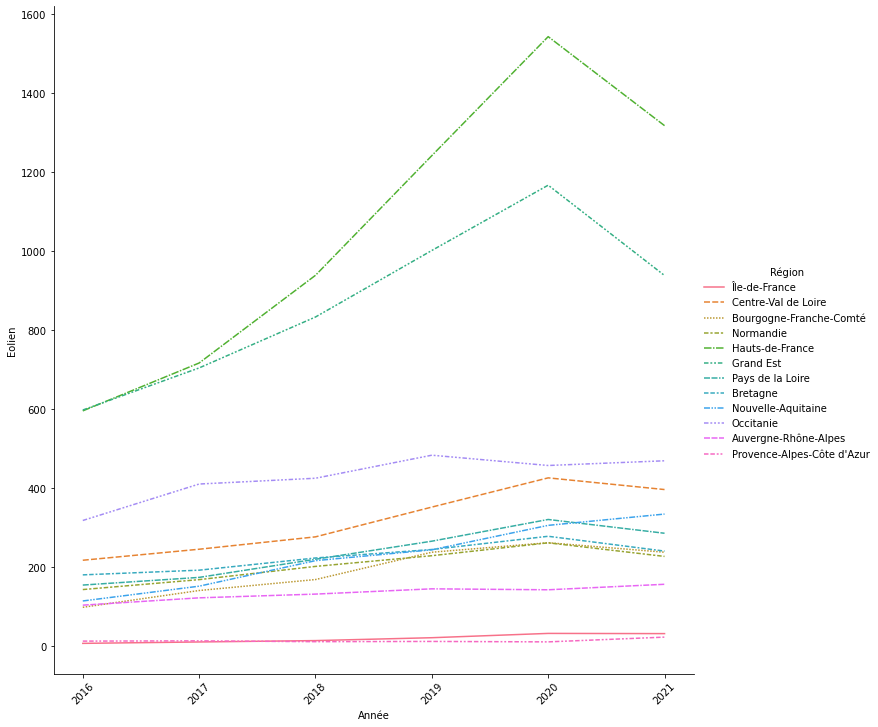

In [107]:
#Courbe de l'évolution de la production Eolien en France de 2013 à 2021 par Région

sns.relplot(x= 'Année', y= 'Eolien',style= 'Région', hue= 'Région', aspect = 1,height = 10, kind ='line',data = conso_annee_var)
plt.xticks(rotation=45);

palette="Dark2"
sns.set_palette(palette)
plt.show()

In [108]:
from scipy.stats import pearsonr

pd.DataFrame(pearsonr(conso_annee_var['Total_Population'], conso_annee_var['Consommation']), 
             index=['pearson_coeff','p-value'], columns=['resultat_test'])

#la p-value > 5%, 
#le coeff est loin de 0 
#il n'y a pas de forte corrélations entre les variables 
#les variables sont indépendantes l'une de l'autre

resultat_test
pearson_coeff   9.293645e-01
p-value         5.176279e-32

In [109]:
# Focus sur les régions

In [110]:
conso_annee_var.head()


Région  Code_région  Année  Consommation   Thermique  Nucléaire  \
0  Île-de-France           11   2016   8361.606588  271.926351        NaN   
1  Île-de-France           11   2017   8144.879329  279.571939        NaN   
2  Île-de-France           11   2018   8100.700683  203.696730        NaN   
3  Île-de-France           11   2019   7951.621964  194.355201        NaN   
4  Île-de-France           11   2020   7678.033333  226.585526        NaN   

      Eolien    Solaire  Hydraulique  Pompage  Bioénergies     Echanges  \
0   6.966691   7.881199     6.626573      NaN   141.561436  7926.621392   
1  10.484827   8.208140     6.710461      NaN   147.928597  7691.955730   
2  13.975925   9.554078     4.666188      NaN   145.240388  7723.546892   
3  21.264951  11.502718     7.058717      NaN   136.586444  7580.846684   
4  32.165351  12.672368     4.618421      NaN   130.075000  7272.574561   

   Energies_renouvelables  Production  Bilan  Température   Humidité  \
0              163.035899         NaN    NaN    11.704515  77.750925   
1              173.332024         NaN    NaN    12.241842  73.717601   
2              173.436579         NaN    NaN    12.889436  73.765720   
3              176.412831         NaN    NaN    12.769590  72.581370   
4              179.531140         NaN    NaN    12.985175  75.801316   

   Vent_rafales  Vitesse_vent_100  Rayonnement_solaire  jour_ferie  Vacances  \
0      5.183901          5.774119           130.957931    0.027757  0.350851   
1      5.091039          5.808815           131.230846    0.030346  0.325241   
2      5.944197          5.990266           140.635095    0.030183  0.338484   
3      6.233454          6.213367           141.997423    0.029358  0.352664   
4      6.645482          6.537461           120.865952    0.025877  0.376316   

   confinement    nbre_pdc  points_livraison_chaud  points_livraison_froid  \
0     0.000000  120.000000                 13470.0                   937.0   
1     0.000000   37.472688                 13903.0                  1023.0   
2     0.000000   52.220985                 14191.0                  1121.0   
3     0.000000   41.066328                 14312.0                  1084.0   
4     0.229825  506.339474                 15192.0                  1101.0   

   nb_elec_agri  nb_elec_indus  nb_elec_ter  nb_elec_resi  nb_elec_autre  \
0         822.0        11962.0      84912.0     6409602.0          483.0   
1         785.0        12306.0      85776.0     6468000.0          128.0   
2        2269.0        37021.0     618011.0     5739224.0       170480.0   
3        2335.0        43460.0     643820.0     5810121.0       145510.0   
4        2275.0        48167.0     757248.0     5827581.0        30612.0   

    0-19 ans  20-39 ans  40-59 ans  60-74 ans  75 ans - plus  Total_Population  
0  3132488.0  3425345.0  3200438.0  1547105.0       811756.0        12117132.0  
1  3146029.0  3428805.0  3202825.0  1578021.0       819200.0        12174880.0  
2  3155638.0  3429591.0  3201501.0  1601718.0       824999.0        12213447.0  
3  3164236.0  3401028.0  3217757.0  1643374.0       836149.0        12262544.0  
4  3169861.0  3396917.0  3219363.0  1672519.0       849933.0        12308593.0

In [111]:
import json
france = json.load(open("regions",'r'))
france

state_id_map = {}
for feature in france["features"]:
    feature["id"] = feature["properties"]["code"]
    state_id_map[feature["properties"]["nom"]] = feature["id"]
state_id_map


import plotly.express as px 
import plotly.io as pio
pio.renderers.default = 'browser'

fig = px.choropleth(
    conso_annee_var,
    locations="Région",
    geojson=france,
    color="Consommation",
    hover_name="Région",
    hover_data=["Consommation"],
    title="Consommation par région en FRANCE sur les 5 dernières années",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()



In [112]:
import geopandas as gpd

#Importation contour des régions
geo = gpd.read_file('contours-des-regions-francaises-sur-openstreetmap.shp')
geo.rename({"nom":"Région"}, axis=1, inplace=True)
geo.Région.unique()
geo.isna().sum()
geo.dropna(axis=0, how='all', subset=['Région'],inplace=True)

geo.replace({'Midi-Pyrnes':'Occitanie','Basse-Normandie':'Normandie', 'Haute-Normandie':'Normandie', 'Champagne-Ardenne':'Grand Est',
        'Nord-Pas-de-Calais':'Hauts-de-France','Picardie':'Hauts-de-France', "Provence-Alpes-CÃ´te d'Azur":"Provence-Alpes-Côte d'Azur", 
        'Alsace':'Grand Est','Limousin':'Nouvelle-Aquitaine', 'Lorraine':'Grand Est', 'Midi-PyrÃ©nÃ©es':'Occitanie',
       'Poitou-Charentes':'Nouvelle-Aquitaine','Franche-Comt':'Bourgogne-Franche-Comté','Aquitaine':'Nouvelle-Aquitaine',
       'Languedoc-Roussillon':'Occitanie','Grand-Est':'Grand Est', 'Auvergne' : 'Auvergne-Rhône-Alpes','Auvergne-RhÃ´ne-Alpes' :'Auvergne-Rhône-Alpes',
            'RhÃ´ne-Alpes':'Auvergne-Rhône-Alpes','Rhne-Alpes' : 'Auvergne-Rhône-Alpes', 'Bourgogne':'Bourgogne-Franche-Comté',
            'Bourgogne-Franche-ComtÃ©':'Bourgogne-Franche-Comté', 'Bourgogne-Franche-ComtÃ©':'Bourgogne-Franche-Comté',
            'Franche-ComtÃ©':'Bourgogne-Franche-Comté', 'Bretagne' : 'Bretagne', 'Centre'   :'Centre-Val de Loire', 
            'Grand Est':'Grand Est', 'Hauts-de-France' : 'Hauts-de-France',  'Normandie' : 'Normandie',
            'Nouvelle-Aquitaine' : 'Nouvelle-Aquitaine', 'Occitanie' : 'Occitanie','Pays-de-la-Loire':'Pays de la Loire',
            "Provence-Alpes-Cte d'Azur":"Provence-Alpes-Côte d'Azur",'le-de-France' :'Île-de-France'},inplace=True)

ModuleNotFoundError: No module named 'geopandas'

In [120]:
conso_heure_final = pd.read_csv('conso_heure_final.csv')
conso_heure_final.head()

Code_région         Région               Nature        Date  Année  Mois  \
0           11  Île-de-France  Données définitives  2016-01-01   2016     1   
1           11  Île-de-France  Données définitives  2016-01-01   2016     1   
2           11  Île-de-France  Données définitives  2016-01-01   2016     1   
3           11  Île-de-France  Données définitives  2016-01-01   2016     1   
4           11  Île-de-France  Données définitives  2016-01-01   2016     1   

   Semaine  Heure               Date - Heure Saison  Consommation  Thermique  \
0       53  04:00  2016-01-01T04:00:00+01:00  Hiver        7174.0      312.0   
1       53  07:00  2016-01-01T07:00:00+01:00  Hiver        7348.0      312.0   
2       53  10:00  2016-01-01T10:00:00+01:00  Hiver        7746.0      311.0   
3       53  13:00  2016-01-01T13:00:00+01:00  Hiver        8856.0      305.0   
4       53  16:00  2016-01-01T16:00:00+01:00  Hiver        8474.0      305.0   

   Nucléaire  Eolien  Solaire  Hydraulique  Pompage  Bioénergies  Echanges  \
0        NaN     3.0      0.0         10.0      NaN        150.0    6700.0   
1        NaN     1.0      0.0         10.0      NaN        151.0    6874.0   
2        NaN     2.0      2.0         10.0      NaN        150.0    7271.0   
3        NaN     2.0      7.0         10.0      NaN        145.0    8387.0   
4        NaN    10.0      2.0         10.0      NaN        152.0    7993.0   

   Energies_renouvelables  Production  Bilan  Température  Humidité  \
0                   163.0         NaN    NaN          4.9      95.0   
1                   162.0         NaN    NaN          3.9      97.0   
2                   164.0         NaN    NaN          4.9      99.0   
3                   164.0         NaN    NaN          6.4      99.0   
4                   174.0         NaN    NaN          7.4      93.0   

   Vent_rafales  Vitesse_vent_100  Rayonnement_solaire  jour_ferie  Vacances  \
0           2.3              9.43                 0.00           1         1   
1           0.9              8.90                 0.00           1         1   
2           3.5              8.25                12.12           1         1   
3           4.8              8.29               179.61           1         1   
4           4.8              8.26               114.67           1         1   

   confinement  nbre_pdc  points_livraison_chaud  points_livraison_froid  \
0            0     120.0                 13470.0                   937.0   
1            0     120.0                 13470.0                   937.0   
2            0     120.0                 13470.0                   937.0   
3            0     120.0                 13470.0                   937.0   
4            0     120.0                 13470.0                   937.0   

   nb_elec_agri  nb_elec_indus  nb_elec_ter  nb_elec_resi  nb_elec_autre  \
0         822.0        11962.0      84912.0     6409602.0          483.0   
1         822.0        11962.0      84912.0     6409602.0          483.0   
2         822.0        11962.0      84912.0     6409602.0          483.0   
3         822.0        11962.0      84912.0     6409602.0          483.0   
4         822.0        11962.0      84912.0     6409602.0          483.0   

   0-19 ans  20-39 ans  40-59 ans  60-74 ans  75 ans - plus  Total_Population  
0   3132488    3425345    3200438    1547105         811756          12117132  
1   3132488    3425345    3200438    1547105         811756          12117132  
2   3132488    3425345    3200438    1547105         811756          12117132  
3   3132488    3425345    3200438    1547105         811756          12117132  
4   3132488    3425345    3200438    1547105         811756          12117132

In [113]:
## Création de DataFrames affichant les consommations et productions totales

total_regions = pd.DataFrame(df_clean.groupby(['Région'])['Consommation','Production'].sum().reset_index())
total_regions

total = pd.DataFrame(df_clean.groupby(['Année'])['Consommation','Production'].sum().reset_index())
total

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_9504/1994509360.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_9504/1994509360.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Année  Consommation    Production
0   2013   984134263.0  1.020766e+09
1   2014   924697156.0  1.017312e+09
2   2015   946305720.0  1.024995e+09
3   2016   960630996.0  9.861503e+08
4   2017   958089446.0  9.751885e+08
5   2018   951041999.0  1.019106e+09
6   2019   940954352.0  9.963757e+08
7   2020   893165536.0  9.181034e+08
8   2021   934392855.0  9.615380e+08

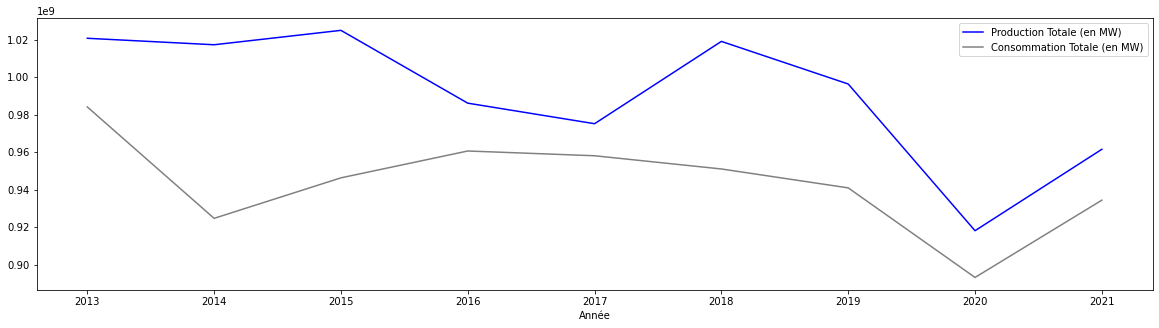

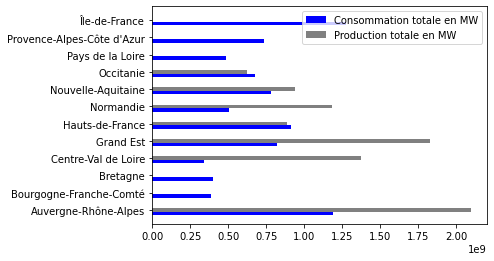

In [117]:
# Conso/ Production
plt.figure(figsize=(20,5))

ax1 = sns.lineplot(x='Année', y='Production',data=total, ci=None,label='Production Totale (en MW)',color='b')
ax2 = sns.lineplot(x='Année', y='Consommation', data=total,ci=None, label='Consommation Totale (en MW)', color='grey')
ax1.set(ylabel=None)
ax2.set(ylabel=None);

# Conso vs Producton par région

ind = np.arange(len(total_regions))
width = 0.2

fig, ax = plt.subplots()
ax.barh(ind, total_regions['Consommation'], width, color='b', label='Consommation totale en MW')
ax.barh(ind + width, total_regions['Production'], width, color='grey', label='Production totale en MW')

ax.set(yticks=ind + width, yticklabels=total_regions['Région'], ylim=[2*width - 1, len(total_regions)])
ax.legend()

plt.show()


<AxesSubplot:title={'center':'Production Total de chaque Filière par Année '}, xlabel='Année'>

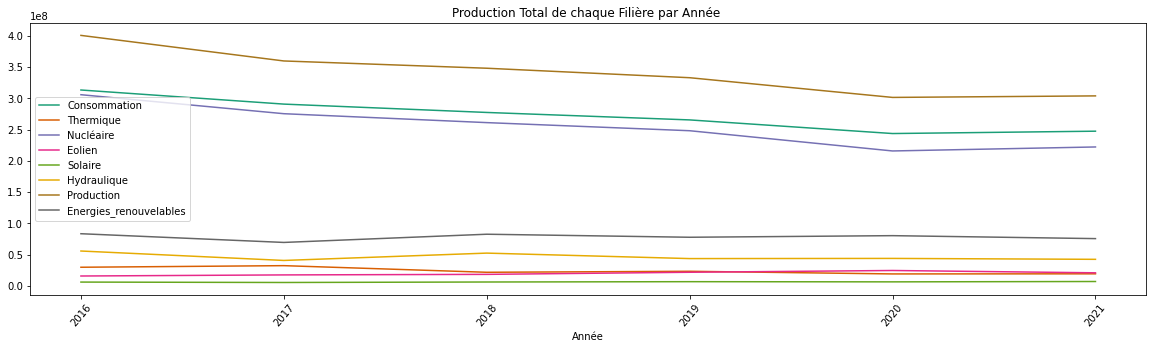

In [121]:
filiere = conso_heure_final.groupby(['Année']).agg({'Consommation':'sum', 'Thermique':'sum','Nucléaire':'sum','Eolien':'sum',
                                    'Solaire':'sum','Hydraulique':'sum', 'Production':'sum', 'Energies_renouvelables':'sum'})
filiere.plot(rot=50, figsize=(20,5),title=( "Production Total de chaque Filière par Année "))

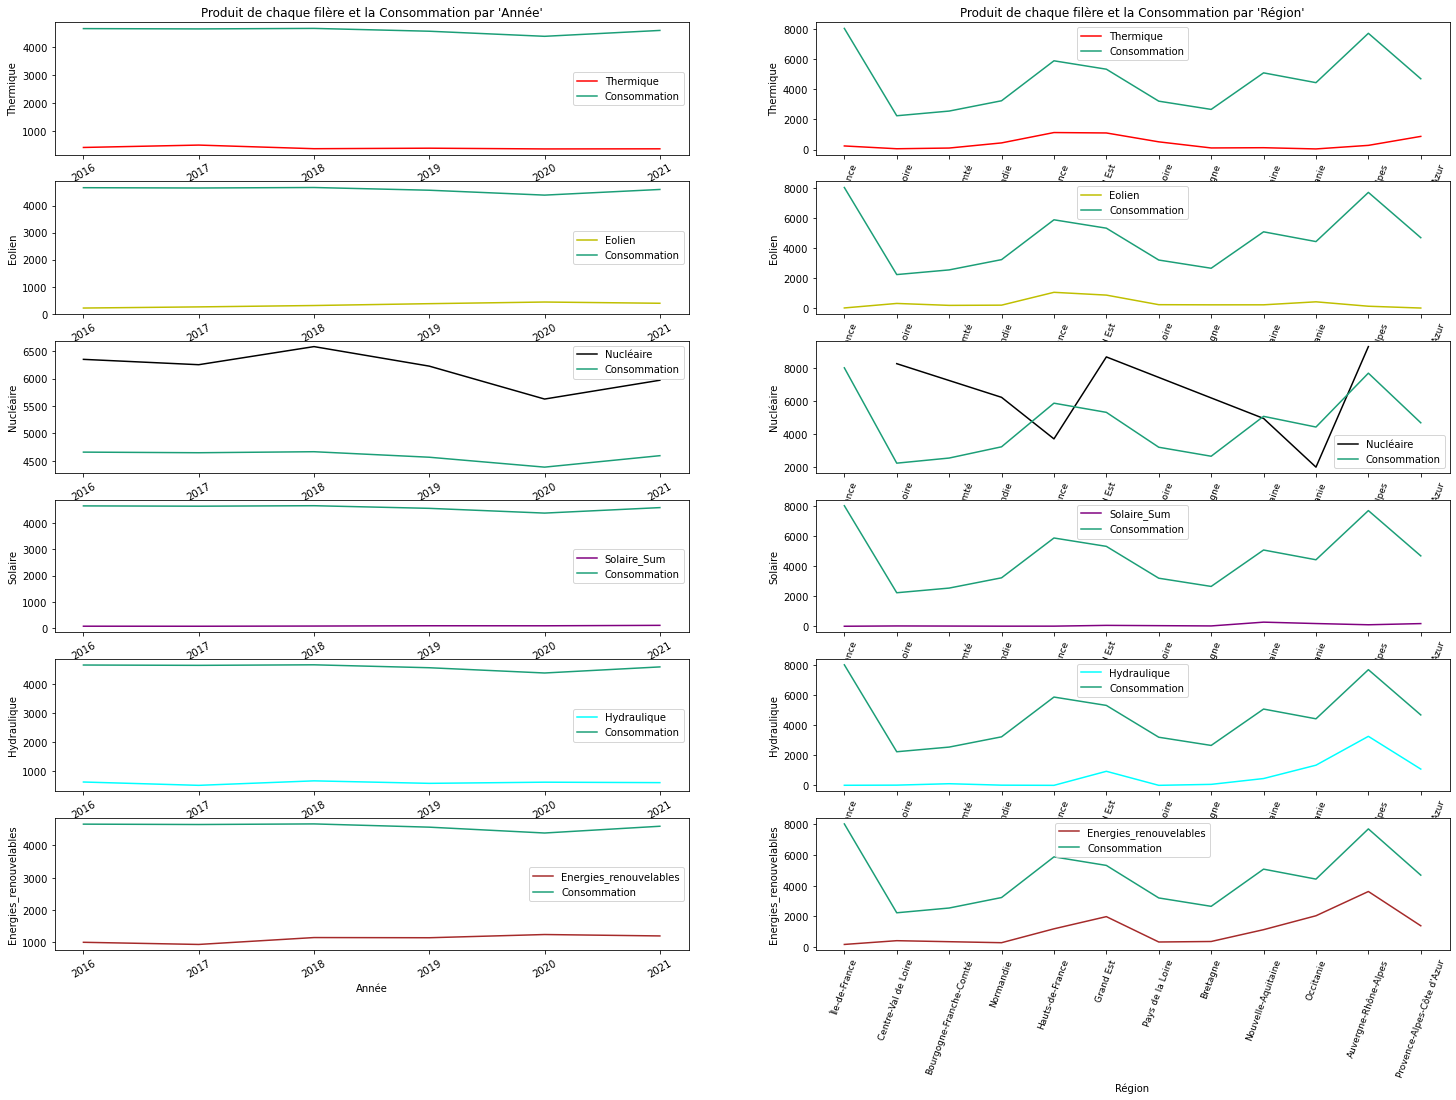

In [125]:
##   Consommation par rapport à chaque filière de Produition Année et Région
plt.figure(figsize=(25, 20))


plt.subplot(721)
plt.title("Produit de chaque filère et la Consommation par 'Année'")
sns.lineplot(x='Année', y='Thermique', ci=None, data=conso_annee_var, label='Thermique', color='r')
sns.lineplot(x='Année', y='Consommation', ci=None,data=conso_annee_var, label='Consommation');
plt.xticks( rotation=30)
plt.subplot(722)
plt.title("Produit de chaque filère et la Consommation par 'Région'")
sns.lineplot(x='Région', y='Thermique', ci=None,data=conso_annee_var, label='Thermique', color='r')
sns.lineplot(x='Région', y='Consommation',ci=None, data=conso_annee_var, label='Consommation');
plt.xticks(size=9,rotation=70)

plt.subplot(723)
sns.lineplot(x='Année', y='Eolien',ci=None, data=conso_annee_var, label='Eolien',color='y')
sns.lineplot(x='Année', y='Consommation',ci=None, data=conso_annee_var, label='Consommation')
plt.xticks(rotation=30)
plt.subplot(724)
sns.lineplot(x='Région', y='Eolien',ci=None, data=conso_annee_var, label='Eolien',color='y')
sns.lineplot(x='Région', y='Consommation',ci=None, data=conso_annee_var, label='Consommation')
plt.xticks(size=9,rotation=70)

plt.subplot(725)
sns.lineplot(x='Année', y='Nucléaire',ci=None, data=conso_annee_var, label='Nucléaire',color='black')
sns.lineplot(x='Année', y='Consommation', ci=None,data=conso_annee_var, label='Consommation')
plt.xticks(rotation=30)
plt.subplot(726)
sns.lineplot(x='Région', y='Nucléaire',ci=None, data=conso_annee_var, label='Nucléaire',color='black')
sns.lineplot(x='Région', y='Consommation',ci=None, data=conso_annee_var, label='Consommation')
plt.xticks(size=9,rotation=70)

plt.subplot(727)
sns.lineplot(x='Année', y='Solaire',ci=None, data=conso_annee_var, label='Solaire_Sum',color='purple')
sns.lineplot(x='Année', y='Consommation', ci=None,data=conso_annee_var, label='Consommation')
plt.xticks(rotation=30)
plt.subplot(728)
sns.lineplot(x='Région', y='Solaire',ci=None, data=conso_annee_var, label='Solaire_Sum',color='purple')
sns.lineplot(x='Région', y='Consommation',ci=None, data=conso_annee_var, label='Consommation')
plt.xticks(size=9,rotation=70)

plt.subplot(729)
sns.lineplot(x='Année', y='Hydraulique',ci=None, data=conso_annee_var, label='Hydraulique',color='cyan')
sns.lineplot(x='Année', y='Consommation',ci=None, data=conso_annee_var, label='Consommation');
plt.xticks(rotation=30)
plt.subplot(7,2,10)
sns.lineplot(x='Région', y='Hydraulique', ci=None,data=conso_annee_var, label='Hydraulique',color='cyan')
sns.lineplot(x='Région', y='Consommation',ci=None, data=conso_annee_var, label='Consommation');
plt.xticks(size=9,rotation=70)

plt.subplot(7,2,11)
sns.lineplot(x='Année', y='Energies_renouvelables',ci=None, data=conso_annee_var, label='Energies_renouvelables',color='brown')
sns.lineplot(x='Année', y='Consommation',ci=None, data=conso_annee_var, label='Consommation');
plt.xticks(rotation=30)
plt.subplot(7,2,12)
sns.lineplot(x='Région', y='Energies_renouvelables', ci=None,data=conso_annee_var, label='Energies_renouvelables',color='brown')
sns.lineplot(x='Région', y='Consommation',ci=None, data=conso_annee_var, label='Consommation');
plt.xticks(size=9,rotation=70);

In [142]:
filiere_region = conso_heure_final.groupby(['Année', 'Région']).agg({'Consommation':'sum', 'Thermique':'sum','Nucléaire':'sum','Eolien':'sum',
                                    'Solaire':'sum','Hydraulique':'sum', 'Production':'sum', 'Energies_renouvelables':'sum'})
filiere_region=filiere_region.reset_index()
filiere_region

Année                      Région  Consommation   Thermique   Nucléaire  \
0    2016        Auvergne-Rhône-Alpes    52216575.0   2058247.0  58362376.0   
1    2016     Bourgogne-Franche-Comté     4075981.0    135580.0         0.0   
2    2016                    Bretagne    18067451.0    486580.0         0.0   
3    2016         Centre-Val de Loire     8778668.0    137591.0  35183251.0   
4    2016                   Grand Est    51556477.0  11138050.0  90655415.0   
..    ...                         ...           ...         ...         ...   
67   2021          Nouvelle-Aquitaine    35970748.0    833027.0  30112687.0   
68   2021                   Occitanie    32948707.0    342133.0  13210666.0   
69   2021            Pays de la Loire     4408212.0    699649.0         0.0   
70   2021  Provence-Alpes-Côte d'Azur    16589247.0   2399512.0         0.0   
71   2021               Île-de-France    20333153.0    629177.0         0.0   

       Eolien    Solaire  Hydraulique   Production  Energies_renouvelables  
0    685035.0   584873.0   22512237.0   84941482.0              24520859.0  
1    154376.0    25584.0     183064.0          0.0                394347.0  
2   1231930.0   184700.0     442333.0          0.0               2098984.0  
3    874459.0    91684.0      65909.0   36550115.0               1229273.0  
4   5678163.0   481438.0    9779576.0  118612281.0              16818816.0  
..        ...        ...          ...          ...                     ...  
67  2356912.0  2485878.0    3507771.0   40457510.0               9511796.0  
68  3440725.0  1702349.0    9442730.0   28721581.0              15168782.0  
69   392542.0    97505.0       4216.0          0.0                565947.0  
70    79242.0   742351.0    3614612.0          0.0               4746564.0  
71    81106.0    41828.0      16529.0          0.0                491665.0  

[72 rows x 10 columns]

In [127]:
# fusion entre les donnée geo et les données de consommation par année
fusion = geo.merge(filiere, on='Région')


#Suppression des colonnes 
fusion.drop(['code_insee', 'nuts2', 'wikipedia','surf_km2'],axis=1, inplace=True)


#Affichage des consommation de donnée sur Carte
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(421)
plt.subplot(421)
plt.title('Consommation')
fusion.plot('Consommation', legend=True,ax=ax)
textes = [ax.text(3,45.3,'Auvergne\nRhône-Alpes'), ax.text(4,47,'Bourgogne \nFranche-Comté'), ax.text(-4,48,'Bretagne'),
          ax.text(0.5,47.5,'Centre\nVal de Loire'), ax.text(4.5,49,'Grand Est'),ax.text(1.5,50,'Hauts-de\nFrance'),ax.text(-2,49,'Normandie'),
          ax.text(-1.,45,'Nouvelle\nAquitaine'),ax.text(1,43.5,'Occitanie'),ax.text(-1.75,47,'Pays de\n la Loire'),
          ax.text(5,43.5,"Provence-Alpes\nCôte d'Azur"), ax.text(1.5,48.7,'Île-de-France')]
plt.setp(textes, fontsize=8)


ax = fig.add_subplot(422)
plt.subplot(422)
plt.title('Production Thermique')
fusion.plot('Thermique', legend=True, ax=ax)
textes = [ax.text(3,45.3,'Auvergne\nRhône-Alpes'), ax.text(4,47,'Bourgogne \nFranche-Comté'), ax.text(-4,48,'Bretagne'),
          ax.text(0.5,47.5,'Centre\nVal de Loire'), ax.text(4.5,49,'Grand Est'),ax.text(1.5,50,'Hauts-de\nFrance'),ax.text(-2,49,'Normandie'),
          ax.text(-1.,45,'Nouvelle\nAquitaine'),ax.text(1,43.5,'Occitanie'),ax.text(-1.75,47,'Pays de\n la Loire'),
          ax.text(5,43.5,"Provence-Alpes\nCôte d'Azur"), ax.text(1.5,48.7,'Île-de-France')]
plt.setp(textes, fontsize=8)

ax = fig.add_subplot(423)
plt.subplot(423)
plt.title('Production Nucléaire')
fusion.plot('Nucléaire', legend=True, ax=ax)
textes = [ax.text(3,45.3,'Auvergne\nRhône-Alpes'), ax.text(4,47,'Bourgogne \nFranche-Comté'), ax.text(-4,48,'Bretagne'),
          ax.text(0.5,47.5,'Centre\nVal de Loire'), ax.text(4.5,49,'Grand Est'),ax.text(1.5,50,'Hauts-de\nFrance'),ax.text(-2,49,'Normandie'),
          ax.text(-1.,45,'Nouvelle\nAquitaine'),ax.text(1,43.5,'Occitanie'),ax.text(-1.75,47,'Pays de\n la Loire'),
          ax.text(5,43.5,"Provence-Alpes\nCôte d'Azur"), ax.text(1.5,48.7,'Île-de-France')]
plt.setp(textes, fontsize=8)

ax = fig.add_subplot(424)
plt.subplot(424)
plt.title('Production Eolien')
fusion.plot('Eolien', legend=True,ax=ax)
textes = [ax.text(3,45.3,'Auvergne\nRhône-Alpes'), ax.text(4,47,'Bourgogne \nFranche-Comté'), ax.text(-4,48,'Bretagne'),
          ax.text(0.5,47.5,'Centre\nVal de Loire'), ax.text(4.5,49,'Grand Est'),ax.text(1.5,50,'Hauts-de\nFrance'),ax.text(-2,49,'Normandie'),
          ax.text(-1.,45,'Nouvelle\nAquitaine'),ax.text(1,43.5,'Occitanie'),ax.text(-1.75,47,'Pays de\n la Loire'),
          ax.text(5,43.5,"Provence-Alpes\nCôte d'Azur"), ax.text(1.5,48.7,'Île-de-France')]
plt.setp(textes, fontsize=8)

ax = fig.add_subplot(425)
plt.subplot(425)
plt.title('Production Solaire')
fusion.plot('Solaire', legend=True, ax=ax)
textes = [ax.text(3,45.3,'Auvergne\nRhône-Alpes'), ax.text(4,47,'Bourgogne \nFranche-Comté'), ax.text(-4,48,'Bretagne'),
          ax.text(0.5,47.5,'Centre\nVal de Loire'), ax.text(4.5,49,'Grand Est'),ax.text(1.5,50,'Hauts-de\nFrance'),ax.text(-2,49,'Normandie'),
          ax.text(-1.,45,'Nouvelle\nAquitaine'),ax.text(1,43.5,'Occitanie'),ax.text(-1.75,47,'Pays de\n la Loire'),
          ax.text(5,43.5,"Provence-Alpes\nCôte d'Azur"), ax.text(1.5,48.7,'Île-de-France')]
plt.setp(textes, fontsize=8)

ax = fig.add_subplot(426)
plt.subplot(426)
plt.title('Production Hydraulique')
fusion.plot('Hydraulique', legend=True, ax=ax)
textes = [ax.text(3,45.3,'Auvergne\nRhône-Alpes'), ax.text(4,47,'Bourgogne \nFranche-Comté'), ax.text(-4,48,'Bretagne'),
          ax.text(0.5,47.5,'Centre\nVal de Loire'), ax.text(4.5,49,'Grand Est'),ax.text(1.5,50,'Hauts-de\nFrance'),ax.text(-2,49,'Normandie'),
          ax.text(-1.,45,'Nouvelle\nAquitaine'),ax.text(1,43.5,'Occitanie'),ax.text(-1.75,47,'Pays de\n la Loire'),
          ax.text(5,43.5,"Provence-Alpes\nCôte d'Azur"), ax.text(1.5,48.7,'Île-de-France')]
plt.setp(textes, fontsize=8)


NameError: name 'geo' is not defined

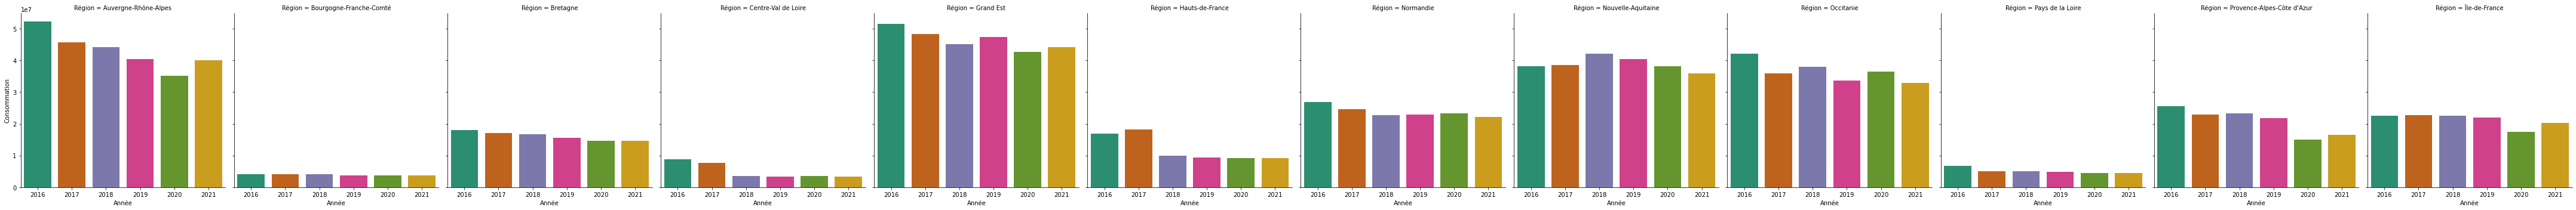

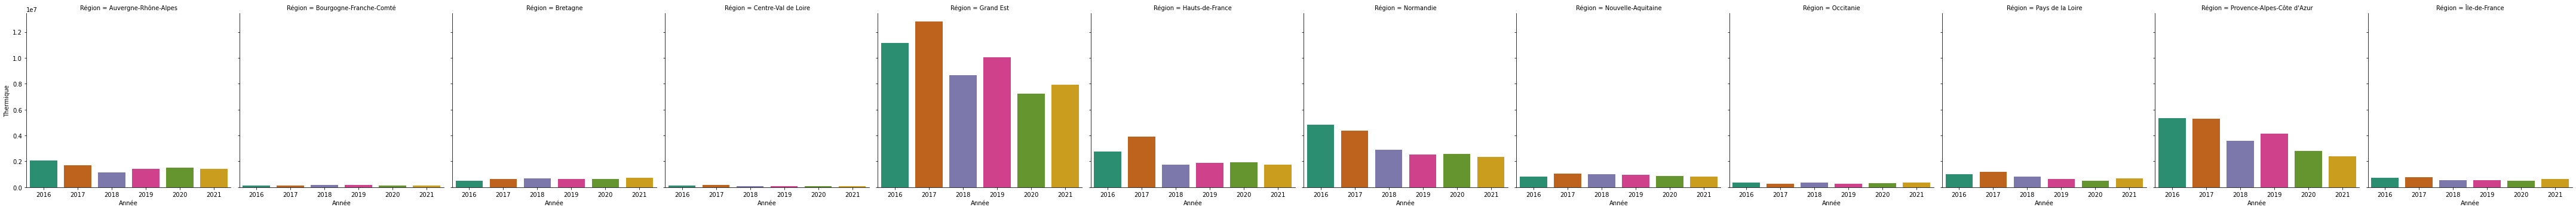

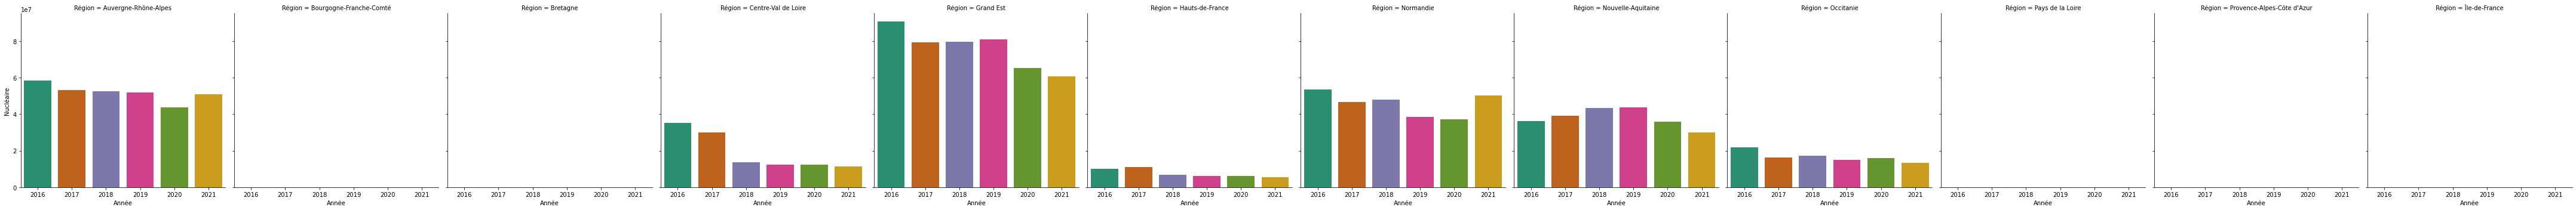

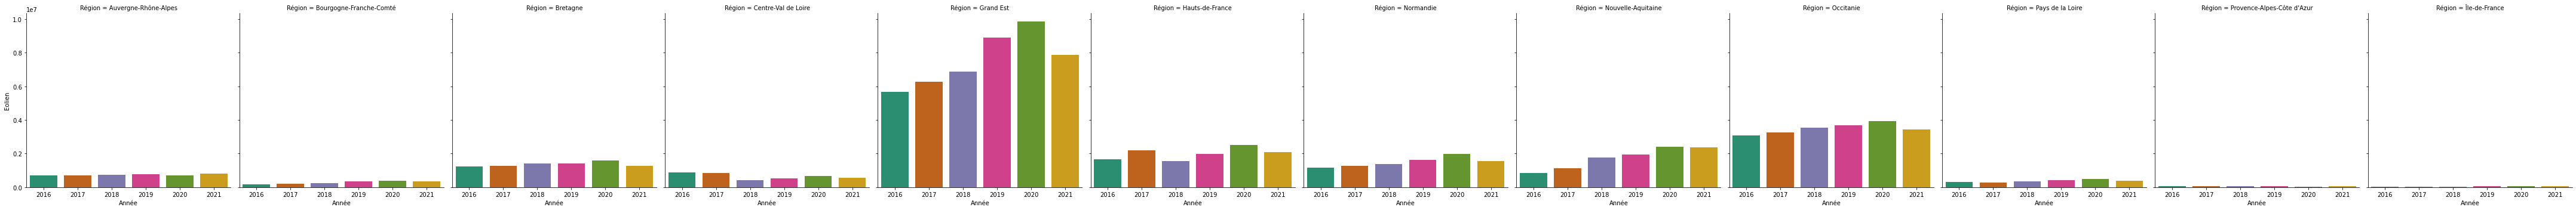

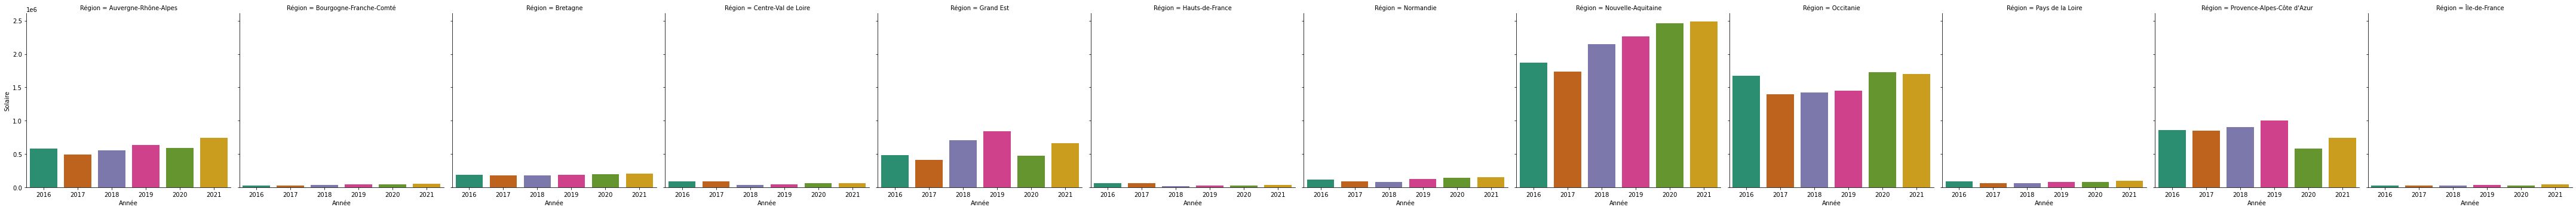

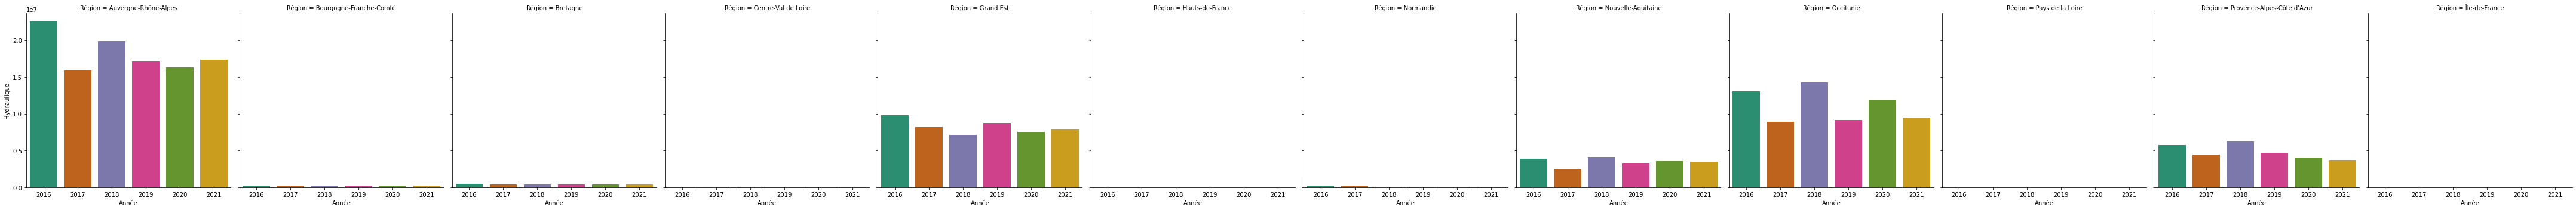

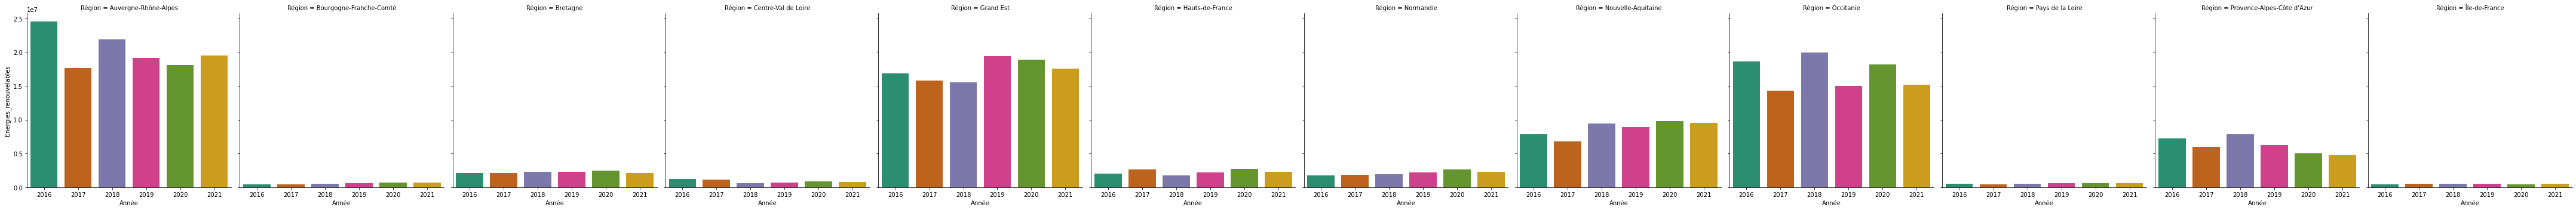

In [144]:
# La Somme de conso et production de chaque filière par Année et par Région
sns.catplot(x='Année', y='Consommation', col='Région',kind='bar', data=filiere_region, legend=True)
# Thermique
sns.catplot(x='Année', y='Thermique', col='Région',kind='bar', data=filiere_region, legend=True)
#Nucléaire
sns.catplot(x='Année', y='Nucléaire', col='Région',kind='bar', data=filiere_region, legend=True)
#Eolien
sns.catplot(x='Année', y='Eolien', col='Région',kind='bar', data=filiere_region, legend=True)
#Solaire
sns.catplot(x='Année', y='Solaire', col='Région',kind='bar', data=filiere_region, legend=True)
#Hydraulique
sns.catplot(x='Année', y='Hydraulique', col='Région',kind='bar', data=filiere_region, legend=True)
#Energies_renouvelables_Sum
sns.catplot(x='Année', y='Energies_renouvelables', col='Région',kind='bar', data=filiere_region, legend=True)


In [146]:
import plotly.express as px

fig=px.treemap(filiere_region,path=['Région','Année'],values='Consommation')
fig.show()

<AxesSubplot:title={'center':"% Moyen de Consommation par Secteur d'Activité '2016'"}, ylabel='None'>

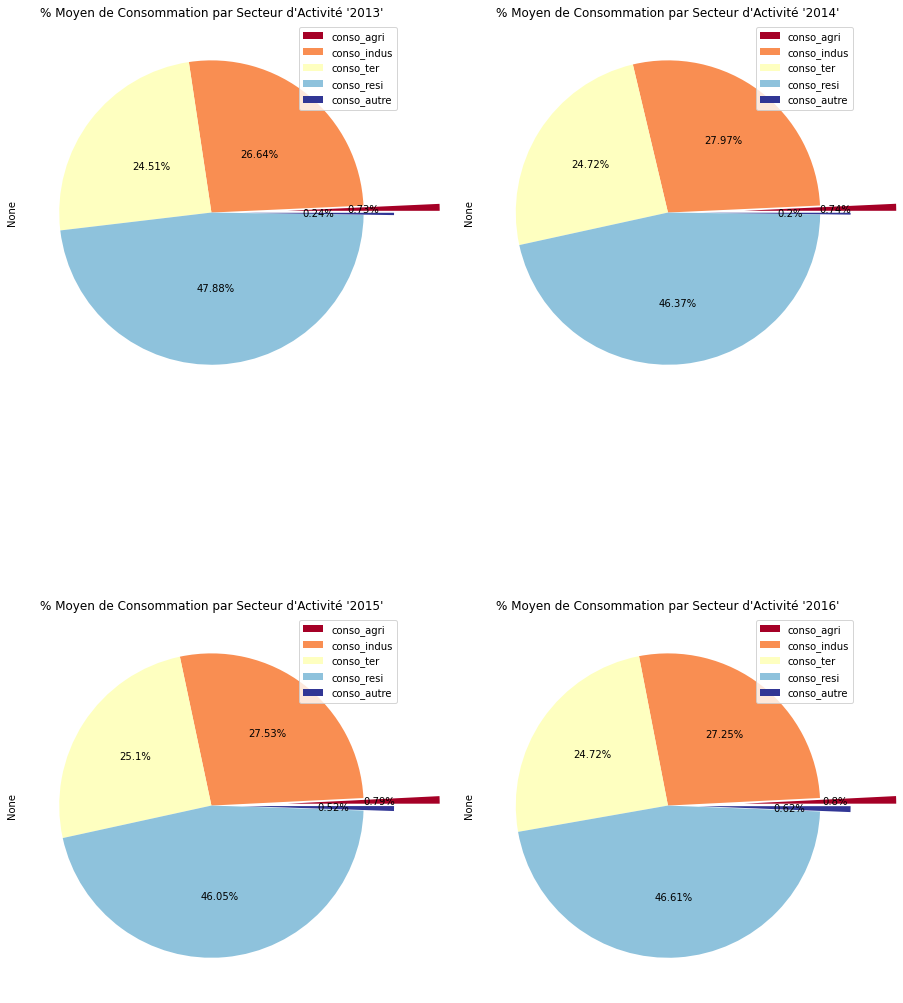

In [155]:
#Les secteurs d'activité
secteurs = df_clean.merge(right=pysecteur, on=['Code_région','Année','Région'], how='left')
columns = pd.DataFrame(secteurs[['conso_agri', 'conso_indus','conso_ter', 'conso_resi','conso_autre']])

plt.figure(figsize=(15,20))

plt.subplot(2,2,1)
plt.title("% Moyen de Consommation par Secteur d'Activité '2013'")
columns.loc[secteurs['Année'] == 2013].mean().plot(kind='pie',autopct=lambda x: str(np.round(x,2))+ '%',pctdistance=0.5,
            legend=True, labels=None,cmap='RdYlBu', explode = [0.5, 0,0, 0,0.2])

plt.subplot(2,2,2)
plt.title("% Moyen de Consommation par Secteur d'Activité '2014'")
columns.loc[secteurs['Année'] == 2014].mean().plot(kind='pie',autopct=lambda x: str(np.round(x,2))+ '%',legend=True,
            labels=None,cmap='RdYlBu',explode = [0.5, 0,0, 0,0.2])

plt.subplot(2,2,3)
plt.title("% Moyen de Consommation par Secteur d'Activité '2015'")
columns.loc[secteurs['Année'] == 2015].mean().plot(kind='pie',autopct=lambda x: str(np.round(x,2))+ '%',legend=True,
            labels=None,cmap='RdYlBu',explode = [0.5, 0,0, 0,0.2])

plt.subplot(2,2,4)
plt.title("% Moyen de Consommation par Secteur d'Activité '2016'")
columns.loc[secteurs['Année'] == 2016].mean().plot(kind='pie',autopct=lambda x: str(np.round(x,2))+ '%',legend=True,
            labels=None,cmap='RdYlBu',explode = [0.5, 0,0, 0,0.2])



<AxesSubplot:title={'center':"% Moyen de Consommation par Secteur d'Activité '2020'"}, ylabel='None'>

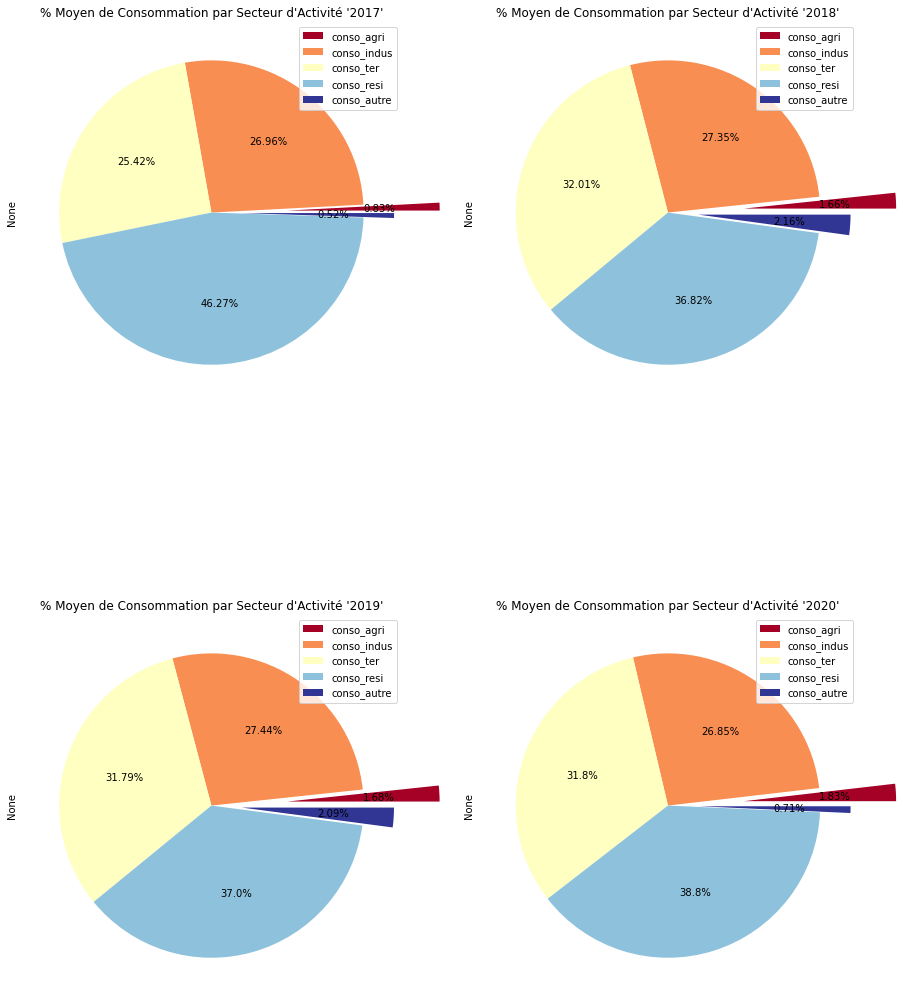

In [160]:
plt.figure(figsize=(15,20))
plt.subplot(2,2,1)
plt.title("% Moyen de Consommation par Secteur d'Activité '2017'")
columns.loc[secteurs['Année'] == 2017].mean().plot(kind='pie',autopct=lambda x: str(np.round(x,2))+ '%',legend=True,
            labels=None,cmap='RdYlBu',explode = [0.5, 0,0, 0,0.2])

plt.subplot(2,2,2)
plt.title("% Moyen de Consommation par Secteur d'Activité '2018'")
columns.loc[secteurs['Année'] == 2018].mean().plot(kind='pie',autopct=lambda x: str(np.round(x,2))+ '%',legend=True,
            labels=None,cmap='RdYlBu',explode = [0.5, 0,0, 0,0.2])

plt.subplot(2,2,3)
plt.title("% Moyen de Consommation par Secteur d'Activité '2019'")
columns.loc[secteurs['Année'] == 2019].mean().plot(kind='pie',autopct=lambda x: str(np.round(x,2))+ '%',legend=True,
            labels=None,cmap='RdYlBu',explode = [0.5, 0,0, 0,0.2])

plt.subplot(2,2,4)
plt.title("% Moyen de Consommation par Secteur d'Activité '2020'")
columns.loc[secteurs['Année'] == 2020].mean().plot(kind='pie',autopct=lambda x: str(np.round(x,2))+ '%',legend=True,
            labels=None,cmap='RdYlBu',explode = [0.5, 0,0, 0,0.2])


<AxesSubplot:title={'center':"Consommation Moyenne du Secteur d'Activité par Région "}, xlabel='Région'>

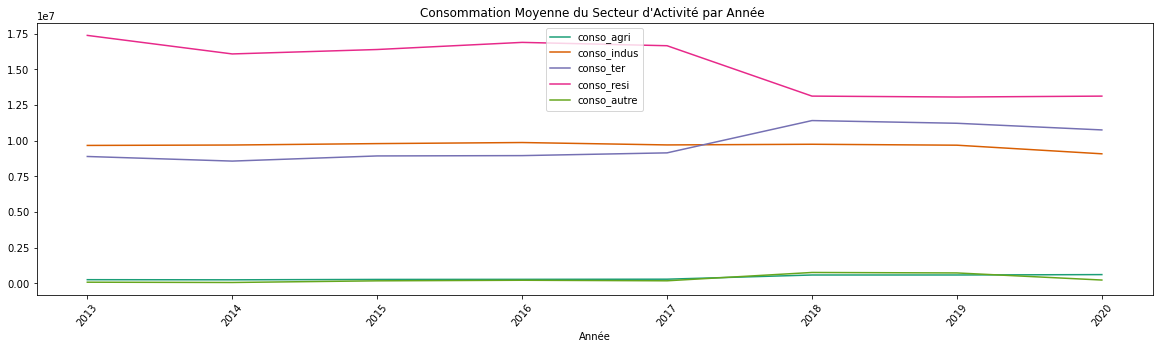

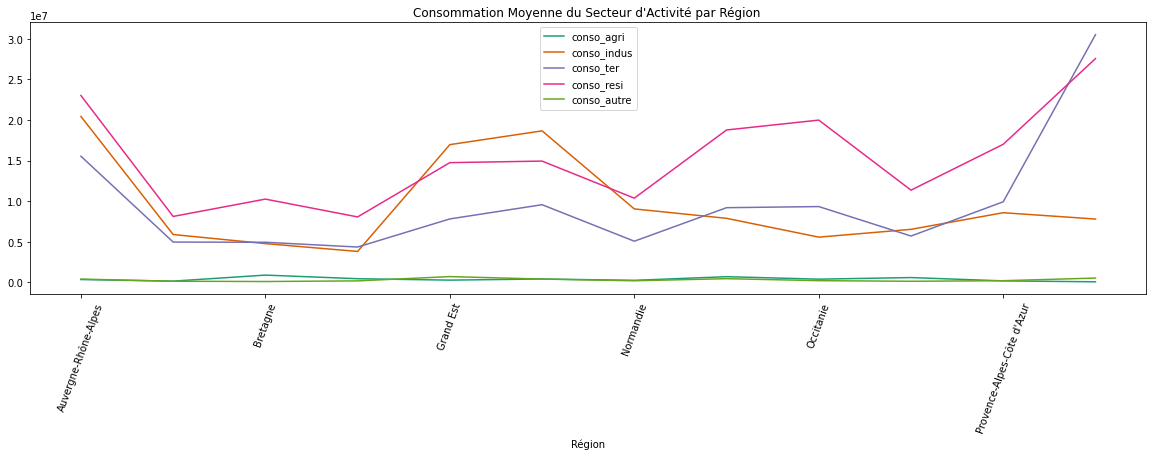

In [153]:
secteurs.groupby(['Année']).agg({'conso_agri':'mean', 'conso_indus':'mean',
                                      'conso_ter':'mean', 'conso_resi':'mean',
                                      'conso_autre':'mean'}).plot(rot=50,figsize=(20,5),title=( "Consommation Moyenne du Secteur d'Activité par Année "))

secteurs.groupby(['Région']).agg({'conso_agri':'mean', 'conso_indus':'mean',
                                      'conso_ter':'mean', 'conso_resi':'mean',
                                      'conso_autre':'mean'}).plot(rot=70, figsize=(20,5), title=("Consommation Moyenne du Secteur d'Activité par Région "))          


<AxesSubplot:title={'center':"% Moyen de Consommation par Secteur d'Activité de'2013 à 2020'"}, ylabel='None'>

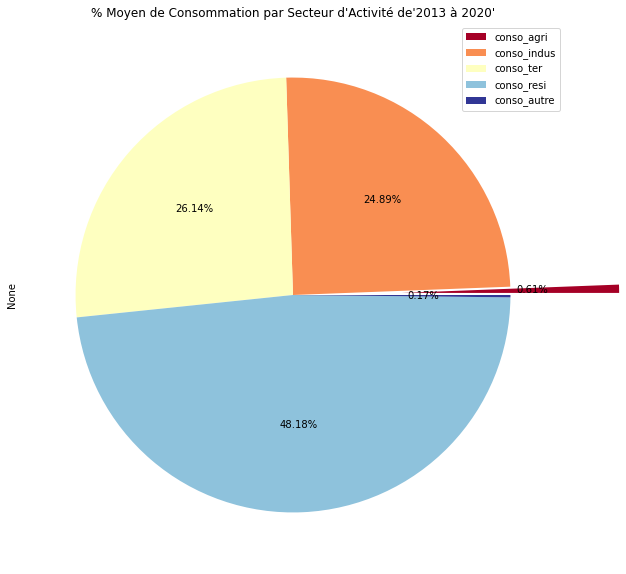

In [161]:

plt.title("% Moyen de Consommation par Secteur d'Activité de'2013 à 2020'")
columns.loc[secteurs['Année'].unique()].mean().plot(kind='pie',autopct=lambda x: str(np.round(x,2))+ '%',legend=True,
            labels=None,cmap='RdYlBu', explode = [0.5, 0,0, 0,0], figsize=(10,10))
